In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib as mpl
import glob

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
model = "Multimodel"
print(model)
experiment = "ssp585"
print(experiment)

Multimodel
ssp585



## Ice region plot

In [5]:
variable = "siconc"

In [6]:
files=glob.glob("Data/{}_*_ice_extent.nc".format(variable))
files = sorted(files)
files

['Data/siconc_ACCESS-ESM1-5_ice_extent.nc',
 'Data/siconc_CMCC-ESM2_ice_extent.nc',
 'Data/siconc_EC-Earth3-CC_ice_extent.nc',
 'Data/siconc_IPSL-CM6A-LR_ice_extent.nc',
 'Data/siconc_MPI-ESM1-2-HR_ice_extent.nc']

In [7]:
for i in range(5):
    globals()[f"model{i}"] = regex.search(r"(?<=Data/.*?_)[^_]*", files[i]).group()
    
    nc = xarray.open_dataset(files[i])
    nc = nc.sel(lat = slice(-90, -20))

    lat = nc['lat'].values 
    lon = nc['lon'].values
    globals()[f"var{i}"] = nc[variable].values
    
    globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ 

KeyboardInterrupt: 

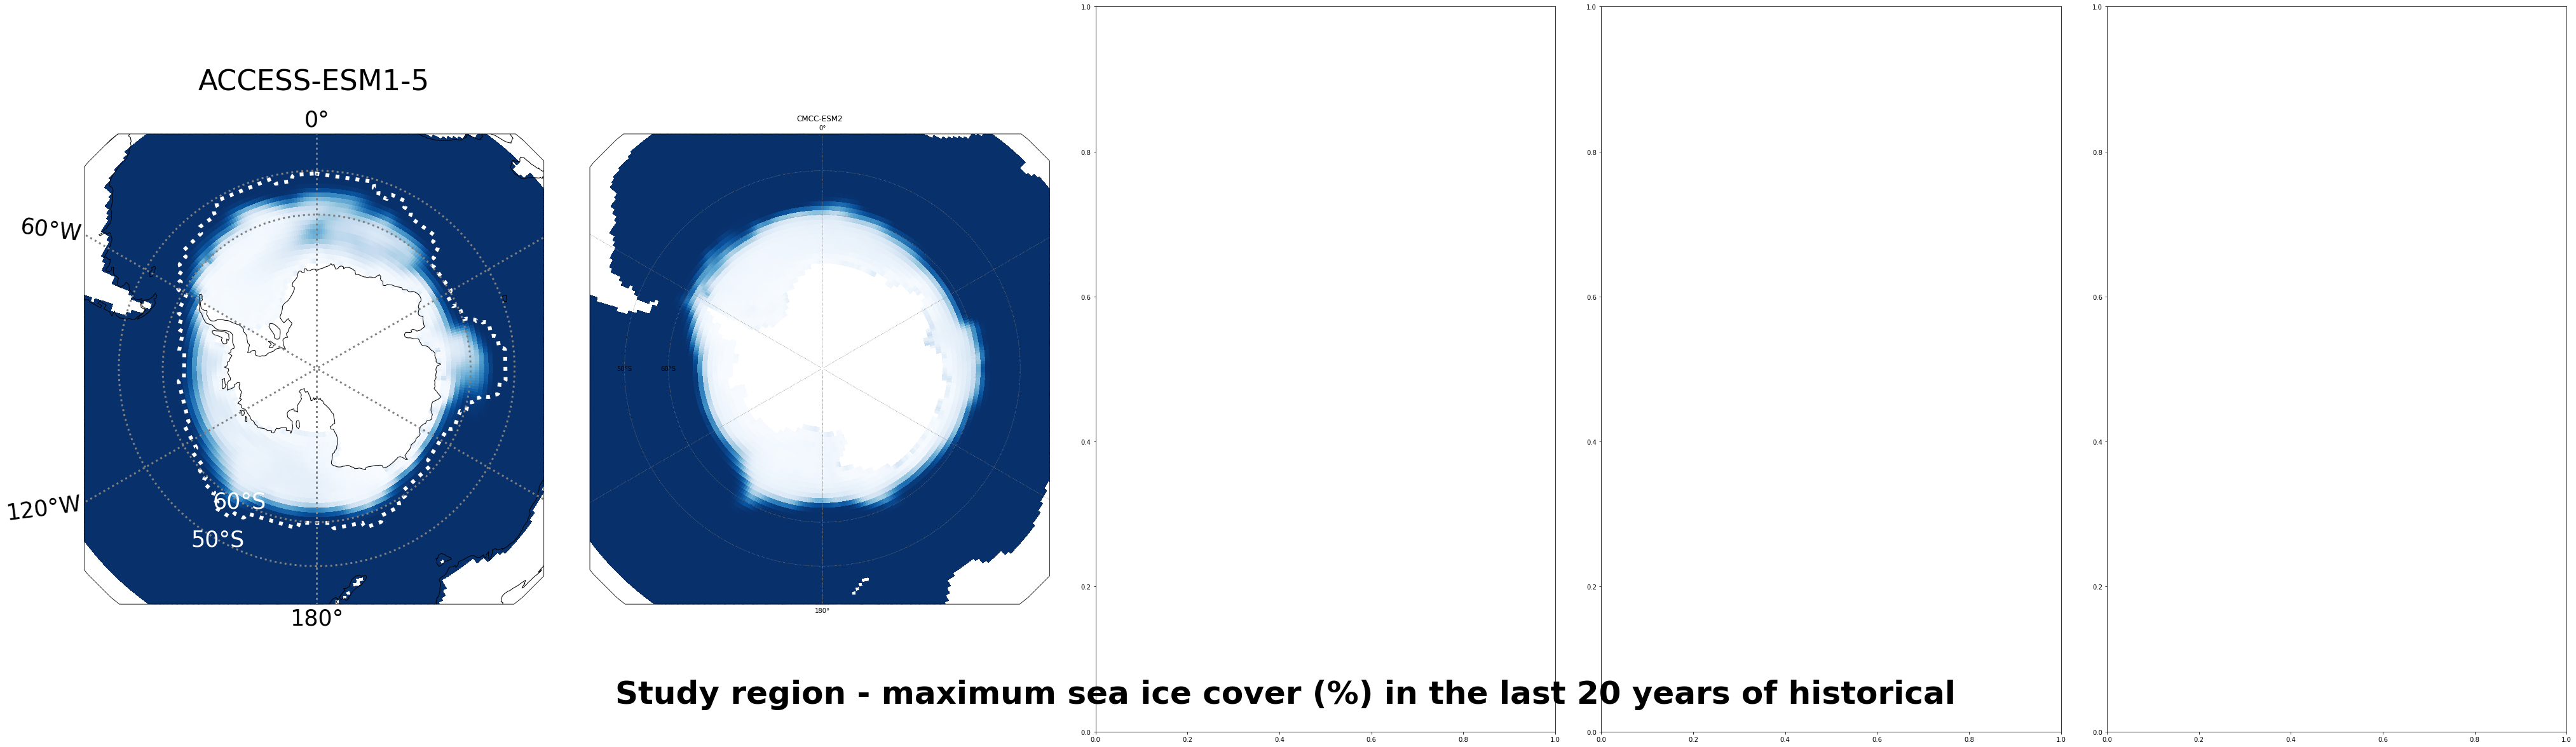

In [8]:
fig = plt.figure(figsize=(70,21))
fig.subplots_adjust(wspace = 0.1)
plt.suptitle("Study region - maximum sea ice cover (%) in the last 20 years of historical", fontweight = "bold", y=0.18, fontsize = 50)

gs = GridSpec(1, 5, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[0, 4])


## Plot 1
ax1 = plt.subplot(1, 5, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax1.set_title("{}".format(model0), fontsize = 45, pad = 30)

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                    linewidth = 3,
                  y_inline = True,
                  x_inline = False) 

gl1.left_labels = True
gl1.right_labels = False

gl1.xlabel_style = {'size': 35}
gl1.ylabel_style = {'color' : 'white', 'size': 35}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-150:
            tx.set_position([-150, xy[1]])


p = ax1.pcolor(x0, y0, var0,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

ax1.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved_more.shp".format(model0))
ax1.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 6)

## Plot 2
ax2 = plt.subplot(1, 5, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax2.set_title("{}".format(model1))

gl1 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False
gl1.left_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])


p = ax2.pcolor(x1, y1, var1,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

ax2.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved.shp".format(model1))
ax2.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 2)

## Plot 3
ax3 = plt.subplot(1, 5, 3, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax3.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax3.set_title("{}".format(model2))

gl1 = ax3.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False
gl1.left_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])


p = ax3.pcolor(x2, y2, var2,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

ax3.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved.shp".format(model2))
ax3.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 2)

## Plot 4
ax4 = plt.subplot(1, 5, 4, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax4.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax4.set_title("{}".format(model3))

gl1 = ax4.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False
gl1.left_labels = False

gl1.xlabel_style = {'size': 35}
gl1.ylabel_style = {'color' : 'white', 'size': 35}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])


p = ax4.pcolor(x3, y3, var3,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

ax4.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved.shp".format(model3))
ax4.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 2)

## Plot 5
ax5 = plt.subplot(1, 5, 5, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax5.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax5.set_title("{}".format(model4))

gl1 = ax5.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = True
gl1.left_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])


p = ax5.pcolor(x4, y4, var4,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

ax5.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved.shp".format(model4))
ax5.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 2)

#fig.subplots_adjust(right=0.9) # Move all subplots 0.2 away from the right
#cbar_ax = fig.add_axes([0.94, 0.27, 0.018, 0.48]) # Define position and size of new element (distance from left, distance from bottom, width, height)
#fig.colorbar(p, cax=cbar_ax)

cax = fig.add_axes([ax5.get_position().x1+0.033, ax5.get_position().y0, 0.016, ax5.get_position().height])
plt.colorbar(p, cax=cax) 

plt.savefig("output/Multimodel/ice_choice.png")

plt.show()

## 
## epc100

In [184]:
variable = "epc100"
print(variable)

epc100


### Multimodel percentage change


In [185]:
files=glob.glob("Data/{}_*_percentage_whole.nc".format(variable))
files

['Data/epc100_CMCC-ESM2_ssp585_percentage_whole.nc',
 'Data/epc100_MPI-ESM1-2-HR_ssp585_percentage_whole.nc',
 'Data/epc100_EC-Earth3-CC_ssp585_percentage_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_ssp585_percentage_whole.nc',
 'Data/epc100_ACCESS-ESM1-5_ssp585_percentage_whole.nc']

In [161]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 5
File contents:
                                                     variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                            
Data/epc100_CMCC-ESM2_ssp585_percentage_whole.nc       epc100   None    18000        1      None  None       F32
Data/epc100_MPI-ESM1-2-HR_ssp585_percentage_whole.nc   epc100   None    18000        1      None  None       F32
Data/epc100_EC-Earth3-CC_ssp585_percentage_whole.nc    epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_ssp585_percentage_whole.nc    epc100   None    18000        1      None  None       F32
Data/epc100_ACCESS-ESM1-5_ssp585_percentage_whole.nc   epc100   None    18000        1      None  None       F32

In [162]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_{}_percentage_whole_all.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 ...
Data variables:
    epc100   (lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Aug 16 11:54:11 2022: cdo -L --sortname -z zip_9 -ensme...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

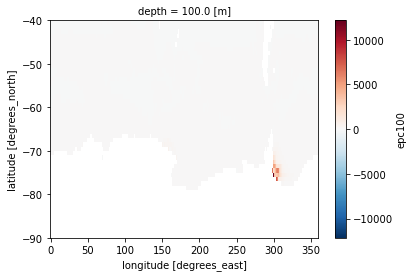

In [186]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_whole_all.nc".format(variable, model, experiment))
nc[variable].plot()
nc

In [187]:
a = {}
for i in range(len(files)):
    print(i)
    nc = xarray.open_dataset(files[i])
    values = nc[variable].values
    print(values)
    a[i] = values

0
[[        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 ...
 [ -2.7429626  -3.1978288  -3.430212  ...  -1.4791933  -1.8594587
   -2.2678359]
 [-11.606777  -12.013413  -12.175266  ...  -8.896867   -9.977976
  -10.912375 ]
 [-19.91915   -19.820457  -19.958336  ... -18.96144   -19.663546
  -19.955387 ]]
1
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [-15.890053 -15.787344 -17.229406 ... -16.256098 -16.349722 -16.106098]
 [-16.79515  -15.153548 -18.714766 ... -21.345068 -21.307276 -18.974121]
 [-17.937748 -23.275139 -26.863352 ... -20.010096 -17.081282 -17.10315 ]]
2
[[        nan         nan         nan ...         nan       

In [188]:
stacked = np.stack((a[0],a[1],a[2],a[3],a[4]))
stacked

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ -2.7429626,  -3.1978288,  -3.430212 , ...,  -1.4791933,
          -1.8594587,  -2.2678359],
        [-11.606777 , -12.013413 , -12.175266 , ...,  -8.896867 ,
          -9.977976 , -10.912375 ],
        [-19.91915  , -19.820457 , -19.958336 , ..., -18.96144  ,
         -19.663546 , -19.955387 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-15.890053 , -15.787344 , -17.229406 , ..., -

In [189]:
median = np.nanmedian(stacked, axis=[0])
median

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered


array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ -2.7429626,  -3.1978288,  -3.430212 , ...,  -1.4791933,
         -1.8594587,  -2.2678359],
       [ -9.734812 ,  -8.984246 ,  -8.229087 , ...,  -8.896867 ,
         -9.977976 , -10.378839 ],
       [ -4.646451 ,  -3.8748443,  -3.0438452, ...,  -6.84964  ,
         -6.201428 ,  -5.423118 ]], dtype=float32)

In [190]:
print(a[0].shape)
print(median.shape)

(50, 360)
(50, 360)


In [191]:
nc["median"] = (("lat","lon"), median)
nc

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 ...
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan ... 16.82 15.35 14.08 14.68
    median   (lat, lon) float32 nan nan nan nan ... -7.248 -6.85 -6.201 -5.423

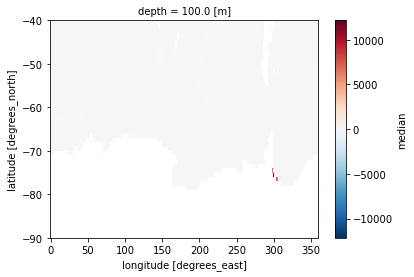

In [192]:
nc["median"].plot()

In [193]:
nc.to_netcdf(path = "Data/{}_{}_{}_percentage_whole_median.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Zonal mean


In [194]:
files=glob.glob("Data/Shape/{}_*_{}_inc.nc".format(variable, experiment))
files

['Data/Shape/epc100_ACCESS-ESM1-5_ssp585_inc.nc',
 'Data/Shape/epc100_CMCC-ESM2_ssp585_inc.nc',
 'Data/Shape/epc100_EC-Earth3-CC_ssp585_inc.nc',
 'Data/Shape/epc100_IPSL-CM6A-LR_ssp585_inc.nc',
 'Data/Shape/epc100_MPI-ESM1-2-HR_ssp585_inc.nc']

In [195]:
a = {}
for i in range(len(files)):
    nc = xarray.open_dataset(files[i])
    values = nc["inc"].values
    values = np.nan_to_num(values, nan=0)
    print(values)
    a[i] = values
    print(i)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
4


In [196]:
mean_inc = (a[0] + a[1] + a[2] + a[3] + a[4])/5

In [197]:
mean_inc[mean_inc < 0.8] = 0

In [198]:
sum(mean_inc[mean_inc < 0.8])

0.0

In [199]:
mean_inc.shape

(180, 360)

In [200]:
files=glob.glob("Data/Shape/{}_*_{}_dec.nc".format(variable, experiment))
files

['Data/Shape/epc100_ACCESS-ESM1-5_ssp585_dec.nc',
 'Data/Shape/epc100_CMCC-ESM2_ssp585_dec.nc',
 'Data/Shape/epc100_EC-Earth3-CC_ssp585_dec.nc',
 'Data/Shape/epc100_IPSL-CM6A-LR_ssp585_dec.nc',
 'Data/Shape/epc100_MPI-ESM1-2-HR_ssp585_dec.nc']

In [139]:
a = {}
for i in range(len(files)):
    nc = xarray.open_dataset(files[i])
    values = nc["dec"].values
    values = np.nan_to_num(values, nan=0)
    print(values)
    a[i] = values
    print(i)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
4


In [140]:
mean_dec = (a[0] + a[1] + a[2] + a[3] + a[4])/5

In [141]:
mean_dec[mean_dec < 0.8] = 0

In [142]:
sum(mean_dec[mean_dec < 0.8])

0.0

In [143]:
mean_dec.shape

(180, 360)

In [144]:
agree = mean_dec + mean_inc

In [145]:
agree[agree == 0] = np.nan

In [146]:
agree

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [147]:
mean_dec[mean_dec == 0] = np.nan
mean_inc[mean_inc == 0] = np.nan
mean_dec
mean_inc

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [148]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 5
File contents:
                                              variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                     
Data/Shape/epc100_ACCESS-ESM1-5_ssp585_dec.nc      dec   None    64800        1      None  None       F32
Data/Shape/epc100_CMCC-ESM2_ssp585_dec.nc          dec   None    64800        1      None  None       F32
Data/Shape/epc100_EC-Earth3-CC_ssp585_dec.nc       dec   None    64800        1      None  None       F32
Data/Shape/epc100_IPSL-CM6A-LR_ssp585_dec.nc       dec   None    64800        1      None  None       F32
Data/Shape/epc100_MPI-ESM1-2-HR_ssp585_dec.nc      dec   None    64800        1      None  None       F32

In [149]:
percentage.ensemble_mean()
percentage.to_nc("Data/Shape/{}_{}_{}.nc".format(variable, model, experiment),overwrite = True)

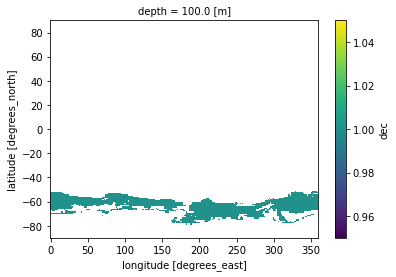

In [170]:
shade = xarray.open_dataset("Data/Shape/{}_{}_{}.nc".format(variable, model, experiment))
shade["dec"].plot()

In [171]:
shade["mean_inc"] = (("lat","lon"), mean_inc)

In [172]:
shade["mean_dec"] = (("lat","lon"), mean_dec)

In [173]:
shade["agree"] = (("lat","lon"), agree)

In [154]:
shade

<xarray.Dataset>
Dimensions:   (lon: 360, lat: 180)
Coordinates:
  * lon       (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth     float64 ...
Data variables:
    dec       (lat, lon) float32 ...
    mean_inc  (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    mean_dec  (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    agree     (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Aug 16 11:49:47 2022: cdo -L --sortname -z zip_9 -ensme...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

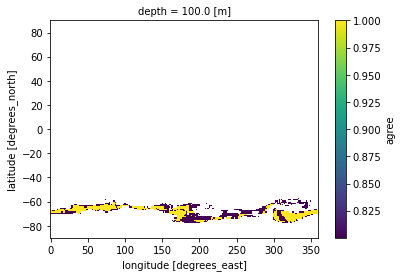

In [174]:
shade["agree"].plot()

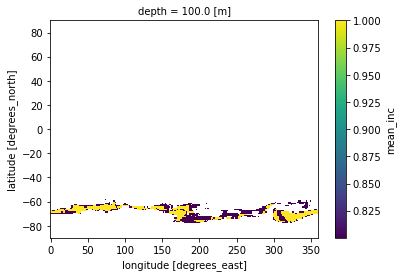

In [175]:
shade["mean_inc"].plot()

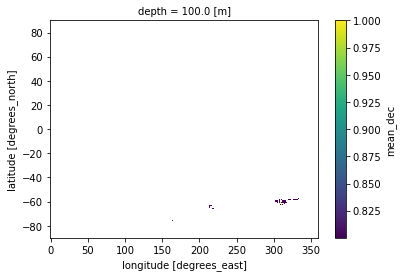

In [176]:
shade["mean_dec"].plot()

In [159]:
shade.to_netcdf(path = "Data/Shape/{}_{}_{}_agree.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Plotting

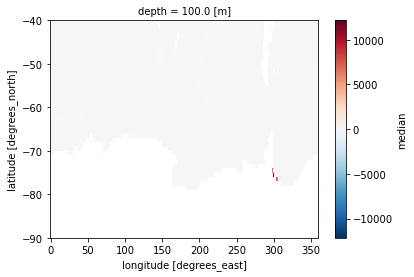

In [201]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_whole_median.nc".format(variable, model, experiment))
nc["median"].plot()

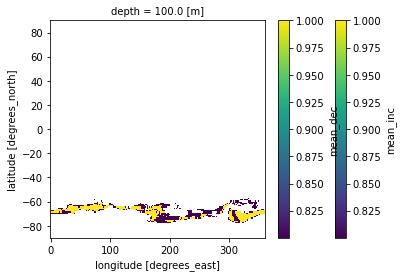

In [205]:
shade = xarray.open_dataset("Data/Shape/{}_{}_{}_agree.nc".format(variable, model, experiment))
shade["mean_inc"].plot()
shade["mean_dec"].plot()

In [206]:
lat = nc['lat'].values 
lon = nc['lon'].values
var = nc["median"].values

var_max = np.nanmax(var)
var_min = np.nanmin(var)

var_upper = np.nanquantile(var[var>0], 0.9)
var_lower = np.nanquantile(var[var<0], 0.1)
label = abs(max([var_upper, var_lower], key = abs))
print(var_upper, var_lower)
print(var_max, var_min)

var, lon = add_cyclic_point(var, coord=lon)
x, y = np.meshgrid(lon, lat)

25.4300521850586 -10.206868267059326
12159.161 -31.494501


In [207]:
files=glob.glob("Shapes/*_ice_margin_remapped_improved.shp")
files

['Shapes/CMCC-ESM2_ice_margin_remapped_improved.shp',
 'Shapes/IPSL-CM6A-LR_ice_margin_remapped_improved.shp',
 'Shapes/ACCESS-ESM1-5_ice_margin_remapped_improved.shp',
 'Shapes/EC-Earth3-CC_ice_margin_remapped_improved.shp',
 'Shapes/MPI-ESM1-2-HR_ice_margin_remapped_improved.shp']

In [208]:
lat_shade = shade['lat'].values 
lon_shade = shade['lon'].values
inc = shade["mean_inc"].values
dec = shade["mean_dec"].values
agree = shade["agree"].values


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteratio

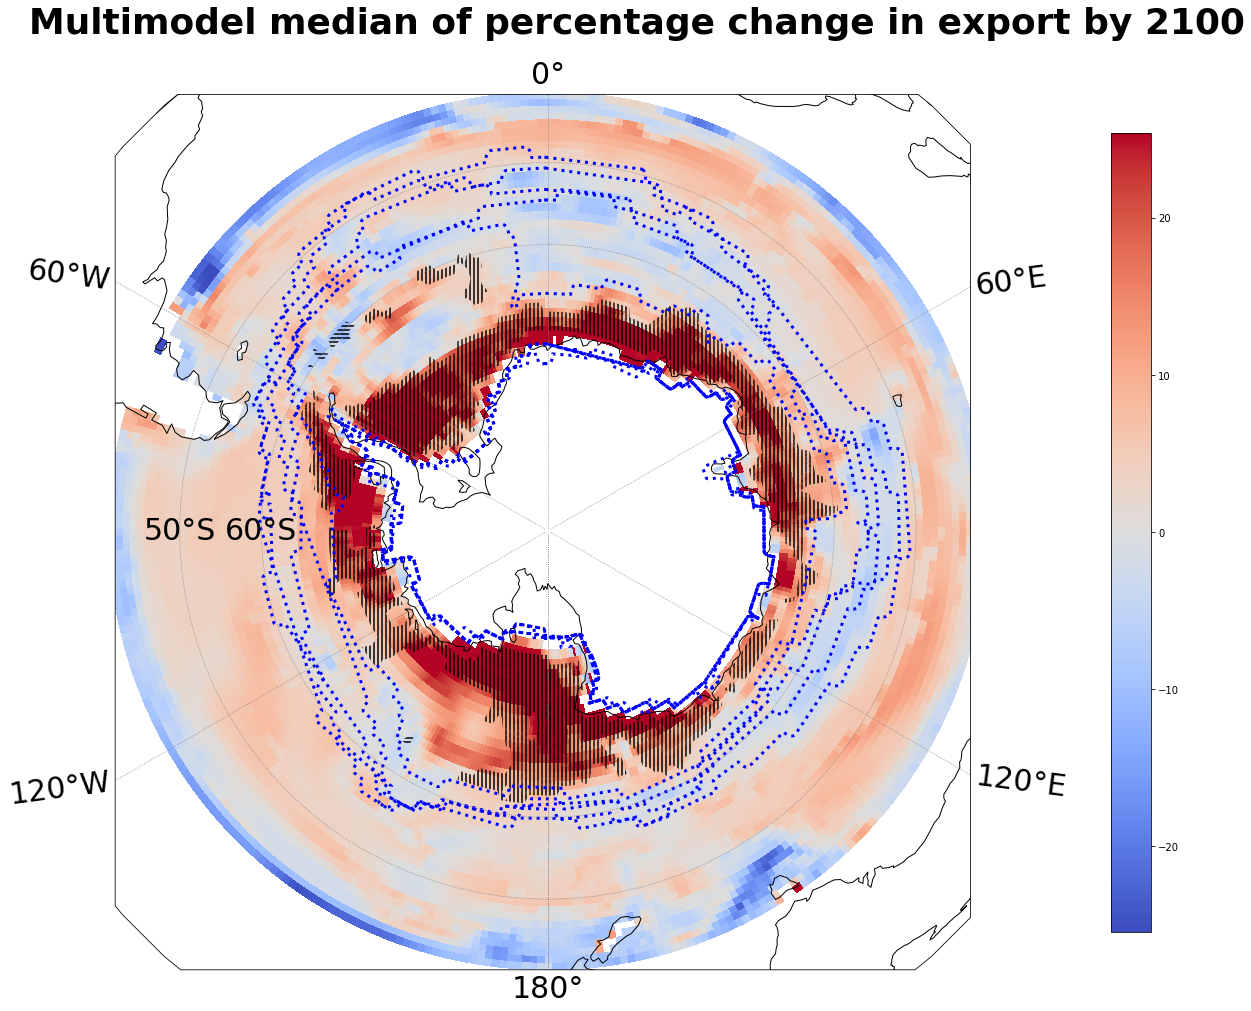

In [225]:
fig = plt.figure(figsize=[21, 21])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


#plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 30}
gl1.xlabel_style = {'size': 30}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



#ax1.title.set_text("Multimodel percentage change in epc100 by 2100")

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )

mpl.rcParams['hatch.linewidth'] = 1.5
density = 3
i = ax1.contourf(lon_shade, lat_shade, inc, transform= cartopy.crs.PlateCarree(),
    colors='none', hatches=[density*'|',density*'|'])
j = ax1.contourf(lon_shade, lat_shade, dec, transform= cartopy.crs.PlateCarree(),
    colors='none', hatches=[density*'-',density*'-'])

# d = ax1.contourf(lon_shade, lat_shade, dec, transform= cartopy.crs.PlateCarree(),
#     colors='none', hatches=[density*'*',density*'*'])

ax1.coastlines()

# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)

# ax1.set_boundary(circle, transform=ax1.transAxes)

for i in files:
    ice = gpd.read_file(i)
    ax1.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'blue',
                      linestyle = ':',
                      linewidth = 3)

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)

plt.suptitle("Multimodel median of percentage change in export by 2100", fontsize = 36, fontweight = "bold", y = 0.85, x = 0.47)

plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

### Timeseries

In [10]:
files=glob.glob("csv/*_{}_whole.csv".format(variable))
files

['csv/ACCESS-ESM1-5_epc100_whole.csv',
 'csv/CMCC-ESM2_epc100_whole.csv',
 'csv/EC-Earth3-CC_epc100_whole.csv',
 'csv/IPSL-CM6A-LR_epc100_whole.csv',
 'csv/MPI-ESM1-2-HR_epc100_whole.csv']

In [11]:
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)
type(df)

     Year     Annual     Summer    Winter          Model
0    2015  10.014500  27.916971  0.295388  ACCESS-ESM1-5
1    2016   9.897537  27.555046  0.276833  ACCESS-ESM1-5
2    2017   8.903943  24.539703  0.253819  ACCESS-ESM1-5
3    2018   9.639710  26.588690  0.265886  ACCESS-ESM1-5
4    2019   8.861773  24.678904  0.274101  ACCESS-ESM1-5
..    ...        ...        ...       ...            ...
425  2096  17.549166  52.322662  0.282213  MPI-ESM1-2-HR
426  2097  16.332424  48.090984  0.305195  MPI-ESM1-2-HR
427  2098  16.531553  49.105480  0.310809  MPI-ESM1-2-HR
428  2099  16.547178  48.732895  0.313749  MPI-ESM1-2-HR
429  2100  16.270422  48.919498  0.291079  MPI-ESM1-2-HR

[430 rows x 5 columns]


pandas.core.frame.DataFrame

#### Annual

In [12]:
Annual = df.drop(columns=["Summer", "Winter"])
Annual

,Year,Annual,Model
0,2015,10.014500,ACCESS-ESM1-5
1,2016,9.897537,ACCESS-ESM1-5
2,2017,8.903943,ACCESS-ESM1-5
3,2018,9.639710,ACCESS-ESM1-5
4,2019,8.861773,ACCESS-ESM1-5
...,...,...,...
425,2096,17.549166,MPI-ESM1-2-HR
426,2097,16.332424,MPI-ESM1-2-HR
427,2098,16.531553,MPI-ESM1-2-HR
428,2099,16.547178,MPI-ESM1-2-HR


In [13]:
Annual = Annual.pivot(index="Year", columns="Model", values="Annual")

In [14]:
Mean = {"Multimodel Mean": Annual.mean(axis=1)}
Mean = pd.DataFrame(Mean)
Mean

,Multimodel Mean
Year,
2015,17.711475
2016,18.131488
2017,17.974893
2018,17.703275
2019,17.627375
...,...
2096,20.069768
2097,19.761057
2098,19.846275


In [15]:
Annual

Model,ACCESS-ESM1-5,CMCC-ESM2,EC-Earth3-CC,IPSL-CM6A-LR,MPI-ESM1-2-HR
Year,,,,,
2015,10.014500,26.617071,18.228113,17.567694,16.129995
2016,9.897537,27.178505,18.625845,18.053415,16.902136
2017,8.903943,27.211540,18.559433,18.808956,16.390593
2018,9.639710,25.798775,18.548100,18.837720,15.692071
2019,8.861773,26.138102,18.267197,18.442688,16.427114
...,...,...,...,...,...
2096,12.836106,29.577513,21.616670,18.769386,17.549166
2097,12.359749,30.831055,20.536116,18.745940,16.332424
2098,12.514877,31.126158,20.253645,18.805141,16.531553


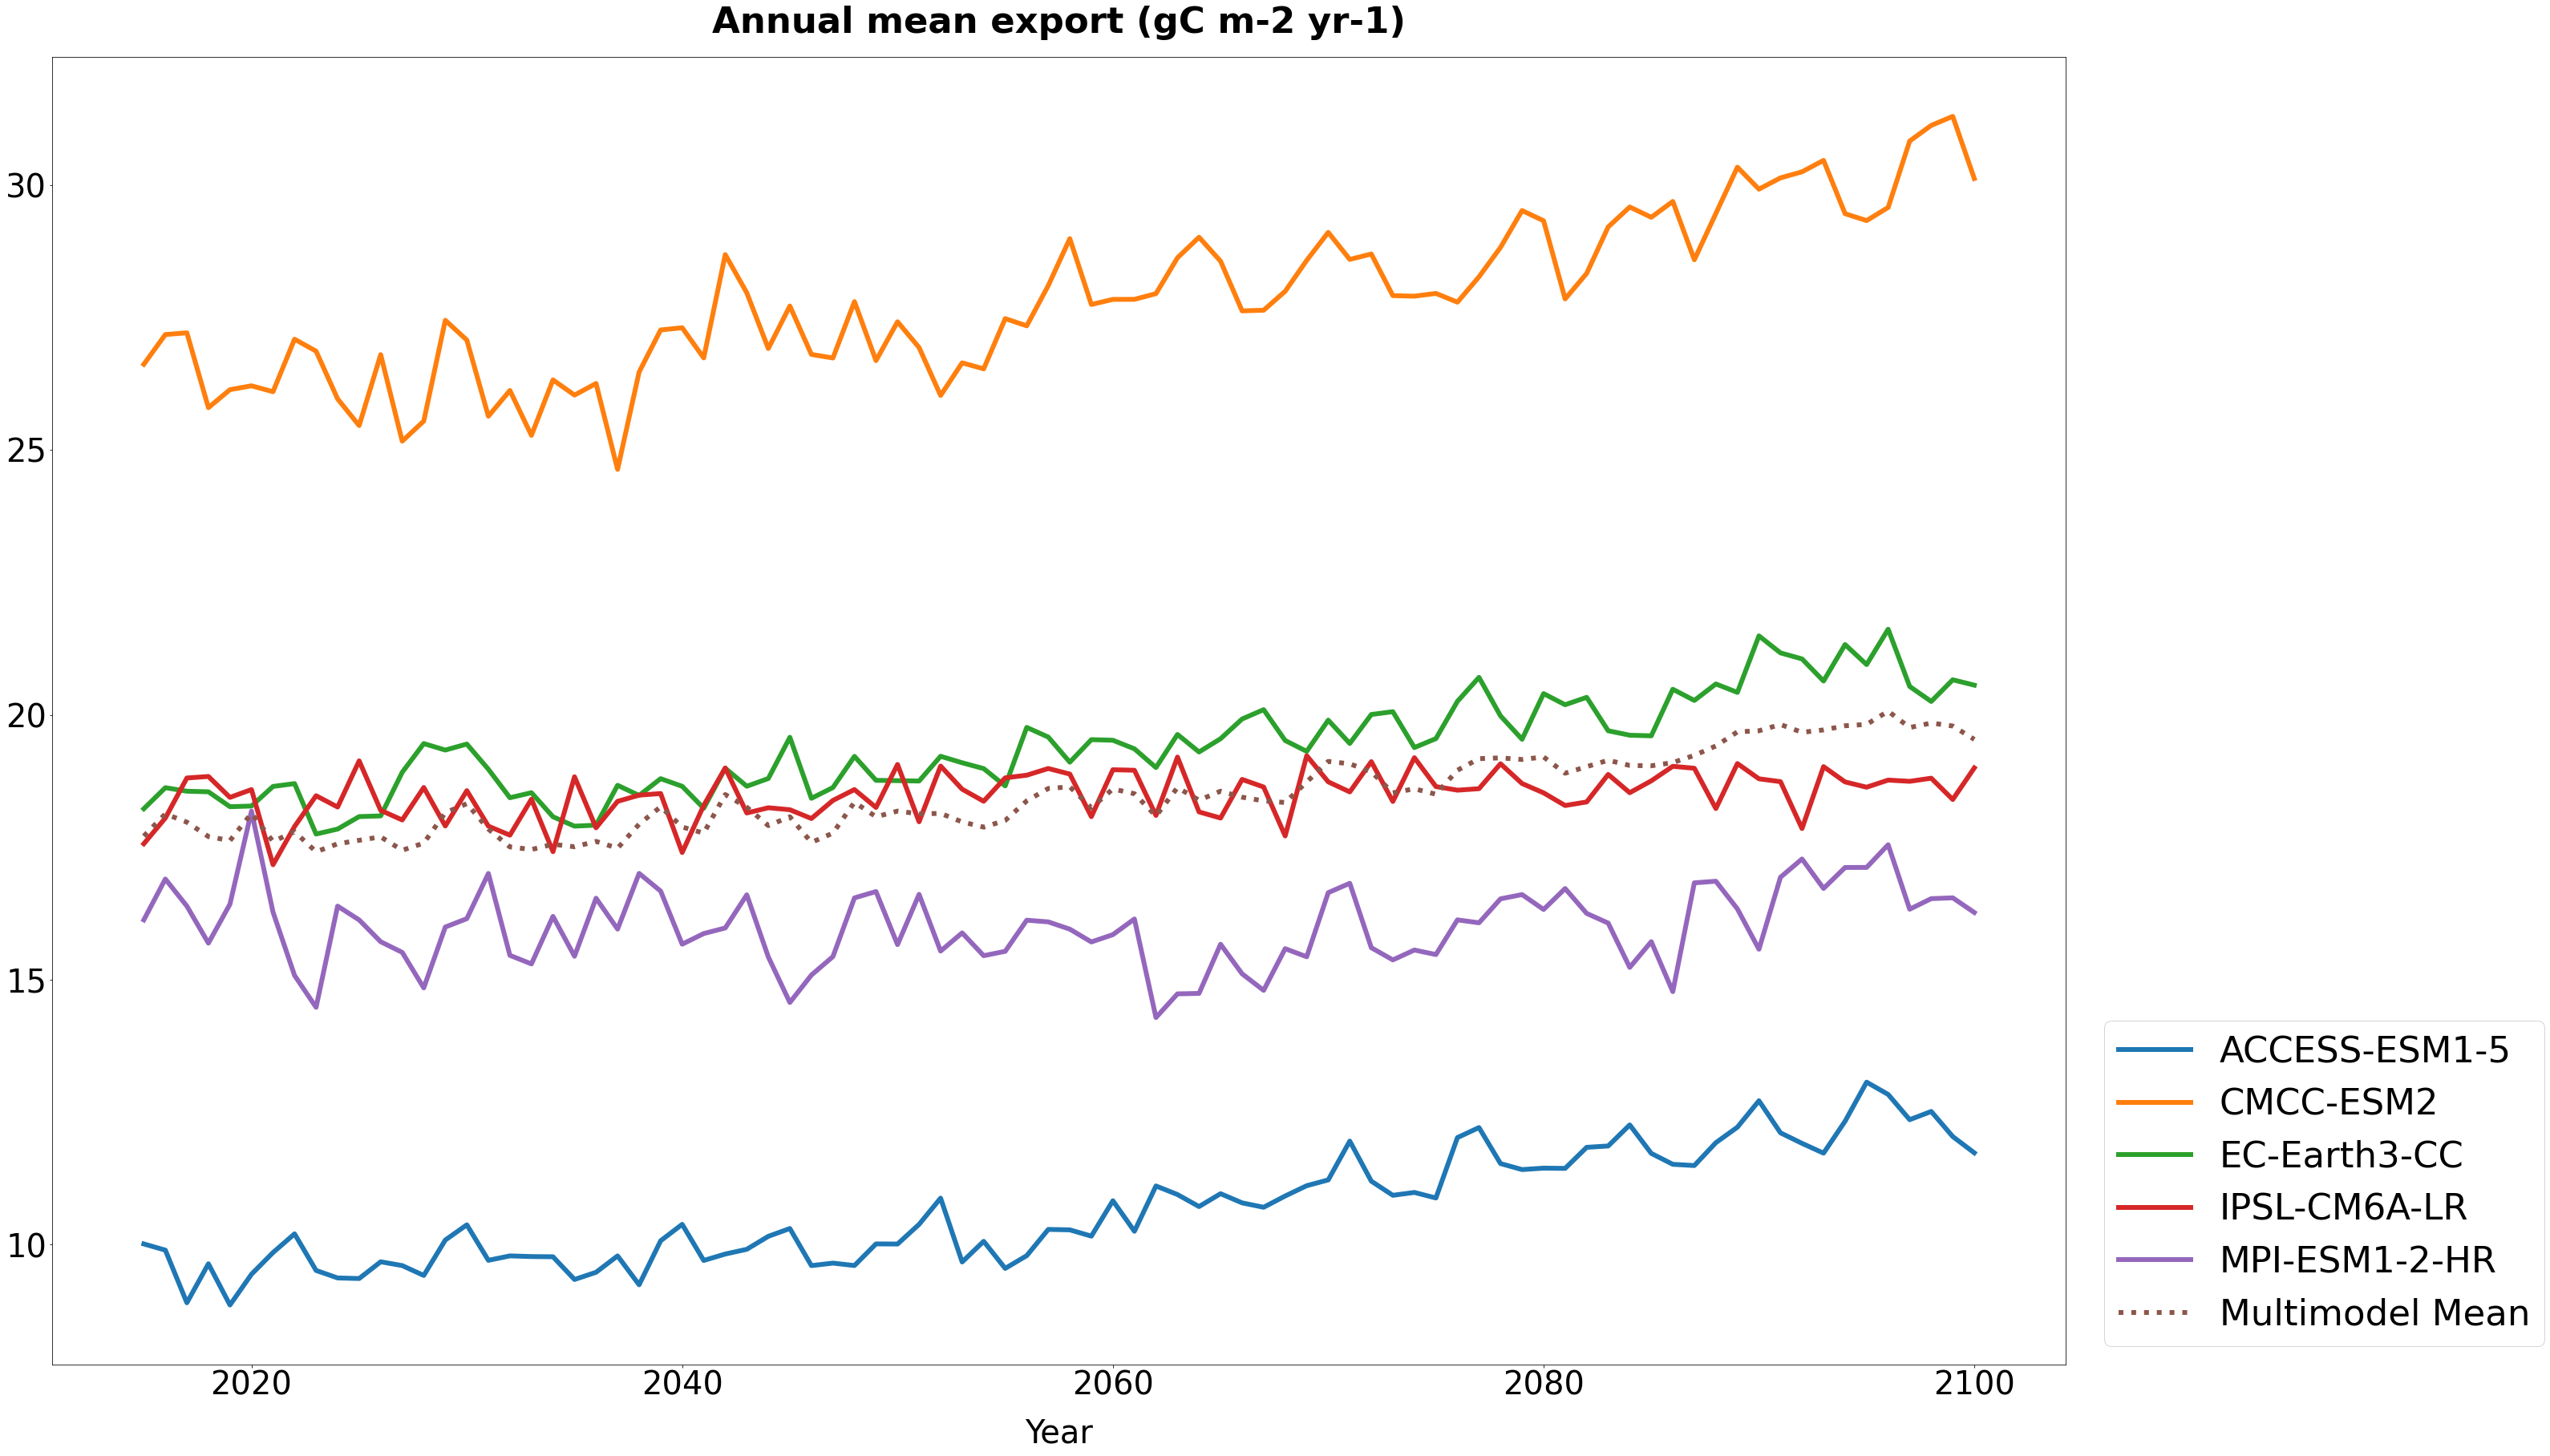

In [41]:
fig,ax = plt.subplots(figsize=(45,30))

plt.title("Annual mean export (gC m-2 yr-1)", fontweight="bold", fontsize = 45, pad = 30)
ax.TitleHorizontalAlignment = 'left'

ax = Annual.plot.line(ax = ax, linewidth = 6)
ax2 = Mean.plot.line(ax = ax, linewidth = 6, linestyle = ":")
ax.legend(loc='lower left', bbox_to_anchor=(1.01, 0), prop={'size':45})

ax.set_xlabel('Year', fontsize = 40, labelpad=20)

plt.savefig("output/{}/{}_{}_{}_mean_projection_whole.png".format(model, variable, model, experiment), bbox_inches='tight')

plt.show()

#### Season

In [42]:
Summer = df.drop(columns=["Annual", "Winter"])
Summer

,Year,Summer,Model
0,2015,27.916971,ACCESS-ESM1-5
1,2016,27.555046,ACCESS-ESM1-5
2,2017,24.539703,ACCESS-ESM1-5
3,2018,26.588690,ACCESS-ESM1-5
4,2019,24.678904,ACCESS-ESM1-5
...,...,...,...
425,2096,52.322662,MPI-ESM1-2-HR
426,2097,48.090984,MPI-ESM1-2-HR
427,2098,49.105480,MPI-ESM1-2-HR
428,2099,48.732895,MPI-ESM1-2-HR


In [43]:
Summer = Summer.pivot(index="Year", columns="Model", values="Summer")

In [44]:
Summer_Mean = {"Multimodel Mean": Summer.mean(axis=1)}
Summer_Mean = pd.DataFrame(Summer_Mean)
Summer_Mean

,Multimodel Mean
Year,
2015,38.098599
2016,39.063451
2017,38.691460
2018,38.296919
2019,38.443955
...,...
2096,43.388318
2097,42.092028
2098,42.318593


In [45]:
Summer

Model,ACCESS-ESM1-5,CMCC-ESM2,EC-Earth3-CC,IPSL-CM6A-LR,MPI-ESM1-2-HR
Year,,,,,
2015,27.916971,31.965164,39.710484,42.156143,48.744232
2016,27.555046,32.523975,39.634823,44.074783,51.528625
2017,24.539703,33.045746,40.809185,45.079586,49.983078
2018,26.588690,31.675348,40.730869,45.355335,47.134354
2019,24.678904,32.613834,40.124111,44.600185,50.202740
...,...,...,...,...,...
2096,36.665394,39.859600,44.834564,43.259369,52.322662
2097,35.284687,42.036739,42.127014,42.920715,48.090984
2098,35.053848,42.480850,42.310440,42.642345,49.105480


In [46]:
Winter = df.drop(columns=["Annual", "Summer"])
Winter

,Year,Winter,Model
0,2015,0.295388,ACCESS-ESM1-5
1,2016,0.276833,ACCESS-ESM1-5
2,2017,0.253819,ACCESS-ESM1-5
3,2018,0.265886,ACCESS-ESM1-5
4,2019,0.274101,ACCESS-ESM1-5
...,...,...,...
425,2096,0.282213,MPI-ESM1-2-HR
426,2097,0.305195,MPI-ESM1-2-HR
427,2098,0.310809,MPI-ESM1-2-HR
428,2099,0.313749,MPI-ESM1-2-HR


In [47]:
Winter = Winter.pivot(index="Year", columns="Model", values="Winter")

In [48]:
Winter_Mean = {"Multimodel Mean": Winter.mean(axis=1)}
Winter_Mean = pd.DataFrame(Winter_Mean)
Winter_Mean

,Multimodel Mean
Year,
2015,5.532207
2016,5.579106
2017,5.576502
2018,5.333688
2019,5.235965
...,...
2096,5.415167
2097,5.606660
2098,5.636078


In [49]:
Winter

Model,ACCESS-ESM1-5,CMCC-ESM2,EC-Earth3-CC,IPSL-CM6A-LR,MPI-ESM1-2-HR
Year,,,,,
2015,0.295388,20.634682,3.225622,3.176339,0.329006
2016,0.276833,20.921610,3.267078,3.099838,0.330173
2017,0.253819,20.830933,3.269139,3.176675,0.351947
2018,0.265886,19.673355,3.228569,3.153737,0.346893
2019,0.274101,19.160204,3.253040,3.161536,0.330942
...,...,...,...,...,...
2096,0.253127,20.342909,3.030301,3.167285,0.282213
2097,0.274687,21.206388,3.100431,3.146600,0.305195
2098,0.256258,21.266180,3.081685,3.265456,0.310809


/tmp/ipykernel_240000/2696016450.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


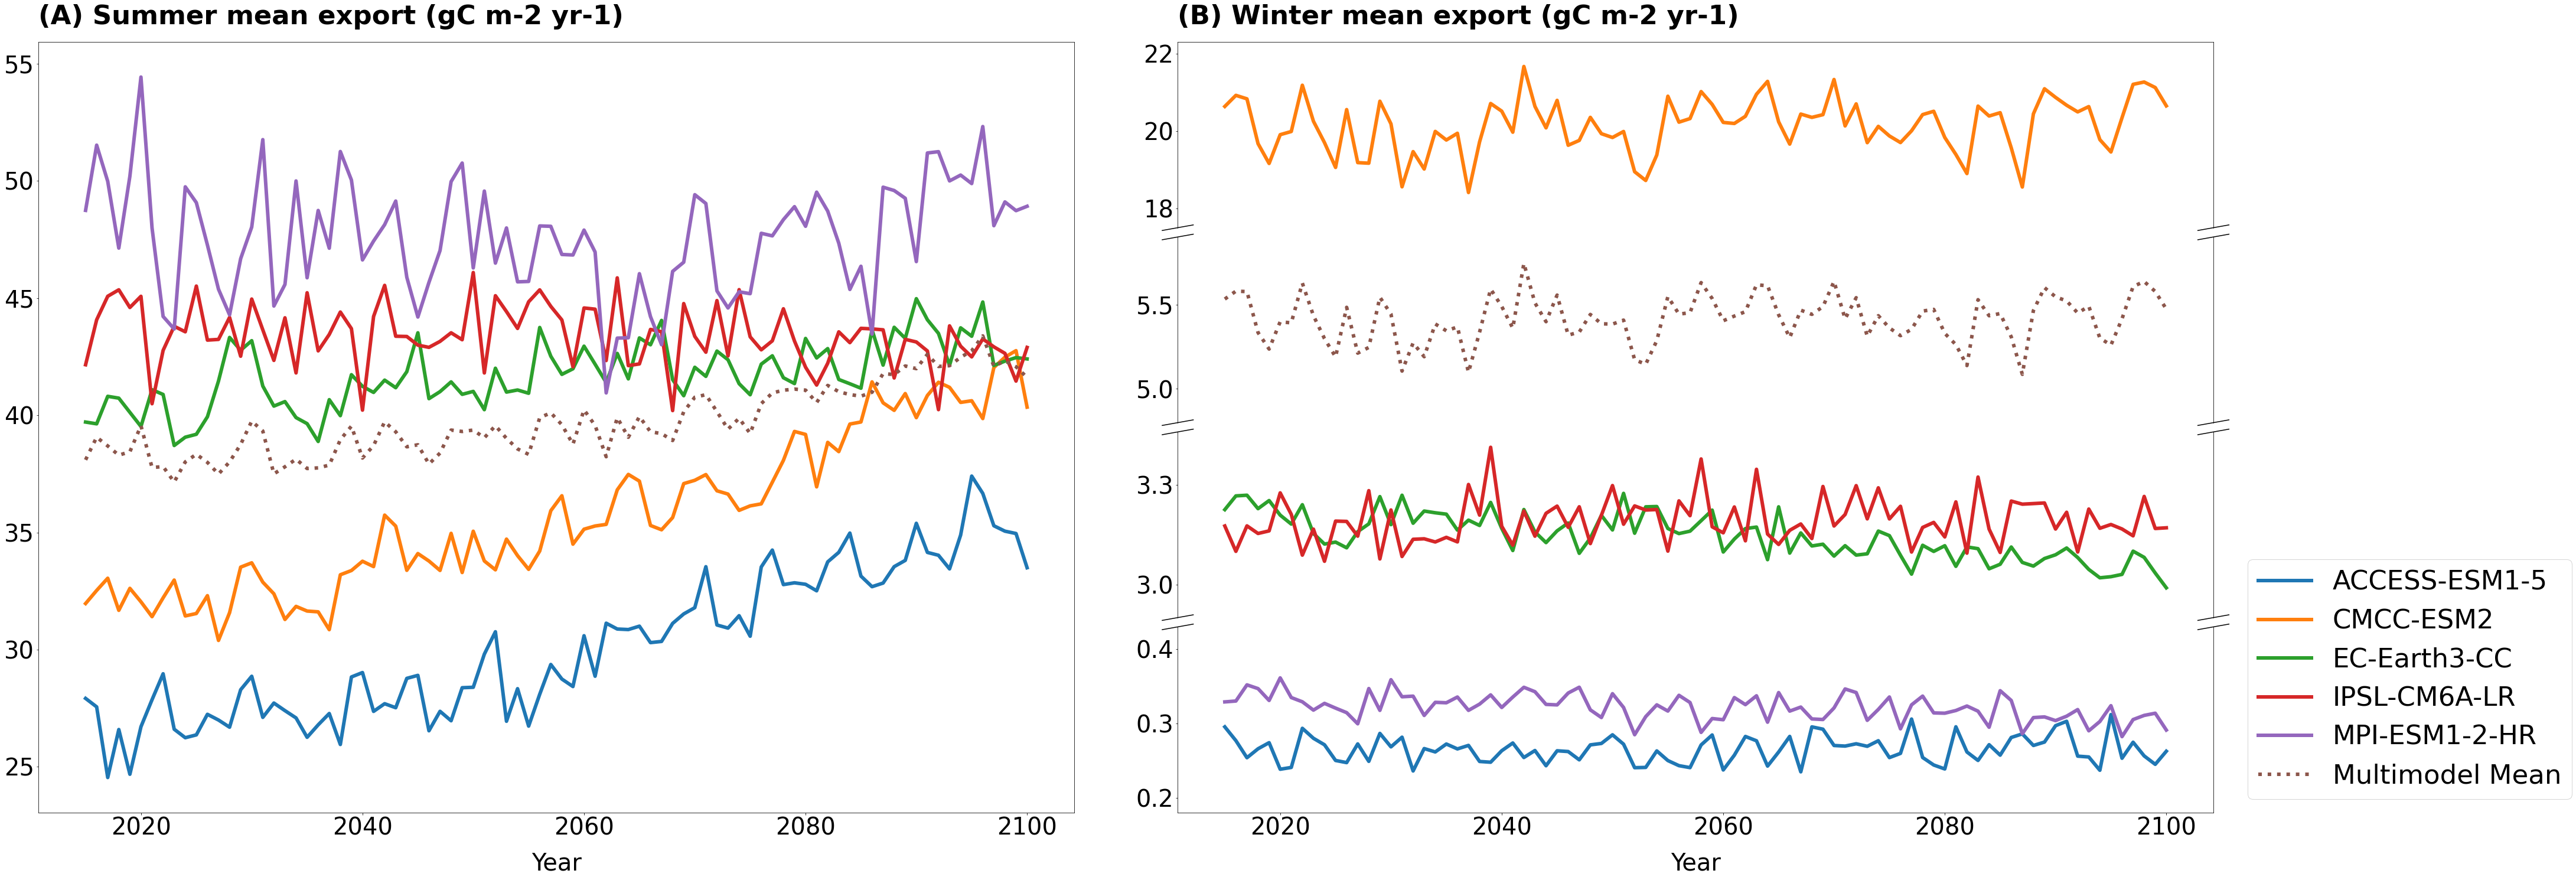

In [110]:
fig = plt.figure(constrained_layout=True, figsize=(66,24))
fig.subplots_adjust(hspace=0.05, wspace = 0.1)


gs = GridSpec(4, 2, figure=fig, height_ratios=[1,1,1,1])
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 1])
ax5 = fig.add_subplot(gs[3,1])

ax1.set_title("(A) Summer mean export (gC m-2 yr-1)", fontweight = "bold", fontsize =45, pad = 30, loc = "left")

Summer.plot.line(ax = ax1, linewidth = 6, legend=False)
Summer_Mean.plot.line(ax = ax1, linewidth = 6, linestyle = ":", legend=False)
ax1.set_xlabel('Year', fontsize = 40, labelpad=20)


ax2.set_title("(B) Winter mean export (gC m-2 yr-1)", fontweight = "bold", fontsize = 45, pad = 30, loc = "left")

Winter.plot.line(ax = ax2, linewidth = 6, legend=False)
Winter.plot.line(ax = ax3, linewidth = 6, legend=False)
Winter_Mean.plot.line(ax = ax3, linewidth = 6, legend=False, linestyle = ":")
Winter.plot.line(ax = ax4, linewidth = 6, legend=False)
Winter.plot.line(ax = ax5, linewidth = 6, legend=False)
Winter_Mean.plot.line(ax = ax5, linewidth = 6, legend=False, linestyle = ":")
ax5.legend(loc='lower left', bbox_to_anchor=(1.02, 0), prop={'size':45})
ax5.set_xlabel('Year', fontsize = 40, labelpad=20)


ax2.set_ylim(17.5, 22.3) 
ax3.set_ylim(4.8, 5.9)
# ax3.yaxis.set_major_locator(mticker.MaxNLocator(2))
ax4.set_ylim(2.9, 3.46)
ax4.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax4.set_yticks([3, 3.3])
ax5.set_ylim(0.18, 0.43)
# ax5.yaxis.set_major_locator(mticker.MaxNLocator(2))

ax2.spines['bottom'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax2.set_xticks([])
ax3.set_xticks([])
ax4.set_xticks([])
ax2.set(xlabel=None)
ax3.set(xlabel=None)
ax4.set(xlabel=None)


d = .015  # how big to make the diagonal lines in axes coordinates (length of line)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal 
# (length along x axis starting d from the left edge of axis, height along y axis starting d from bottom of axis) 
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax3.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax4.transAxes)  # switch to the bottom axes
ax4.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax4.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 


kwargs = dict(transform=ax4.transAxes, color='k', clip_on=False)
ax4.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax4.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax5.transAxes)  # switch to the bottom axes
ax5.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax5.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)


plt.savefig("output/{}/{}_{}_{}_mean_projection_season.png".format(model, variable, model, experiment), bbox_inches='tight')
plt.show()

### Multimodel

In [111]:
Multimodel = Mean.merge(Summer_Mean, on = "Year", how='left')
Multimodel = Multimodel.merge(Winter_Mean, on = "Year", how= "left")
Multimodel

,Multimodel Mean_x,Multimodel Mean_y,Multimodel Mean
Year,,,
2015,17.711475,38.098599,5.532207
2016,18.131488,39.063451,5.579106
2017,17.974893,38.691460,5.576502
2018,17.703275,38.296919,5.333688
2019,17.627375,38.443955,5.235965
...,...,...,...
2096,20.069768,43.388318,5.415167
2097,19.761057,42.092028,5.606660
2098,19.846275,42.318593,5.636078


In [112]:
Multimodel = Multimodel.rename({'Multimodel Mean_x': 'Annual', 'Multimodel Mean_y': 'Summer', "Multimodel Mean" : "Winter"}, axis=1)
Multimodel

,Annual,Summer,Winter
Year,,,
2015,17.711475,38.098599,5.532207
2016,18.131488,39.063451,5.579106
2017,17.974893,38.691460,5.576502
2018,17.703275,38.296919,5.333688
2019,17.627375,38.443955,5.235965
...,...,...,...
2096,20.069768,43.388318,5.415167
2097,19.761057,42.092028,5.606660
2098,19.846275,42.318593,5.636078


In [113]:
Multimodel.to_csv("csv/{}_{}_whole.csv".format(model, variable), index = True, header=True)

In [114]:
df = pd.read_csv("csv/{}_{}_whole.csv".format(model, variable))
df

,Year,Annual,Summer,Winter
0,2015,17.711475,38.098599,5.532207
1,2016,18.131488,39.063451,5.579106
2,2017,17.974893,38.691460,5.576502
3,2018,17.703275,38.296919,5.333688
4,2019,17.627375,38.443955,5.235965
...,...,...,...,...
81,2096,20.069768,43.388318,5.415167
82,2097,19.761057,42.092028,5.606660
83,2098,19.846275,42.318593,5.636078
84,2099,19.790175,42.073061,5.577116


### CSV

In [36]:
df = pd.DataFrame(columns=["Median", "Historical export", "Projected export", "Difference", "Percentage difference", "Increasing area"])
df

,Median,Historical export,Projected export,Difference,Percentage difference,Increasing area


In [226]:
model = ["ACCESS-ESM1-5","CMCC-ESM2","EC-Earth3-CC","IPSL-CM6A-LR","MPI-ESM1-2-HR"]

In [227]:
df = pd.read_csv("csv/epc100_summary.csv")
df["Model"] = model
df

,Median,Historical export,Projected export,Difference,Percentage difference,Increasing area,Model
0,24.962509,0.254498,0.310138,0.055640,21.862832,98.823282,ACCESS-ESM1-5
1,11.107161,0.612310,0.680446,0.068136,11.127748,75.011106,CMCC-ESM2
2,5.545316,0.306217,0.331244,0.025027,8.172810,67.739105,EC-Earth3-CC
3,0.517284,0.535503,0.546291,0.010788,2.014588,52.311660,IPSL-CM6A-LR
4,4.768065,0.396530,0.419288,0.022758,5.739248,66.425321,MPI-ESM1-2-HR


In [228]:
df.rename(columns = {'Median':'Median percentage change (%)', 
                     'Historical export':'Historical total export (Gt C yr-1)',
                    'Projected export': 'Projected total export (Gt C yr-1)',
                    'Percentage difference': 'Percentage difference in total export (%)',
                    'Increasing area': 'Projected area of increasing export (%)'}, inplace = True)
df

,Median percentage change (%),Historical total export (Gt C yr-1),Projected total export (Gt C yr-1),Difference,Percentage difference in total export (%),Projected area of increasing export (%),Model
0,24.962509,0.254498,0.310138,0.055640,21.862832,98.823282,ACCESS-ESM1-5
1,11.107161,0.612310,0.680446,0.068136,11.127748,75.011106,CMCC-ESM2
2,5.545316,0.306217,0.331244,0.025027,8.172810,67.739105,EC-Earth3-CC
3,0.517284,0.535503,0.546291,0.010788,2.014588,52.311660,IPSL-CM6A-LR
4,4.768065,0.396530,0.419288,0.022758,5.739248,66.425321,MPI-ESM1-2-HR


In [230]:
df.to_csv("csv/epc100_summary.csv", mode = "w", header = True, index = False)

## CSV_epc100

### Whole

In [9]:
df = pd.DataFrame(columns=['Percentage','Correlation','p-value', 'Kendall', 'p_value_k', 'Variable','Model','Export'])
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export


In [154]:
df = pd.read_csv("csv/Whole.csv")
df = df.drop_duplicates(keep='first', ignore_index=True)
df = df.replace("Mixed layer depth", "MLD")
df = df.replace("Surface temperature", "SST")
df = df.drop_duplicates(subset=['Variable', 'Model'], keep='last')
#df = df.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])
df
#df.to_csv("csv/Whole.csv", index = False, header = True)


,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export
0,-2.468427,0.078658,5.533611e-08,0.087916,9.538572e-20,Iron,ACCESS-ESM1-5,98.823282
1,27.236971,0.962248,0.000000e+00,0.920251,0.000000e+00,NPP,ACCESS-ESM1-5,98.823282
2,-15.450726,-0.002600,8.576861e-01,-0.254790,4.433980e-153,MLD,ACCESS-ESM1-5,98.823282
3,-4.081037,-0.202379,3.601046e-45,-0.377256,0.000000e+00,Nitrate,ACCESS-ESM1-5,98.823282
4,10.126846,0.232803,1.368212e-59,0.699134,0.000000e+00,PAR,ACCESS-ESM1-5,98.823282
5,-60.337940,0.194737,6.865782e-42,0.471775,0.000000e+00,Sea ice cover,ACCESS-ESM1-5,98.823282
6,0.420085,-0.217568,4.287633e-52,-0.180938,3.648884e-78,SST,ACCESS-ESM1-5,98.823282
7,9.431211,0.480553,6.532724e-259,0.279010,2.269805e-173,Iron,CMCC-ESM2,75.011106
8,16.154680,0.435791,4.276359e-208,0.616666,0.000000e+00,NPP,CMCC-ESM2,75.011106
9,16.627369,0.468408,2.295820e-244,0.644462,0.000000e+00,Diatom,CMCC-ESM2,75.011106


#### Pearson vs Kendall 

In [155]:
#correlation = df[["Correlation", "Kendall"]]
correlation = df.melt(id_vars= ["Variable", "Model"], value_vars=["Correlation", "Kendall"], var_name="Type", value_name="Correlation")
correlation

/tmp/ipykernel_271587/440819743.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


,Variable,Model,Type,Correlation
0,Iron,ACCESS-ESM1-5,Correlation,0.078658
1,NPP,ACCESS-ESM1-5,Correlation,0.962248
2,MLD,ACCESS-ESM1-5,Correlation,-0.002600
3,Nitrate,ACCESS-ESM1-5,Correlation,-0.202379
4,PAR,ACCESS-ESM1-5,Correlation,0.232803
...,...,...,...,...
69,MLD,MPI-ESM1-2-HR,Kendall,-0.067228
70,Nitrate,MPI-ESM1-2-HR,Kendall,-0.516408
71,PAR,MPI-ESM1-2-HR,Kendall,0.557049
72,Sea ice cover,MPI-ESM1-2-HR,Kendall,0.078122


In [156]:
correlation.to_csv("csv/Correlation.csv")

#### Presenting

In [164]:
table = df.drop(columns = ["Export", "Kendall", "p_value_k"])
#table = table.replace("dfe", "dfeos")
table.head()

,Percentage,Correlation,p-value,Variable,Model
0,-2.468427,0.078658,5.533611e-08,Iron,ACCESS-ESM1-5
1,27.236971,0.962248,0.000000e+00,NPP,ACCESS-ESM1-5
2,-15.450726,-0.002600,8.576861e-01,MLD,ACCESS-ESM1-5
3,-4.081037,-0.202379,3.601046e-45,Nitrate,ACCESS-ESM1-5
4,10.126846,0.232803,1.368212e-59,PAR,ACCESS-ESM1-5


In [165]:
table = table.round({"Correlation":3, "p-value":3, "Percentage":2})
table.head()

,Percentage,Correlation,p-value,Variable,Model
0,-2.47,0.079,0.000,Iron,ACCESS-ESM1-5
1,27.24,0.962,0.000,NPP,ACCESS-ESM1-5
2,-15.45,-0.003,0.858,MLD,ACCESS-ESM1-5
3,-4.08,-0.202,0.000,Nitrate,ACCESS-ESM1-5
4,10.13,0.233,0.000,PAR,ACCESS-ESM1-5


In [166]:
table["asterisk"] = ""
table.head()

for i in range(len(table["p-value"])):
    if table["p-value"][i] > 0.05:
        table["asterisk"][i] = " "
    if 0.05 >= table["p-value"][i] > 0.01:
        table["asterisk"][i] = "*"
    if 0.01 >= table["p-value"][i] > 0.001:
        table["asterisk"][i] = "**"
    if table["p-value"][i] <= 0.001:
        table["asterisk"][i] = "***"
        
table.head()

/tmp/ipykernel_104331/2186864484.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_104331/2186864484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Percentage,Correlation,p-value,Variable,Model,asterisk
0,-2.47,0.079,0.000,Iron,ACCESS-ESM1-5,***
1,27.24,0.962,0.000,NPP,ACCESS-ESM1-5,***
2,-15.45,-0.003,0.858,MLD,ACCESS-ESM1-5,
3,-4.08,-0.202,0.000,Nitrate,ACCESS-ESM1-5,***
4,10.13,0.233,0.000,PAR,ACCESS-ESM1-5,***


In [167]:
table = table.drop(columns = "p-value")
table.head()

,Percentage,Correlation,Variable,Model,asterisk
0,-2.47,0.079,Iron,ACCESS-ESM1-5,***
1,27.24,0.962,NPP,ACCESS-ESM1-5,***
2,-15.45,-0.003,MLD,ACCESS-ESM1-5,
3,-4.08,-0.202,Nitrate,ACCESS-ESM1-5,***
4,10.13,0.233,PAR,ACCESS-ESM1-5,***


In [168]:
table["Correlation with export (Median percentage change by 2100)"] = table["Correlation"].astype(str) + table["asterisk"].astype(str) + " " + table["Percentage"].astype(str)
table = table.drop(columns = ["Percentage", "Correlation", "asterisk"])
table.head()

,Variable,Model,Correlation with export (Median percentage change by 2100)
0,Iron,ACCESS-ESM1-5,0.079*** -2.47
1,NPP,ACCESS-ESM1-5,0.962*** 27.24
2,MLD,ACCESS-ESM1-5,-0.003 -15.45
3,Nitrate,ACCESS-ESM1-5,-0.202*** -4.08
4,PAR,ACCESS-ESM1-5,0.233*** 10.13


In [169]:
table = table.pivot(index="Model", columns="Variable", values="Correlation with export (Median percentage change by 2100)")
table

Variable,Diatom,Iron,MLD,NPP,Nitrate,PAR,SST,Sea ice cover
Model,,,,,,,,
ACCESS-ESM1-5,NaN,0.079*** -2.47,-0.003 -15.45,0.962*** 27.24,-0.202*** -4.08,0.233*** 10.13,-0.218*** 0.42,0.195*** -60.34
CMCC-ESM2,0.468*** 16.63,0.481*** 9.43,0.147*** -8.44,0.436*** 16.15,0.155*** -6.46,0.361*** 4.46,-0.247*** 0.33,0.219*** -64.7
EC-Earth3-CC,0.945*** 7.0,NaN,0.366*** -14.98,0.933*** 12.73,0.163*** -3.55,0.731*** 5.68,0.216*** 0.5,0.147*** -89.42
IPSL-CM6A-LR,0.98*** -2.07,0.148*** -16.75,-0.22*** -13.35,0.972*** 10.68,-0.548*** -5.9,0.738*** 12.26,-0.293*** 0.53,0.32*** -55.47
MPI-ESM1-2-HR,NaN,-0.675*** -1.58,0.01 -18.06,0.919*** 4.37,-0.652*** 0.08,0.796*** -1.13,0.174*** 0.25,0.186*** -53.12


In [170]:
table.to_csv("csv/Whole_result.csv")

### Zonal

In [7]:
df = pd.DataFrame(columns=['Percentage','Correlation','p-value','Kendall', 'p_value_k','Variable','Model', 'Zone'])
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone


In [157]:
df = pd.read_csv("csv/Zone.csv")
df = df.drop_duplicates(keep='first', ignore_index=True)
df = df.replace("inc", "Inc")
df = df.replace("dec", "Dec")
df = df.replace("Mixed layer depth", "MLD")
df = df.replace("Surface temperature", "SST")
df
#df = df.drop(columns=["Unnamed: 0.3","Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"])
#df.to_csv("csv/Zone.csv", header = True, index = False)

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone
0,-2.462672,0.078637,6.101243e-08,0.087930,1.204600e-19,Iron,ACCESS-ESM1-5,Inc
1,-1.107071,0.651291,1.972036e-11,0.505450,9.982149e-12,Iron,ACCESS-ESM1-5,Dec
2,27.305784,0.962277,0.000000e+00,0.919324,0.000000e+00,NPP,ACCESS-ESM1-5,Inc
3,1.472819,0.973968,1.257004e-54,0.866896,1.725820e-31,NPP,ACCESS-ESM1-5,Dec
4,-15.599908,-0.001912,8.953895e-01,-0.249995,1.365364e-146,MLD,ACCESS-ESM1-5,Inc
...,...,...,...,...,...,...,...,...
69,-5.535353,0.329201,2.061341e-53,0.177982,7.829417e-34,PAR,MPI-ESM1-2-HR,Dec
70,-52.975853,0.243787,5.027780e-51,0.126296,2.899088e-30,Sea ice cover,MPI-ESM1-2-HR,Inc
71,-69.688301,0.104315,2.124549e-06,0.011032,4.591581e-01,Sea ice cover,MPI-ESM1-2-HR,Dec
72,0.254590,0.088261,7.466404e-08,0.105299,7.473247e-22,SST,MPI-ESM1-2-HR,Inc


#### Pearson vs Kendall 

In [158]:
#correlation = df[["Correlation", "Kendall"]]
correlation = df.melt(id_vars= ["Variable", "Model", "Zone"], value_vars=["Correlation", "Kendall"], var_name="Type", value_name="Correlation")
correlation

/tmp/ipykernel_271587/1013150725.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


,Variable,Model,Zone,Type,Correlation
0,Iron,ACCESS-ESM1-5,Inc,Correlation,0.078637
1,Iron,ACCESS-ESM1-5,Dec,Correlation,0.651291
2,NPP,ACCESS-ESM1-5,Inc,Correlation,0.962277
3,NPP,ACCESS-ESM1-5,Dec,Correlation,0.973968
4,MLD,ACCESS-ESM1-5,Inc,Correlation,-0.001912
...,...,...,...,...,...
143,PAR,MPI-ESM1-2-HR,Dec,Kendall,0.177982
144,Sea ice cover,MPI-ESM1-2-HR,Inc,Kendall,0.126296
145,Sea ice cover,MPI-ESM1-2-HR,Dec,Kendall,0.011032
146,SST,MPI-ESM1-2-HR,Inc,Kendall,0.105299


In [159]:
correlation.to_csv("csv/Correlation_zone.csv")

#### Presenting

In [196]:
table = df.drop(columns = ["Kendall", "p_value_k", "Unnamed: 0", "Unnamed: 0.1"])
table.head()

,Unnamed: 0.2,Percentage,Correlation,p-value,Variable,Model,Zone
0,0,-2.462672,0.078637,6.101243e-08,Iron,ACCESS-ESM1-5,Inc
1,1,-1.107071,0.651291,1.972036e-11,Iron,ACCESS-ESM1-5,Dec
2,2,27.305784,0.962277,0.000000e+00,NPP,ACCESS-ESM1-5,Inc
3,3,1.472819,0.973968,1.257004e-54,NPP,ACCESS-ESM1-5,Dec
4,4,-15.599908,-0.001912,8.953895e-01,MLD,ACCESS-ESM1-5,Inc


In [197]:
table = table.round({"Correlation":3, "p-value":3, "Percentage":2})

In [198]:
table["asterisk"] = ""
table.head()

for i in range(len(table["p-value"])):
    if table["p-value"][i] > 0.05:
        table["asterisk"][i] = " "
    if 0.05 >= table["p-value"][i] > 0.01:
        table["asterisk"][i] = "*"
    if 0.01 >= table["p-value"][i] > 0.001:
        table["asterisk"][i] = "**"
    if table["p-value"][i] <= 0.001:
        table["asterisk"][i] = "***"
        
table

/tmp/ipykernel_104331/1997897420.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_104331/1997897420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_104331/1997897420.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0.2,Percentage,Correlation,p-value,Variable,Model,Zone,asterisk
0,0,-2.46,0.079,0.000,Iron,ACCESS-ESM1-5,Inc,***
1,1,-1.11,0.651,0.000,Iron,ACCESS-ESM1-5,Dec,***
2,2,27.31,0.962,0.000,NPP,ACCESS-ESM1-5,Inc,***
3,3,1.47,0.974,0.000,NPP,ACCESS-ESM1-5,Dec,***
4,4,-15.60,-0.002,0.895,MLD,ACCESS-ESM1-5,Inc,
...,...,...,...,...,...,...,...,...
69,69,-5.54,0.329,0.000,PAR,MPI-ESM1-2-HR,Dec,***
70,70,-52.98,0.244,0.000,Sea ice cover,MPI-ESM1-2-HR,Inc,***
71,71,-69.69,0.104,0.000,Sea ice cover,MPI-ESM1-2-HR,Dec,***
72,72,0.25,0.088,0.000,SST,MPI-ESM1-2-HR,Inc,***


In [199]:
table = table.drop(columns = "p-value")
table.head()

,Unnamed: 0.2,Percentage,Correlation,Variable,Model,Zone,asterisk
0,0,-2.46,0.079,Iron,ACCESS-ESM1-5,Inc,***
1,1,-1.11,0.651,Iron,ACCESS-ESM1-5,Dec,***
2,2,27.31,0.962,NPP,ACCESS-ESM1-5,Inc,***
3,3,1.47,0.974,NPP,ACCESS-ESM1-5,Dec,***
4,4,-15.60,-0.002,MLD,ACCESS-ESM1-5,Inc,


In [200]:
table["Correlation with export (Median percentage change by 2100)"] = table["Correlation"].astype(str) + table["asterisk"].astype(str) + " " + table["Percentage"].astype(str)
table = table.drop(columns = ["Percentage", "Correlation", "asterisk"])
table.head()

,Unnamed: 0.2,Variable,Model,Zone,Correlation with export (Median percentage change by 2100)
0,0,Iron,ACCESS-ESM1-5,Inc,0.079*** -2.46
1,1,Iron,ACCESS-ESM1-5,Dec,0.651*** -1.11
2,2,NPP,ACCESS-ESM1-5,Inc,0.962*** 27.31
3,3,NPP,ACCESS-ESM1-5,Dec,0.974*** 1.47
4,4,MLD,ACCESS-ESM1-5,Inc,-0.002 -15.6


In [201]:
table = table.drop_duplicates(keep='first', ignore_index=True)

In [202]:
table = table.pivot(index="Model", columns=["Variable", "Zone"], values="Correlation with export (Median percentage change by 2100)")
table

Variable                  Iron                              NPP  \
Zone                       Inc              Dec             Inc   
Model                                                             
ACCESS-ESM1-5   0.079*** -2.46   0.651*** -1.11  0.962*** 27.31   
CMCC-ESM2       0.471*** 10.23    0.106*** 7.41  0.416*** 19.66   
EC-Earth3-CC               NaN              NaN  0.929*** 16.93   
IPSL-CM6A-LR    0.06*** -13.18  0.295*** -24.81   0.974*** 16.0   
MPI-ESM1-2-HR  -0.644*** -2.52    -0.48*** 0.44   0.897*** 8.01   

Variable                                    MLD                   \
Zone                      Dec               Inc              Dec   
Model                                                              
ACCESS-ESM1-5   0.974*** 1.47     -0.002  -15.6  -0.613*** -6.97   
CMCC-ESM2       0.543*** 1.72    0.091*** -7.64   -0.084** -9.83   
EC-Earth3-CC     0.671*** 3.8   0.394*** -13.72   -0.031  -18.98   
IPSL-CM6A-LR    0.585*** 4.72  -0.262*** -17.26   0.116*** -10.2   
MPI-ESM1-2-HR  0.747*** -4.11     0.005  -19.04  -0.063** -14.07   

Variable               Nitrate                              PAR  \
Zone                       Inc              Dec             Inc   
Model                                                             
ACCESS-ESM1-5  -0.202*** -4.09     0.163  -2.26   0.233*** 10.2   
CMCC-ESM2        0.177*** -6.8    -0.07** -6.15    0.35*** 9.16   
EC-Earth3-CC     0.153*** -3.3      -0.0  -4.06   0.735*** 7.42   
IPSL-CM6A-LR   -0.577*** -8.59  -0.124*** -4.48  0.785*** 17.87   
MPI-ESM1-2-HR  -0.612*** -0.88    -0.48*** 2.22   0.777*** 1.86   

Variable                         Sea ice cover                    \
Zone                      Dec              Inc               Dec   
Model                                                              
ACCESS-ESM1-5   0.315** -3.54  0.197*** -60.78  -0.413*** -28.09   
CMCC-ESM2      0.394*** -5.46  0.134*** -55.11    0.398*** -99.7   
EC-Earth3-CC   0.208*** -1.16   0.131*** -88.3   0.132*** -96.26   
IPSL-CM6A-LR      0.032  5.48  0.336*** -39.96   -0.072*** -77.9   
MPI-ESM1-2-HR  0.329*** -5.54  0.244*** -52.98   0.104*** -69.69   

Variable                  SST                          Diatom                  
Zone                      Inc             Dec             Inc             Dec  
Model                                                                          
ACCESS-ESM1-5  -0.221*** 0.42   0.502*** 0.21             NaN             NaN  
CMCC-ESM2       -0.121*** 0.3  -0.446*** 0.56  0.444*** 20.75    0.58*** 0.14  
EC-Earth3-CC    0.288*** 0.52  -0.156*** 0.45  0.939*** 12.58  0.723*** -6.42  
IPSL-CM6A-LR   -0.327*** 0.48     0.001  0.65   0.983*** 6.31   0.7*** -12.37  
MPI-ESM1-2-HR   0.088*** 0.25   0.084*** 0.22             NaN             NaN

In [203]:
table.to_csv("csv/Zonal_result.csv")

### Season

In [11]:
df = pd.DataFrame(columns=['Percentage','Correlation','p-value','Kendall','p_value_k','Variable','Model','Season'])
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Season


In [160]:
df = pd.read_csv("csv/Season.csv")
df = df.drop_duplicates(keep='first', ignore_index=True)
df = df.replace("summer", "Summer")
df = df.replace("winter", "Winter")
df = df.replace("Mixed layer depth", "MLD")
df = df.replace("Surface temperature", "SST")

#df = df.drop_duplicates(subset=['Variable', 'Model',"Season"], keep='last')
#df = df.drop(columns=["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"])
df
#df.to_csv("csv/Season.csv", index = False, header = True)

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Season
0,-3.422902,0.066764,4.032387e-06,0.000544,9.551254e-01,Iron,ACCESS-ESM1-5,Summer
1,-2.195176,0.057345,7.552076e-05,0.106277,4.114040e-28,Iron,ACCESS-ESM1-5,Winter
2,23.932030,0.913848,0.000000e+00,0.851530,0.000000e+00,NPP,ACCESS-ESM1-5,Summer
3,59.186405,0.485741,2.450209e-280,0.397760,0.000000e+00,NPP,ACCESS-ESM1-5,Winter
4,-2.834392,-0.145344,6.946089e-24,-0.334398,3.544294e-262,MLD,ACCESS-ESM1-5,Summer
...,...,...,...,...,...,...,...,...
69,0.169867,-0.095135,3.407718e-11,-0.024559,1.045651e-02,SST,MPI-ESM1-2-HR,Winter
70,-82.719254,-0.022935,1.710299e-01,0.083925,1.729302e-13,Sea ice cover,MPI-ESM1-2-HR,Summer
71,-67.499939,-0.006900,6.355001e-01,0.092249,7.009389e-21,Sea ice cover,MPI-ESM1-2-HR,Winter
72,-100.000000,-0.004178,8.271454e-01,0.257943,1.027701e-76,Sea ice cover,EC-Earth3-CC,Summer


#### Pearson vs Kendall 

In [161]:
#correlation = df[["Correlation", "Kendall"]]
correlation = df.melt(id_vars= ["Variable", "Model", "Season"], value_vars=["Correlation", "Kendall"], var_name="Type", value_name="Correlation")
correlation

/tmp/ipykernel_271587/4176514999.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


,Variable,Model,Season,Type,Correlation
0,Iron,ACCESS-ESM1-5,Summer,Correlation,0.066764
1,Iron,ACCESS-ESM1-5,Winter,Correlation,0.057345
2,NPP,ACCESS-ESM1-5,Summer,Correlation,0.913848
3,NPP,ACCESS-ESM1-5,Winter,Correlation,0.485741
4,MLD,ACCESS-ESM1-5,Summer,Correlation,-0.145344
...,...,...,...,...,...
143,SST,MPI-ESM1-2-HR,Winter,Kendall,-0.024559
144,Sea ice cover,MPI-ESM1-2-HR,Summer,Kendall,0.083925
145,Sea ice cover,MPI-ESM1-2-HR,Winter,Kendall,0.092249
146,Sea ice cover,EC-Earth3-CC,Summer,Kendall,0.257943


In [162]:
correlation.to_csv("csv/Correlation_season.csv")

#### Presenting

In [210]:
table = df.drop(columns = ["Kendall", "p_value_k"])
table.head()

,Unnamed: 0.1,Unnamed: 0,Percentage,Correlation,p-value,Variable,Model,Season
0,0,0,-3.422902,0.066764,4.032387e-06,Iron,ACCESS-ESM1-5,Summer
1,1,1,-2.195176,0.057345,7.552076e-05,Iron,ACCESS-ESM1-5,Winter
2,2,2,23.932030,0.913848,0.000000e+00,NPP,ACCESS-ESM1-5,Summer
3,3,3,59.186405,0.485741,2.450209e-280,NPP,ACCESS-ESM1-5,Winter
4,4,4,-2.834392,-0.145344,6.946089e-24,MLD,ACCESS-ESM1-5,Summer


In [211]:
table = table.round({"Correlation":3, "p-value":3, "Percentage":2})

In [212]:
table["asterisk"] = ""
table.head()

for i in range(len(table["p-value"])):
    if table["p-value"][i] > 0.05:
        table["asterisk"][i] = " "
    if 0.05 >= table["p-value"][i] > 0.01:
        table["asterisk"][i] = "*"
    if 0.01 >= table["p-value"][i] > 0.001:
        table["asterisk"][i] = "**"
    if table["p-value"][i] <= 0.001:
        table["asterisk"][i] = "***"
        
table

/tmp/ipykernel_104331/1997897420.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_104331/1997897420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_104331/1997897420.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0.1,Unnamed: 0,Percentage,Correlation,p-value,Variable,Model,Season,asterisk
0,0,0,-3.42,0.067,0.000,Iron,ACCESS-ESM1-5,Summer,***
1,1,1,-2.20,0.057,0.000,Iron,ACCESS-ESM1-5,Winter,***
2,2,2,23.93,0.914,0.000,NPP,ACCESS-ESM1-5,Summer,***
3,3,3,59.19,0.486,0.000,NPP,ACCESS-ESM1-5,Winter,***
4,4,4,-2.83,-0.145,0.000,MLD,ACCESS-ESM1-5,Summer,***
...,...,...,...,...,...,...,...,...,...
69,69,69,27.03,0.140,0.000,PAR,MPI-ESM1-2-HR,Winter,***
70,70,70,-82.72,-0.023,0.171,Sea ice cover,MPI-ESM1-2-HR,Summer,
71,71,71,-67.50,NaN,NaN,Sea ice cover,MPI-ESM1-2-HR,Winter,
72,72,72,0.35,0.595,0.000,SST,MPI-ESM1-2-HR,Summer,***


In [213]:
table = table.drop(columns = "p-value")
table.head()

,Unnamed: 0.1,Unnamed: 0,Percentage,Correlation,Variable,Model,Season,asterisk
0,0,0,-3.42,0.067,Iron,ACCESS-ESM1-5,Summer,***
1,1,1,-2.20,0.057,Iron,ACCESS-ESM1-5,Winter,***
2,2,2,23.93,0.914,NPP,ACCESS-ESM1-5,Summer,***
3,3,3,59.19,0.486,NPP,ACCESS-ESM1-5,Winter,***
4,4,4,-2.83,-0.145,MLD,ACCESS-ESM1-5,Summer,***


In [214]:
table["Correlation with export (Median percentage change by 2100)"] = table["Correlation"].astype(str) + table["asterisk"].astype(str) + " " + table["Percentage"].astype(str)
table = table.drop(columns = ["Percentage", "Correlation", "asterisk"])
table.head()

,Unnamed: 0.1,Unnamed: 0,Variable,Model,Season,Correlation with export (Median percentage change by 2100)
0,0,0,Iron,ACCESS-ESM1-5,Summer,0.067*** -3.42
1,1,1,Iron,ACCESS-ESM1-5,Winter,0.057*** -2.2
2,2,2,NPP,ACCESS-ESM1-5,Summer,0.914*** 23.93
3,3,3,NPP,ACCESS-ESM1-5,Winter,0.486*** 59.19
4,4,4,MLD,ACCESS-ESM1-5,Summer,-0.145*** -2.83


In [215]:
table = table.pivot(index="Model", columns=["Variable", "Season"], values="Correlation with export (Median percentage change by 2100)")
table

Variable                  Iron                               NPP  \
Season                  Summer            Winter          Summer   
Model                                                              
ACCESS-ESM1-5   0.067*** -3.42     0.057*** -2.2  0.914*** 23.93   
CMCC-ESM2       -0.361*** 7.41     0.767*** 11.2  0.167*** -2.28   
EC-Earth3-CC               NaN               NaN    0.706*** 2.7   
IPSL-CM6A-LR   0.282*** -17.81  -0.067*** -15.32   0.967*** -0.7   
MPI-ESM1-2-HR  -0.674*** -0.88      0.028  -0.47  0.682*** -3.57   

Variable                                    MLD                    \
Season                  Winter           Summer            Winter   
Model                                                               
ACCESS-ESM1-5   0.486*** 59.19  -0.145*** -2.83     -0.015  -17.2   
CMCC-ESM2       -0.018  -11.19     0.71*** 1.07   -0.126*** -7.33   
EC-Earth3-CC    -0.18*** 91.04   0.219*** -1.47  -0.076*** -16.56   
IPSL-CM6A-LR   -0.112*** 49.18   -0.64*** -5.55   -0.441*** -13.8   
MPI-ESM1-2-HR   0.257*** 33.04     0.611*** 1.3   0.183*** -18.86   

Variable               Nitrate                              PAR  \
Season                  Summer           Winter          Summer   
Model                                                             
ACCESS-ESM1-5  -0.125*** -4.98  -0.166*** -3.66   0.132*** 0.29   
CMCC-ESM2        0.166*** -8.6     0.003  -4.88  0.404*** -3.42   
EC-Earth3-CC   -0.135*** -4.03    -0.026  -2.72  0.681*** -4.21   
IPSL-CM6A-LR   -0.622*** -3.61  -0.556*** -6.63  0.851*** -0.16   
MPI-ESM1-2-HR   -0.686*** 2.76       0.007  0.8  0.728*** -7.37   

Variable                           Sea ice cover                    \
Season                  Winter            Summer            Winter   
Model                                                                
ACCESS-ESM1-5   0.046*** 40.54    0.21*** -83.93   0.141*** -76.31   
CMCC-ESM2      -0.092*** 22.32  -0.067*** -89.86   0.366*** -77.86   
EC-Earth3-CC   -0.259*** 41.66        nan -100.0  -0.075*** -95.51   
IPSL-CM6A-LR   -0.171*** 18.59    0.39*** -87.36   0.537*** -68.54   
MPI-ESM1-2-HR    0.14*** 27.03    -0.023  -82.72         nan -67.5   

Variable                  SST                           Diatom  \
Season                 Summer          Winter           Summer   
Model                                                            
ACCESS-ESM1-5  -0.139*** 0.57   -0.104*** 0.3              NaN   
CMCC-ESM2       0.427*** 0.48    -0.42*** 0.3   0.146*** -3.37   
EC-Earth3-CC    0.581*** 0.64    0.06*** 0.42   0.877*** -4.22   
IPSL-CM6A-LR    -0.036** 0.87  -0.454*** 0.31  0.969*** -13.09   
MPI-ESM1-2-HR   0.595*** 0.35  -0.095*** 0.17              NaN   

Variable                        
Season                  Winter  
Model                           
ACCESS-ESM1-5              NaN  
CMCC-ESM2          0.006  -4.9  
EC-Earth3-CC   -0.177*** 69.12  
IPSL-CM6A-LR     -0.12*** 35.2  
MPI-ESM1-2-HR              NaN

In [216]:
table.to_csv("csv/Season_result.csv")

## CSV_siconc


### Whole

In [343]:
df = pd.DataFrame(columns=['Correlation_ice','p-value_ice', 'Variable','Model', 'Correlation_ice_k','p-value_ice_k'])
df

,Correlation_ice,p-value_ice,Variable,Model,Correlation_ice_k,p-value_ice_k


In [46]:
ice = pd.read_csv("csv/Whole_ice.csv")
ice = ice.drop_duplicates(keep='first', ignore_index=True)
ice = ice.replace("Mixed layer depth", "MLD")
ice = ice.replace("Surface temperature", "SST")
ice

,Correlation_ice,p-value_ice,Variable,Model,Correlation_ice_k,p-value_ice_k
0,0.137641,6.220463e-16,NPP,EC-Earth3-CC,0.227936,2.338984e-87
1,0.031603,6.461119e-02,Diatom,EC-Earth3-CC,0.117251,2.164705e-24
2,-0.264444,8.015219e-56,MLD,EC-Earth3-CC,-0.146116,5.884951e-37
3,-0.563755,3.293593e-286,Nitrate,EC-Earth3-CC,-0.380026,2.842947e-239
4,0.397966,3.636984e-130,PAR,EC-Earth3-CC,0.422837,1.046424e-295
5,-0.437232,1.482274e-227,Iron,MPI-ESM1-2-HR,-0.276378,6.022320e-182
6,0.219424,2.131287e-54,NPP,MPI-ESM1-2-HR,0.096191,1.362052e-23
7,-0.629063,0.000000e+00,MLD,MPI-ESM1-2-HR,-0.484581,0.000000e+00
8,-0.445519,3.289504e-237,Nitrate,MPI-ESM1-2-HR,-0.273273,6.297463e-178
9,0.326070,1.606746e-121,PAR,MPI-ESM1-2-HR,0.223130,2.705778e-119


##### Merging

In [47]:
df = pd.read_csv("csv/Whole.csv")
df = df.drop_duplicates(keep='first', ignore_index=True)
df = df.replace("Mixed layer depth", "MLD")
df = df.replace("Surface temperature", "SST")
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export
0,-2.468427,0.078658,5.533611e-08,0.087916,9.538572e-20,Iron,ACCESS-ESM1-5,98.823282
1,27.236971,0.962248,0.000000e+00,0.920251,0.000000e+00,NPP,ACCESS-ESM1-5,98.823282
2,-15.450726,-0.002600,8.576861e-01,-0.254790,4.433980e-153,MLD,ACCESS-ESM1-5,98.823282
3,-4.081037,-0.202379,3.601046e-45,-0.377256,0.000000e+00,Nitrate,ACCESS-ESM1-5,98.823282
4,10.126846,0.232803,1.368212e-59,0.699134,0.000000e+00,PAR,ACCESS-ESM1-5,98.823282
5,-60.337940,0.194737,6.865782e-42,0.471775,0.000000e+00,Sea ice cover,ACCESS-ESM1-5,98.823282
6,0.420085,-0.217568,4.287633e-52,-0.180938,3.648884e-78,SST,ACCESS-ESM1-5,98.823282
7,9.431211,0.480553,6.532724e-259,0.279010,2.269805e-173,Iron,CMCC-ESM2,75.011106
8,16.154680,0.435791,4.276359e-208,0.616666,0.000000e+00,NPP,CMCC-ESM2,75.011106
9,16.627369,0.468408,2.295820e-244,0.644462,0.000000e+00,Diatom,CMCC-ESM2,75.011106


In [48]:
ice_merged = pd.merge(df, ice, on=['Model', 'Variable'], how='left')
ice_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k
0,-2.468427,0.078658,5.533611e-08,0.087916,9.538572e-20,Iron,ACCESS-ESM1-5,98.823282,0.215594,2.434828e-51,0.199496,9.957072e-95
1,27.236971,0.962248,0.000000e+00,0.920251,0.000000e+00,NPP,ACCESS-ESM1-5,98.823282,0.269114,4.974367e-80,0.443192,0.000000e+00
2,-15.450726,-0.002600,8.576861e-01,-0.254790,4.433980e-153,MLD,ACCESS-ESM1-5,98.823282,-0.350271,6.664737e-138,-0.300397,3.007643e-212
3,-4.081037,-0.202379,3.601046e-45,-0.377256,0.000000e+00,Nitrate,ACCESS-ESM1-5,98.823282,-0.542336,0.000000e+00,-0.360729,4.023457e-305
4,10.126846,0.232803,1.368212e-59,0.699134,0.000000e+00,PAR,ACCESS-ESM1-5,98.823282,0.494577,3.691361e-293,0.429082,0.000000e+00
5,-60.337940,0.194737,6.865782e-42,0.471775,0.000000e+00,Sea ice cover,ACCESS-ESM1-5,98.823282,NaN,NaN,NaN,NaN
6,0.420085,-0.217568,4.287633e-52,-0.180938,3.648884e-78,SST,ACCESS-ESM1-5,98.823282,NaN,NaN,NaN,NaN
7,9.431211,0.480553,6.532724e-259,0.279010,2.269805e-173,Iron,CMCC-ESM2,75.011106,0.040079,7.148848e-03,-0.011559,2.473142e-01
8,16.154680,0.435791,4.276359e-208,0.616666,0.000000e+00,NPP,CMCC-ESM2,75.011106,0.096646,8.097567e-11,0.238778,3.122493e-126
9,16.627369,0.468408,2.295820e-244,0.644462,0.000000e+00,Diatom,CMCC-ESM2,75.011106,0.123673,8.176580e-17,0.268961,1.274443e-159



#### Epc100

In [346]:
df = pd.DataFrame(columns=['Percentage','Correlation_ice','p-value_ice', 'Variable','Model','Correlation_ice_k','p-value_ice_k'])
df

,Percentage,Correlation_ice,p-value_ice,Variable,Model,Correlation_ice_k,p-value_ice_k


In [49]:
per = pd.read_csv("csv/Whole_ice_epc100.csv")
per = per.drop_duplicates(keep='first', ignore_index=True)
per = per.replace("Mixed layer depth", "MLD")
per = per.replace("Surface temperature", "SST")
per

,Percentage,Correlation_ice,p-value_ice,Variable,Model,Correlation_ice_k,p-value_ice_k
0,5.545316,0.147418,4.551038e-18,Export,EC-Earth3-CC,0.192778,5.320126e-63
1,66.313568,-0.392201,3.741573e-126,SST,EC-Earth3-CC,-0.263491,4.382410e-116
2,-27.207460,-0.765058,0.000000e+00,SST,MPI-ESM1-2-HR,-0.599061,0.000000e+00
3,4.768065,0.186267,7.503944e-39,Export,MPI-ESM1-2-HR,0.078122,7.252745e-16
4,-9.821316,-0.784487,0.000000e+00,SST,ACCESS-ESM1-5,-0.597016,0.000000e+00
5,24.962509,0.194737,6.865782e-42,Export,ACCESS-ESM1-5,0.471775,0.000000e+00
6,-50.563782,-0.884215,0.000000e+00,SST,CMCC-ESM2,-0.745390,0.000000e+00
7,11.107161,0.219237,3.974137e-50,Export,CMCC-ESM2,0.261307,9.568829e-151
8,0.517284,0.319764,2.614434e-129,Export,IPSL-CM6A-LR,0.264840,1.175891e-186
9,-55.288101,-0.865872,0.000000e+00,SST,IPSL-CM6A-LR,-0.710435,0.000000e+00


##### Merging 

In [50]:
export = per[per["Variable"] == "Export"]
export

,Percentage,Correlation_ice,p-value_ice,Variable,Model,Correlation_ice_k,p-value_ice_k
0,5.545316,0.147418,4.551038e-18,Export,EC-Earth3-CC,0.192778,5.320126e-63
3,4.768065,0.186267,7.503944e-39,Export,MPI-ESM1-2-HR,0.078122,7.252745e-16
5,24.962509,0.194737,6.865782e-42,Export,ACCESS-ESM1-5,0.471775,0.000000e+00
7,11.107161,0.219237,3.974137e-50,Export,CMCC-ESM2,0.261307,9.568829e-151
8,0.517284,0.319764,2.614434e-129,Export,IPSL-CM6A-LR,0.264840,1.175891e-186


In [52]:
export_merged = pd.merge(ice_merged, export, how='outer', on=['Model', 'Variable', 'Percentage', 'Correlation_ice','p-value_ice', 'Correlation_ice_k','p-value_ice_k'])
export_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k
0,-2.468427,0.078658,5.533611e-08,0.087916,9.538572e-20,Iron,ACCESS-ESM1-5,98.823282,0.215594,2.434828e-51,0.199496,9.957072e-95
1,27.236971,0.962248,0.000000e+00,0.920251,0.000000e+00,NPP,ACCESS-ESM1-5,98.823282,0.269114,4.974367e-80,0.443192,0.000000e+00
2,-15.450726,-0.002600,8.576861e-01,-0.254790,4.433980e-153,MLD,ACCESS-ESM1-5,98.823282,-0.350271,6.664737e-138,-0.300397,3.007643e-212
3,-4.081037,-0.202379,3.601046e-45,-0.377256,0.000000e+00,Nitrate,ACCESS-ESM1-5,98.823282,-0.542336,0.000000e+00,-0.360729,4.023457e-305
4,10.126846,0.232803,1.368212e-59,0.699134,0.000000e+00,PAR,ACCESS-ESM1-5,98.823282,0.494577,3.691361e-293,0.429082,0.000000e+00
5,-60.337940,0.194737,6.865782e-42,0.471775,0.000000e+00,Sea ice cover,ACCESS-ESM1-5,98.823282,NaN,NaN,NaN,NaN
6,0.420085,-0.217568,4.287633e-52,-0.180938,3.648884e-78,SST,ACCESS-ESM1-5,98.823282,NaN,NaN,NaN,NaN
7,9.431211,0.480553,6.532724e-259,0.279010,2.269805e-173,Iron,CMCC-ESM2,75.011106,0.040079,7.148848e-03,-0.011559,2.473142e-01
8,16.154680,0.435791,4.276359e-208,0.616666,0.000000e+00,NPP,CMCC-ESM2,75.011106,0.096646,8.097567e-11,0.238778,3.122493e-126
9,16.627369,0.468408,2.295820e-244,0.644462,0.000000e+00,Diatom,CMCC-ESM2,75.011106,0.123673,8.176580e-17,0.268961,1.274443e-159


In [53]:
SST = per[per["Variable"] == "SST"]
SST

,Percentage,Correlation_ice,p-value_ice,Variable,Model,Correlation_ice_k,p-value_ice_k
1,66.313568,-0.392201,3.741573e-126,SST,EC-Earth3-CC,-0.263491,4.382410e-116
2,-27.207460,-0.765058,0.000000e+00,SST,MPI-ESM1-2-HR,-0.599061,0.000000e+00
4,-9.821316,-0.784487,0.000000e+00,SST,ACCESS-ESM1-5,-0.597016,0.000000e+00
6,-50.563782,-0.884215,0.000000e+00,SST,CMCC-ESM2,-0.745390,0.000000e+00
9,-55.288101,-0.865872,0.000000e+00,SST,IPSL-CM6A-LR,-0.710435,0.000000e+00


In [54]:
for index,row in SST.iterrows():
    for i, r in export_merged.iterrows():
        if r["Model"] == row["Model"] and r["Variable"] == "SST":
            export_merged.at[i, "Percentage"] = row["Percentage"]
            export_merged.at[i, "Correlation_ice"] = row["Correlation_ice"]
            export_merged.at[i, "p-value_ice"] = row["p-value_ice"]
            export_merged.at[i, "Correlation_ice_k"] = row["Correlation_ice_k"]
            export_merged.at[i, "p-value_ice_k"] = row["p-value_ice_k"]
            

export_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k
0,-2.468427,0.078658,5.533611e-08,0.087916,9.538572e-20,Iron,ACCESS-ESM1-5,98.823282,0.215594,2.434828e-51,0.199496,9.957072e-95
1,27.236971,0.962248,0.000000e+00,0.920251,0.000000e+00,NPP,ACCESS-ESM1-5,98.823282,0.269114,4.974367e-80,0.443192,0.000000e+00
2,-15.450726,-0.002600,8.576861e-01,-0.254790,4.433980e-153,MLD,ACCESS-ESM1-5,98.823282,-0.350271,6.664737e-138,-0.300397,3.007643e-212
3,-4.081037,-0.202379,3.601046e-45,-0.377256,0.000000e+00,Nitrate,ACCESS-ESM1-5,98.823282,-0.542336,0.000000e+00,-0.360729,4.023457e-305
4,10.126846,0.232803,1.368212e-59,0.699134,0.000000e+00,PAR,ACCESS-ESM1-5,98.823282,0.494577,3.691361e-293,0.429082,0.000000e+00
5,-60.337940,0.194737,6.865782e-42,0.471775,0.000000e+00,Sea ice cover,ACCESS-ESM1-5,98.823282,NaN,NaN,NaN,NaN
6,-9.821316,-0.217568,4.287633e-52,-0.180938,3.648884e-78,SST,ACCESS-ESM1-5,98.823282,-0.784487,0.000000e+00,-0.597016,0.000000e+00
7,9.431211,0.480553,6.532724e-259,0.279010,2.269805e-173,Iron,CMCC-ESM2,75.011106,0.040079,7.148848e-03,-0.011559,2.473142e-01
8,16.154680,0.435791,4.276359e-208,0.616666,0.000000e+00,NPP,CMCC-ESM2,75.011106,0.096646,8.097567e-11,0.238778,3.122493e-126
9,16.627369,0.468408,2.295820e-244,0.644462,0.000000e+00,Diatom,CMCC-ESM2,75.011106,0.123673,8.176580e-17,0.268961,1.274443e-159


In [55]:
export_merged.to_csv("csv/Whole_ice_merged.csv", header=True, index=False)

### Zonal

In [349]:
df = pd.DataFrame(columns=['Correlation_ice','p-value_ice','Variable','Model', 'Zone', 'Correlation_ice_k','p-value_ice_k'])
df

,Correlation_ice,p-value_ice,Variable,Model,Zone,Correlation_ice_k,p-value_ice_k


In [62]:
ice = pd.read_csv("csv/Zone_ice.csv")
ice = ice.drop_duplicates(keep='first', ignore_index=True)
ice = ice.replace("inc", "Inc")
ice = ice.replace("dec", "Dec")
ice = ice.replace("Mixed layer depth", "MLD")
ice = ice.replace("Surface temperature", "SST")
ice

,Correlation_ice,p-value_ice,Variable,Model,Zone,Correlation_ice_k,p-value_ice_k
0,0.103411,5.388029e-08,NPP,EC-Earth3-CC,Inc,0.215714,1.361983e-63
1,0.292591,6.145960e-29,NPP,EC-Earth3-CC,Dec,0.220307,4.894514e-34
2,-0.000657,9.725126e-01,Diatom,EC-Earth3-CC,Inc,0.117988,3.325572e-20
3,0.007673,7.746223e-01,Diatom,EC-Earth3-CC,Dec,-0.006290,7.283889e-01
4,-0.282237,1.386517e-51,MLD,EC-Earth3-CC,Inc,-0.132419,4.939269e-25
5,-0.285931,1.175703e-27,MLD,EC-Earth3-CC,Dec,-0.259281,1.771479e-46
6,-0.565712,1.043779e-232,Nitrate,EC-Earth3-CC,Inc,-0.376507,9.032319e-190
7,-0.543792,3.572115e-108,Nitrate,EC-Earth3-CC,Dec,-0.394891,2.242441e-105
8,0.356021,4.622918e-83,PAR,EC-Earth3-CC,Inc,0.381619,6.671597e-195
9,0.648793,1.811838e-167,PAR,EC-Earth3-CC,Dec,0.515440,3.993232e-178


##### Merging

In [63]:
df = pd.read_csv("csv/Zone.csv")
df = df.drop_duplicates(keep='first', ignore_index=True)
df = df.replace("inc", "Inc")
df = df.replace("dec", "Dec")
df = df.replace("Mixed layer depth", "MLD")
df = df.replace("Surface temperature", "SST")
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone
0,-2.462672,0.078637,6.101243e-08,0.087930,1.204600e-19,Iron,ACCESS-ESM1-5,Inc
1,-1.107071,0.651291,1.972036e-11,0.505450,9.982149e-12,Iron,ACCESS-ESM1-5,Dec
2,27.305784,0.962277,0.000000e+00,0.919324,0.000000e+00,NPP,ACCESS-ESM1-5,Inc
3,1.472819,0.973968,1.257004e-54,0.866896,1.725820e-31,NPP,ACCESS-ESM1-5,Dec
4,-15.599908,-0.001912,8.953895e-01,-0.249995,1.365364e-146,MLD,ACCESS-ESM1-5,Inc
...,...,...,...,...,...,...,...,...
69,-5.535353,0.329201,2.061341e-53,0.177982,7.829417e-34,PAR,MPI-ESM1-2-HR,Dec
70,-52.975853,0.243787,5.027780e-51,0.126296,2.899088e-30,Sea ice cover,MPI-ESM1-2-HR,Inc
71,-69.688301,0.104315,2.124549e-06,0.011032,4.591581e-01,Sea ice cover,MPI-ESM1-2-HR,Dec
72,0.254590,0.088261,7.466404e-08,0.105299,7.473247e-22,SST,MPI-ESM1-2-HR,Inc


In [64]:
ice_merged = pd.merge(df, ice, on=['Model', 'Variable','Zone'], how='left')
ice_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k
0,-2.462672,0.078637,6.101243e-08,0.087930,1.204600e-19,Iron,ACCESS-ESM1-5,Inc,0.219310,9.927964e-53,0.202280,1.237941e-96
1,-1.107071,0.651291,1.972036e-11,0.505450,9.982149e-12,Iron,ACCESS-ESM1-5,Dec,-0.201076,6.664503e-02,-0.235227,1.536333e-03
2,27.305784,0.962277,0.000000e+00,0.919324,0.000000e+00,NPP,ACCESS-ESM1-5,Inc,0.273190,6.421686e-82,0.456979,0.000000e+00
3,1.472819,0.973968,1.257004e-54,0.866896,1.725820e-31,NPP,ACCESS-ESM1-5,Dec,-0.360824,7.467913e-04,-0.434882,4.728938e-09
4,-15.599908,-0.001912,8.953895e-01,-0.249995,1.365364e-146,MLD,ACCESS-ESM1-5,Inc,-0.362341,4.644223e-147,-0.311649,1.275515e-226
...,...,...,...,...,...,...,...,...,...,...,...,...
69,-5.535353,0.329201,2.061341e-53,0.177982,7.829417e-34,PAR,MPI-ESM1-2-HR,Dec,0.051720,1.875228e-02,0.010301,4.885473e-01
70,-52.975853,0.243787,5.027780e-51,0.126296,2.899088e-30,Sea ice cover,MPI-ESM1-2-HR,Inc,NaN,NaN,NaN,NaN
71,-69.688301,0.104315,2.124549e-06,0.011032,4.591581e-01,Sea ice cover,MPI-ESM1-2-HR,Dec,NaN,NaN,NaN,NaN
72,0.254590,0.088261,7.466404e-08,0.105299,7.473247e-22,SST,MPI-ESM1-2-HR,Inc,NaN,NaN,NaN,NaN


#### Epc100

In [352]:
df = pd.DataFrame(columns=['Percentage','Correlation_ice','p-value_ice', 'Variable','Model','Zone','Correlation_ice_k','p-value_ice_k'])
df

,Percentage,Correlation_ice,p-value_ice,Variable,Model,Zone,Correlation_ice_k,p-value_ice_k


In [65]:
per = pd.read_csv("csv/Zone_ice_epc100.csv")
per = per.drop_duplicates(keep='first', ignore_index=True)
per = per.replace("inc", "Inc")
per = per.replace("dec", "Dec")
per = per.replace("Mixed layer depth", "MLD")
per = per.replace("Surface temperature", "SST")
per

,Percentage,Correlation_ice,p-value_ice,Variable,Model,Zone,Correlation_ice_k,p-value_ice_k
0,11.389039,0.131169,4.879098e-12,Export,EC-Earth3-CC,Inc,0.223223,5.759432e-68
1,-3.062442,0.131990,7.604736e-07,Export,EC-Earth3-CC,Dec,0.039585,2.891727e-02
2,64.997818,-0.406937,2.653865e-110,SST,EC-Earth3-CC,Inc,-0.264459,1.233904e-94
3,66.451431,-0.337720,1.471752e-38,SST,EC-Earth3-CC,Dec,-0.277766,4.448778e-53
4,-37.774895,-0.771720,0.000000e+00,SST,MPI-ESM1-2-HR,Inc,-0.579616,0.000000e+00
5,24.527386,-0.831979,0.000000e+00,SST,MPI-ESM1-2-HR,Dec,-0.679787,0.000000e+00
6,8.496967,0.243787,5.027852e-51,Export,MPI-ESM1-2-HR,Inc,0.126296,2.900880e-30
7,-3.508340,0.104315,2.124566e-06,Export,MPI-ESM1-2-HR,Dec,0.011033,4.591190e-01
8,-11.116325,-0.780862,0.000000e+00,SST,ACCESS-ESM1-5,Inc,-0.592958,0.000000e+00
9,18.304884,-0.818554,1.930033e-21,SST,ACCESS-ESM1-5,Dec,-0.677567,7.199369e-20


##### Merging

In [66]:
export = per[per["Variable"] == "Export"]
export

,Percentage,Correlation_ice,p-value_ice,Variable,Model,Zone,Correlation_ice_k,p-value_ice_k
0,11.389039,0.131169,4.879098e-12,Export,EC-Earth3-CC,Inc,0.223223,5.759432e-68
1,-3.062442,0.131990,7.604736e-07,Export,EC-Earth3-CC,Dec,0.039585,2.891727e-02
6,8.496967,0.243787,5.027852e-51,Export,MPI-ESM1-2-HR,Inc,0.126296,2.900880e-30
7,-3.508340,0.104315,2.124566e-06,Export,MPI-ESM1-2-HR,Dec,0.011033,4.591190e-01
10,25.104570,0.197179,1.110764e-42,Export,ACCESS-ESM1-5,Inc,0.486941,0.000000e+00
11,-2.837506,-0.413482,9.256069e-05,Export,ACCESS-ESM1-5,Dec,-0.452094,1.141690e-09
14,15.040586,0.133800,2.750147e-16,Export,CMCC-ESM2,Inc,0.158893,1.196265e-47
15,-4.640246,0.397765,1.141791e-52,Export,CMCC-ESM2,Dec,0.399288,2.802055e-100
16,7.513701,0.335698,3.936440e-90,Export,IPSL-CM6A-LR,Inc,0.343951,1.011541e-197
17,-5.991139,-0.071825,9.038170e-05,Export,IPSL-CM6A-LR,Dec,-0.039957,1.230743e-03


In [67]:
export_merged = pd.merge(ice_merged, export, how='outer', on=['Model', 'Variable', 'Zone', 'Percentage', 'Correlation_ice','p-value_ice', 'Correlation_ice_k','p-value_ice_k'])
export_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k
0,-2.462672,0.078637,6.101243e-08,0.087930,1.204600e-19,Iron,ACCESS-ESM1-5,Inc,0.219310,9.927964e-53,0.202280,1.237941e-96
1,-1.107071,0.651291,1.972036e-11,0.505450,9.982149e-12,Iron,ACCESS-ESM1-5,Dec,-0.201076,6.664503e-02,-0.235227,1.536333e-03
2,27.305784,0.962277,0.000000e+00,0.919324,0.000000e+00,NPP,ACCESS-ESM1-5,Inc,0.273190,6.421686e-82,0.456979,0.000000e+00
3,1.472819,0.973968,1.257004e-54,0.866896,1.725820e-31,NPP,ACCESS-ESM1-5,Dec,-0.360824,7.467913e-04,-0.434882,4.728938e-09
4,-15.599908,-0.001912,8.953895e-01,-0.249995,1.365364e-146,MLD,ACCESS-ESM1-5,Inc,-0.362341,4.644223e-147,-0.311649,1.275515e-226
...,...,...,...,...,...,...,...,...,...,...,...,...
79,-2.837506,NaN,NaN,NaN,NaN,Export,ACCESS-ESM1-5,Dec,-0.413482,9.256069e-05,-0.452094,1.141690e-09
80,15.040586,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Inc,0.133800,2.750147e-16,0.158893,1.196265e-47
81,-4.640246,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Dec,0.397765,1.141791e-52,0.399288,2.802055e-100
82,7.513701,NaN,NaN,NaN,NaN,Export,IPSL-CM6A-LR,Inc,0.335698,3.936440e-90,0.343951,1.011541e-197


In [68]:
SST = per[per["Variable"] == "SST"]
SST

,Percentage,Correlation_ice,p-value_ice,Variable,Model,Zone,Correlation_ice_k,p-value_ice_k
2,64.997818,-0.406937,2.653865e-110,SST,EC-Earth3-CC,Inc,-0.264459,1.233904e-94
3,66.451431,-0.337720,1.471752e-38,SST,EC-Earth3-CC,Dec,-0.277766,4.448778e-53
4,-37.774895,-0.771720,0.000000e+00,SST,MPI-ESM1-2-HR,Inc,-0.579616,0.000000e+00
5,24.527386,-0.831979,0.000000e+00,SST,MPI-ESM1-2-HR,Dec,-0.679787,0.000000e+00
8,-11.116325,-0.780862,0.000000e+00,SST,ACCESS-ESM1-5,Inc,-0.592958,0.000000e+00
9,18.304884,-0.818554,1.930033e-21,SST,ACCESS-ESM1-5,Dec,-0.677567,7.199369e-20
12,-58.460205,-0.873823,0.000000e+00,SST,CMCC-ESM2,Inc,-0.733264,0.000000e+00
13,94.559082,-0.902046,0.000000e+00,SST,CMCC-ESM2,Dec,-0.680863,6.110202e-288
18,-56.212120,-0.870869,0.000000e+00,SST,IPSL-CM6A-LR,Inc,-0.733231,0.000000e+00
19,-44.285812,-0.857793,0.000000e+00,SST,IPSL-CM6A-LR,Dec,-0.677564,0.000000e+00


In [69]:
for index,row in SST.iterrows():
    for i, r in export_merged.iterrows():
        if r["Model"] == row["Model"] and r["Variable"] == "SST" and r["Zone"] == row["Zone"]:
            export_merged.at[i, "Percentage"] = row["Percentage"]
            export_merged.at[i, "Correlation_ice"] = row["Correlation_ice"]
            export_merged.at[i, "p-value_ice"] = row["p-value_ice"]
            export_merged.at[i, "Correlation_ice_k"] = row["Correlation_ice_k"]
            export_merged.at[i, "p-value_ice_k"] = row["p-value_ice_k"]

export_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k
0,-2.462672,0.078637,6.101243e-08,0.087930,1.204600e-19,Iron,ACCESS-ESM1-5,Inc,0.219310,9.927964e-53,0.202280,1.237941e-96
1,-1.107071,0.651291,1.972036e-11,0.505450,9.982149e-12,Iron,ACCESS-ESM1-5,Dec,-0.201076,6.664503e-02,-0.235227,1.536333e-03
2,27.305784,0.962277,0.000000e+00,0.919324,0.000000e+00,NPP,ACCESS-ESM1-5,Inc,0.273190,6.421686e-82,0.456979,0.000000e+00
3,1.472819,0.973968,1.257004e-54,0.866896,1.725820e-31,NPP,ACCESS-ESM1-5,Dec,-0.360824,7.467913e-04,-0.434882,4.728938e-09
4,-15.599908,-0.001912,8.953895e-01,-0.249995,1.365364e-146,MLD,ACCESS-ESM1-5,Inc,-0.362341,4.644223e-147,-0.311649,1.275515e-226
...,...,...,...,...,...,...,...,...,...,...,...,...
79,-2.837506,NaN,NaN,NaN,NaN,Export,ACCESS-ESM1-5,Dec,-0.413482,9.256069e-05,-0.452094,1.141690e-09
80,15.040586,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Inc,0.133800,2.750147e-16,0.158893,1.196265e-47
81,-4.640246,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Dec,0.397765,1.141791e-52,0.399288,2.802055e-100
82,7.513701,NaN,NaN,NaN,NaN,Export,IPSL-CM6A-LR,Inc,0.335698,3.936440e-90,0.343951,1.011541e-197


In [70]:
export_merged[export_merged["Variable"] == "SST"]

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k
12,-11.116325,-0.221233,1.535108e-53,-0.192979,3.836524e-88,SST,ACCESS-ESM1-5,Inc,-0.780862,0.000000e+00,-0.592958,0.000000e+00
13,18.304884,0.502473,1.114220e-06,0.395869,9.764097e-08,SST,ACCESS-ESM1-5,Dec,-0.818554,1.930033e-21,-0.677567,7.199369e-20
28,-58.460205,-0.120659,1.658635e-13,-0.141332,4.130103e-38,SST,CMCC-ESM2,Inc,-0.873823,0.000000e+00,-0.733264,0.000000e+00
29,94.559082,-0.446303,2.125946e-67,-0.304489,2.310434e-63,SST,CMCC-ESM2,Dec,-0.902046,0.000000e+00,-0.680863,6.110202e-288
42,64.997818,0.288058,9.432935e-54,0.133156,1.147316e-25,SST,EC-Earth3-CC,Inc,-0.406937,2.653865e-110,-0.264459,1.233904e-94
43,66.451431,-0.156079,4.680894e-09,-0.038261,3.234859e-02,SST,EC-Earth3-CC,Dec,-0.337720,1.471752e-38,-0.277766,4.448778e-53
58,-56.212120,-0.327308,1.608634e-85,-0.300329,1.429919e-151,SST,IPSL-CM6A-LR,Inc,-0.870869,0.000000e+00,-0.733231,0.000000e+00
59,-44.285812,0.000782,9.660638e-01,0.017653,1.495033e-01,SST,IPSL-CM6A-LR,Dec,-0.857793,0.000000e+00,-0.677564,0.000000e+00
72,-37.774895,0.088261,7.466404e-08,0.105299,7.473247e-22,SST,MPI-ESM1-2-HR,Inc,-0.771720,0.000000e+00,-0.579616,0.000000e+00
73,24.527386,0.084420,1.221865e-04,0.081885,2.430647e-08,SST,MPI-ESM1-2-HR,Dec,-0.831979,0.000000e+00,-0.679787,0.000000e+00


In [71]:
export_merged.to_csv("csv/Zone_ice_merged.csv", index = False, header=True)

### Season

In [355]:
df = pd.DataFrame(columns=['Correlation_ice','p-value_ice','Variable','Model','Season','Correlation_ice_k','p-value_ice_k'])
df

,Correlation_ice,p-value_ice,Variable,Model,Season,Correlation_ice_k,p-value_ice_k


In [78]:
ice = pd.read_csv("csv/Season_ice.csv")
ice = ice.drop_duplicates(keep='first', ignore_index=True)
ice = ice.replace("summer", "Summer")
ice = ice.replace("winter", "Winter")
ice = ice.replace("Mixed layer depth", "MLD")
ice = ice.replace("Surface temperature", "SST")
ice

,Correlation_ice,p-value_ice,Variable,Model,Season,Correlation_ice_k,p-value_ice_k
0,-0.037708,4.862988e-02,NPP,EC-Earth3-CC,Summer,0.099776,7.413892e-13
1,0.005145,7.635738e-01,NPP,EC-Earth3-CC,Winter,0.283902,7.591257e-133
2,0.000489,9.796081e-01,Diatom,EC-Earth3-CC,Summer,0.198658,2.960024e-46
3,-0.027924,1.025288e-01,Diatom,EC-Earth3-CC,Winter,0.240696,4.865317e-96
4,-0.035663,6.220795e-02,MLD,EC-Earth3-CC,Summer,-0.007516,5.890414e-01
5,-0.090154,1.284251e-07,MLD,EC-Earth3-CC,Winter,-0.066516,9.110948e-09
6,-0.027018,1.577738e-01,Nitrate,EC-Earth3-CC,Summer,-0.336511,3.020525e-129
7,-0.452646,2.042963e-172,Nitrate,EC-Earth3-CC,Winter,-0.309294,2.700417e-157
8,-0.011184,5.587851e-01,PAR,EC-Earth3-CC,Summer,0.525497,0.000000e+00
9,0.056216,1.005508e-03,PAR,EC-Earth3-CC,Winter,0.343750,8.263970e-194


##### Merging

In [79]:
df = pd.read_csv("csv/Season.csv")
df = df.drop_duplicates(keep='first', ignore_index=True)
df = df.replace("summer", "Summer")
df = df.replace("winter", "Winter")
df = df.replace("Mixed layer depth", "MLD")
df = df.replace("Surface temperature", "SST")
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Season
0,-3.422902,0.066764,4.032387e-06,0.000544,9.551254e-01,Iron,ACCESS-ESM1-5,Summer
1,-2.195176,0.057345,7.552076e-05,0.106277,4.114040e-28,Iron,ACCESS-ESM1-5,Winter
2,23.932030,0.913848,0.000000e+00,0.851530,0.000000e+00,NPP,ACCESS-ESM1-5,Summer
3,59.186405,0.485741,2.450209e-280,0.397760,0.000000e+00,NPP,ACCESS-ESM1-5,Winter
4,-2.834392,-0.145344,6.946089e-24,-0.334398,3.544294e-262,MLD,ACCESS-ESM1-5,Summer
...,...,...,...,...,...,...,...,...
69,0.169867,-0.095135,3.407718e-11,-0.024559,1.045651e-02,SST,MPI-ESM1-2-HR,Winter
70,-82.719254,-0.022935,1.710299e-01,0.083925,1.729302e-13,Sea ice cover,MPI-ESM1-2-HR,Summer
71,-67.499939,-0.006900,6.355001e-01,0.092249,7.009389e-21,Sea ice cover,MPI-ESM1-2-HR,Winter
72,-100.000000,-0.004178,8.271454e-01,0.257943,1.027701e-76,Sea ice cover,EC-Earth3-CC,Summer


In [80]:
ice_merged = pd.merge(df, ice, on=['Model', 'Variable', 'Season'], how='left')
ice_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Season,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k
0,-3.422902,0.066764,4.032387e-06,0.000544,9.551254e-01,Iron,ACCESS-ESM1-5,Summer,0.309431,1.716811e-106,0.205364,2.874505e-100
1,-2.195176,0.057345,7.552076e-05,0.106277,4.114040e-28,Iron,ACCESS-ESM1-5,Winter,0.286178,1.060490e-90,0.260049,1.917907e-159
2,23.932030,0.913848,0.000000e+00,0.851530,0.000000e+00,NPP,ACCESS-ESM1-5,Summer,0.340456,6.548105e-130,0.418735,0.000000e+00
3,59.186405,0.485741,2.450209e-280,0.397760,0.000000e+00,NPP,ACCESS-ESM1-5,Winter,0.356568,3.492716e-143,0.402020,0.000000e+00
4,-2.834392,-0.145344,6.946089e-24,-0.334398,3.544294e-262,MLD,ACCESS-ESM1-5,Summer,-0.631520,0.000000e+00,-0.422672,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.169867,-0.095135,3.407718e-11,-0.024559,1.045651e-02,SST,MPI-ESM1-2-HR,Winter,NaN,NaN,NaN,NaN
70,-82.719254,-0.022935,1.710299e-01,0.083925,1.729302e-13,Sea ice cover,MPI-ESM1-2-HR,Summer,NaN,NaN,NaN,NaN
71,-67.499939,-0.006900,6.355001e-01,0.092249,7.009389e-21,Sea ice cover,MPI-ESM1-2-HR,Winter,NaN,NaN,NaN,NaN
72,-100.000000,-0.004178,8.271454e-01,0.257943,1.027701e-76,Sea ice cover,EC-Earth3-CC,Summer,NaN,NaN,NaN,NaN


#### Epc100

In [379]:
df = pd.DataFrame(columns=['Percentage','Correlation_ice','p-value_ice', 'Variable','Model','Season','Correlation_ice_k','p-value_ice_k'])
df

,Percentage,Correlation_ice,p-value_ice,Variable,Model,Season,Correlation_ice_k,p-value_ice_k


In [83]:
per = pd.read_csv("csv/Season_ice_epc100.csv")
per = per.drop_duplicates(keep='first', ignore_index=True)
per = per.replace("summer", "Summer")
per = per.replace("winter", "Winter")
per = per.replace("Mixed layer depth", "MLD")
per = per.replace("Surface temperature", "SST")
per

,Percentage,Correlation_ice,p-value_ice,Variable,Model,Season,Correlation_ice_k,p-value_ice_k
0,-0.787712,-0.004178,8.271454e-01,Export,EC-Earth3-CC,Summer,0.257943,1.027701e-76
1,-5.644343,-0.074977,1.140620e-05,Export,EC-Earth3-CC,Winter,-0.086025,1.079583e-13
2,44.952057,0.002607,8.916192e-01,SST,EC-Earth3-CC,Summer,0.220548,1.355238e-56
3,-46.948517,-0.689107,0.000000e+00,SST,EC-Earth3-CC,Winter,-0.561826,0.000000e+00
4,35.307980,-0.239647,1.068273e-48,SST,MPI-ESM1-2-HR,Summer,-0.106654,2.906414e-21
5,-10.812872,-0.026389,6.764963e-02,SST,MPI-ESM1-2-HR,Winter,-0.771899,0.000000e+00
6,5.430156,-0.022935,1.710299e-01,Export,MPI-ESM1-2-HR,Summer,0.083925,1.729302e-13
7,-7.581862,-0.006900,6.355001e-01,Export,MPI-ESM1-2-HR,Winter,0.092249,7.009389e-21
8,40.370316,-0.255172,7.185417e-72,SST,ACCESS-ESM1-5,Summer,-0.094381,1.529616e-22
9,-15.445881,-0.903681,0.000000e+00,SST,ACCESS-ESM1-5,Winter,-0.800647,0.000000e+00


##### Merging

In [84]:
export = per[per["Variable"] == "Export"]
export

,Percentage,Correlation_ice,p-value_ice,Variable,Model,Season,Correlation_ice_k,p-value_ice_k
0,-0.787712,-0.004178,8.271454e-01,Export,EC-Earth3-CC,Summer,0.257943,1.027701e-76
1,-5.644343,-0.074977,1.140620e-05,Export,EC-Earth3-CC,Winter,-0.086025,1.079583e-13
6,5.430156,-0.022935,1.710299e-01,Export,MPI-ESM1-2-HR,Summer,0.083925,1.729302e-13
7,-7.581862,-0.006900,6.355001e-01,Export,MPI-ESM1-2-HR,Winter,0.092249,7.009389e-21
10,29.312853,0.210445,8.853399e-49,Export,ACCESS-ESM1-5,Summer,0.412235,0.000000e+00
11,4.748623,0.141304,1.188406e-22,Export,ACCESS-ESM1-5,Winter,0.455725,0.000000e+00
14,25.255333,-0.067179,6.440830e-06,Export,CMCC-ESM2,Summer,0.166437,3.125092e-62
15,-3.985567,0.366309,8.200211e-141,Export,CMCC-ESM2,Winter,0.265254,1.866341e-149
16,-6.109147,0.389970,6.621164e-189,Export,IPSL-CM6A-LR,Summer,0.410568,0.000000e+00
17,0.543010,0.536636,0.000000e+00,Export,IPSL-CM6A-LR,Winter,0.429703,0.000000e+00


In [85]:
export_merged = pd.merge(ice_merged, export, how='outer', on=['Model', 'Variable', 'Season', 'Percentage', 'Correlation_ice','p-value_ice', 'Correlation_ice_k','p-value_ice_k'])
export_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Season,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k
0,-3.422902,0.066764,4.032387e-06,0.000544,9.551254e-01,Iron,ACCESS-ESM1-5,Summer,0.309431,1.716811e-106,0.205364,2.874505e-100
1,-2.195176,0.057345,7.552076e-05,0.106277,4.114040e-28,Iron,ACCESS-ESM1-5,Winter,0.286178,1.060490e-90,0.260049,1.917907e-159
2,23.932030,0.913848,0.000000e+00,0.851530,0.000000e+00,NPP,ACCESS-ESM1-5,Summer,0.340456,6.548105e-130,0.418735,0.000000e+00
3,59.186405,0.485741,2.450209e-280,0.397760,0.000000e+00,NPP,ACCESS-ESM1-5,Winter,0.356568,3.492716e-143,0.402020,0.000000e+00
4,-2.834392,-0.145344,6.946089e-24,-0.334398,3.544294e-262,MLD,ACCESS-ESM1-5,Summer,-0.631520,0.000000e+00,-0.422672,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
79,4.748623,NaN,NaN,NaN,NaN,Export,ACCESS-ESM1-5,Winter,0.141304,1.188406e-22,0.455725,0.000000e+00
80,25.255333,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Summer,-0.067179,6.440830e-06,0.166437,3.125092e-62
81,-3.985567,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Winter,0.366309,8.200211e-141,0.265254,1.866341e-149
82,-6.109147,NaN,NaN,NaN,NaN,Export,IPSL-CM6A-LR,Summer,0.389970,6.621164e-189,0.410568,0.000000e+00


In [86]:
SST = per[per["Variable"] == "SST"]
SST

,Percentage,Correlation_ice,p-value_ice,Variable,Model,Season,Correlation_ice_k,p-value_ice_k
2,44.952057,0.002607,8.916192e-01,SST,EC-Earth3-CC,Summer,0.220548,1.355238e-56
3,-46.948517,-0.689107,0.000000e+00,SST,EC-Earth3-CC,Winter,-0.561826,0.000000e+00
4,35.307980,-0.239647,1.068273e-48,SST,MPI-ESM1-2-HR,Summer,-0.106654,2.906414e-21
5,-10.812872,-0.026389,6.764963e-02,SST,MPI-ESM1-2-HR,Winter,-0.771899,0.000000e+00
8,40.370316,-0.255172,7.185417e-72,SST,ACCESS-ESM1-5,Summer,-0.094381,1.529616e-22
9,-15.445881,-0.903681,0.000000e+00,SST,ACCESS-ESM1-5,Winter,-0.800647,0.000000e+00
12,71.852112,-0.574749,0.000000e+00,SST,CMCC-ESM2,Summer,-0.463146,0.000000e+00
13,-16.747065,-0.915451,0.000000e+00,SST,CMCC-ESM2,Winter,-0.829178,0.000000e+00
18,86.228638,-0.501016,0.000000e+00,SST,IPSL-CM6A-LR,Summer,-0.264600,6.691695e-173
19,-9.438556,-0.907989,0.000000e+00,SST,IPSL-CM6A-LR,Winter,-0.829935,0.000000e+00


In [87]:
for index,row in SST.iterrows():
    for i, r in export_merged.iterrows():
        if r["Model"] == row["Model"] and r["Variable"] == "SST" and r["Season"] == row["Season"]:
            export_merged.at[i, "Percentage"] = row["Percentage"]
            export_merged.at[i, "Correlation_ice"] = row["Correlation_ice"]
            export_merged.at[i, "p-value_ice"] = row["p-value_ice"]
            export_merged.at[i, "Correlation_ice_k"] = row["Correlation_ice_k"]
            export_merged.at[i, "p-value_ice_k"] = row["p-value_ice_k"]

export_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Season,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k
0,-3.422902,0.066764,4.032387e-06,0.000544,9.551254e-01,Iron,ACCESS-ESM1-5,Summer,0.309431,1.716811e-106,0.205364,2.874505e-100
1,-2.195176,0.057345,7.552076e-05,0.106277,4.114040e-28,Iron,ACCESS-ESM1-5,Winter,0.286178,1.060490e-90,0.260049,1.917907e-159
2,23.932030,0.913848,0.000000e+00,0.851530,0.000000e+00,NPP,ACCESS-ESM1-5,Summer,0.340456,6.548105e-130,0.418735,0.000000e+00
3,59.186405,0.485741,2.450209e-280,0.397760,0.000000e+00,NPP,ACCESS-ESM1-5,Winter,0.356568,3.492716e-143,0.402020,0.000000e+00
4,-2.834392,-0.145344,6.946089e-24,-0.334398,3.544294e-262,MLD,ACCESS-ESM1-5,Summer,-0.631520,0.000000e+00,-0.422672,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
79,4.748623,NaN,NaN,NaN,NaN,Export,ACCESS-ESM1-5,Winter,0.141304,1.188406e-22,0.455725,0.000000e+00
80,25.255333,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Summer,-0.067179,6.440830e-06,0.166437,3.125092e-62
81,-3.985567,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Winter,0.366309,8.200211e-141,0.265254,1.866341e-149
82,-6.109147,NaN,NaN,NaN,NaN,Export,IPSL-CM6A-LR,Summer,0.389970,6.621164e-189,0.410568,0.000000e+00


In [88]:
export_merged[export_merged["Variable"] == "SST"]

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Season,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k
12,40.370316,-0.138718,7.008729e-22,0.280059,1.602775e-184,SST,ACCESS-ESM1-5,Summer,-0.255172,7.185417e-72,-0.094381,1.529616e-22
13,-15.445881,-0.103842,6.912669e-13,-0.435682,0.000000e+00,SST,ACCESS-ESM1-5,Winter,-0.903681,0.000000e+00,-0.800647,0.000000e+00
28,71.852112,0.426725,1.063262e-198,0.052971,9.865868e-08,SST,CMCC-ESM2,Summer,-0.574749,0.000000e+00,-0.463146,0.000000e+00
29,-16.747065,-0.419753,1.147997e-191,-0.296489,1.666273e-195,SST,CMCC-ESM2,Winter,-0.915451,0.000000e+00,-0.829178,0.000000e+00
40,44.952057,0.580971,6.863854e-308,0.321756,4.900871e-175,SST,EC-Earth3-CC,Summer,0.002607,8.916192e-01,0.220548,1.355238e-56
41,-46.948517,0.059888,4.589475e-04,-0.030820,6.896920e-03,SST,EC-Earth3-CC,Winter,-0.689107,0.000000e+00,-0.561826,0.000000e+00
56,86.228638,-0.035870,8.212624e-03,0.006557,4.687622e-01,SST,IPSL-CM6A-LR,Summer,-0.501016,0.000000e+00,-0.264600,6.691695e-173
57,-9.438556,-0.453748,5.102736e-274,-0.437988,0.000000e+00,SST,IPSL-CM6A-LR,Winter,-0.907989,0.000000e+00,-0.829935,0.000000e+00
68,35.307980,0.594887,0.000000e+00,0.362945,0.000000e+00,SST,MPI-ESM1-2-HR,Summer,-0.239647,1.068273e-48,-0.106654,2.906414e-21
69,-10.812872,-0.095135,3.407718e-11,-0.024559,1.045651e-02,SST,MPI-ESM1-2-HR,Winter,-0.026389,6.764963e-02,-0.771899,0.000000e+00


In [89]:
export_merged.to_csv("csv/Season_ice_merged.csv", index = False, header=True)

## CSV_NPP


### Whole

In [5]:
df = pd.DataFrame(columns=['Correlation_npp','p-value_npp', 'Variable','Model', 'Correlation_npp_k','p-value_npp_k'])
df

,Correlation_npp,p-value_npp,Variable,Model,Correlation_npp_k,p-value_npp_k


In [6]:
npp = pd.read_csv("csv/Whole_npp.csv")
npp = npp.drop_duplicates(keep='first', ignore_index=True)
npp = npp.replace("Mixed layer depth", "MLD")
npp = npp.replace("Surface temperature", "SST")
npp
#npp = npp.drop_duplicates(subset=['Variable', 'Model'], keep='last')
#npp.to_csv("csv/Whole_npp.csv", index = False)

,Correlation_npp,p-value_npp,Variable,Model,Correlation_npp_k,p-value_npp_k
0,0.928945,0.000000e+00,Diatom,EC-Earth3-CC,0.695924,0.000000e+00
1,0.443569,7.490646e-165,MLD,EC-Earth3-CC,0.325550,3.432378e-179
2,0.864363,0.000000e+00,PAR,EC-Earth3-CC,0.616462,0.000000e+00
3,0.179239,4.383122e-26,Nitrate,EC-Earth3-CC,0.040862,3.401598e-04
4,0.137641,6.220463e-16,Sea ice cover,EC-Earth3-CC,0.227936,2.338984e-87
5,-0.658360,0.000000e+00,Iron,MPI-ESM1-2-HR,-0.539296,0.000000e+00
6,0.010389,4.667800e-01,MLD,MPI-ESM1-2-HR,-0.070795,1.025157e-13
7,-0.638857,0.000000e+00,Nitrate,MPI-ESM1-2-HR,-0.524935,0.000000e+00
8,0.838847,0.000000e+00,PAR,MPI-ESM1-2-HR,0.586524,0.000000e+00
9,0.219424,2.131287e-54,Sea ice cover,MPI-ESM1-2-HR,0.096191,1.362052e-23


##### Merging

In [7]:
df = pd.read_csv("csv/Whole_ice_merged.csv")
df = df.drop_duplicates(keep='first', ignore_index=True)
df = df.replace("Mixed layer depth", "MLD")
df = df.replace("Surface temperature", "SST")
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k
0,-2.468427,0.078658,5.533611e-08,0.087916,9.538572e-20,Iron,ACCESS-ESM1-5,98.823282,0.215594,2.434828e-51,0.199496,9.957072e-95
1,27.236971,0.962248,0.000000e+00,0.920251,0.000000e+00,NPP,ACCESS-ESM1-5,98.823282,0.269114,4.974367e-80,0.443192,0.000000e+00
2,-15.450726,-0.002600,8.576861e-01,-0.254790,4.433980e-153,MLD,ACCESS-ESM1-5,98.823282,-0.350271,6.664737e-138,-0.300397,3.007643e-212
3,-4.081037,-0.202379,3.601046e-45,-0.377256,0.000000e+00,Nitrate,ACCESS-ESM1-5,98.823282,-0.542336,0.000000e+00,-0.360729,4.023457e-305
4,10.126846,0.232803,1.368212e-59,0.699134,0.000000e+00,PAR,ACCESS-ESM1-5,98.823282,0.494577,3.691361e-293,0.429082,0.000000e+00
5,-60.337940,0.194737,6.865782e-42,0.471775,0.000000e+00,Sea ice cover,ACCESS-ESM1-5,98.823282,NaN,NaN,NaN,NaN
6,-9.821316,-0.217568,4.287633e-52,-0.180938,3.648884e-78,SST,ACCESS-ESM1-5,98.823282,-0.784487,0.000000e+00,-0.597016,0.000000e+00
7,9.431211,0.480553,6.532724e-259,0.279010,2.269805e-173,Iron,CMCC-ESM2,75.011106,0.040079,7.148848e-03,-0.011559,2.473142e-01
8,16.154680,0.435791,4.276359e-208,0.616666,0.000000e+00,NPP,CMCC-ESM2,75.011106,0.096646,8.097567e-11,0.238778,3.122493e-126
9,16.627369,0.468408,2.295820e-244,0.644462,0.000000e+00,Diatom,CMCC-ESM2,75.011106,0.123673,8.176580e-17,0.268961,1.274443e-159


In [8]:
ice_merged = pd.merge(df, npp, on=['Model', 'Variable'], how='left')
ice_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k,Correlation_npp,p-value_npp,Correlation_npp_k,p-value_npp_k
0,-2.468427,0.078658,5.533611e-08,0.087916,9.538572e-20,Iron,ACCESS-ESM1-5,98.823282,0.215594,2.434828e-51,0.199496,9.957072e-95,0.102714,1.115864e-12,0.088785,3.567478e-20
1,27.236971,0.962248,0.000000e+00,0.920251,0.000000e+00,NPP,ACCESS-ESM1-5,98.823282,0.269114,4.974367e-80,0.443192,0.000000e+00,NaN,NaN,NaN,NaN
2,-15.450726,-0.002600,8.576861e-01,-0.254790,4.433980e-153,MLD,ACCESS-ESM1-5,98.823282,-0.350271,6.664737e-138,-0.300397,3.007643e-212,-0.026320,6.895000e-02,-0.234645,1.359719e-130
3,-4.081037,-0.202379,3.601046e-45,-0.377256,0.000000e+00,Nitrate,ACCESS-ESM1-5,98.823282,-0.542336,0.000000e+00,-0.360729,4.023457e-305,-0.282973,1.225908e-88,-0.359453,1.126998e-303
4,10.126846,0.232803,1.368212e-59,0.699134,0.000000e+00,PAR,ACCESS-ESM1-5,98.823282,0.494577,3.691361e-293,0.429082,0.000000e+00,0.364812,2.797341e-150,0.717716,0.000000e+00
5,-60.337940,0.194737,6.865782e-42,0.471775,0.000000e+00,Sea ice cover,ACCESS-ESM1-5,98.823282,NaN,NaN,NaN,NaN,0.269114,4.974367e-80,0.443192,0.000000e+00
6,-9.821316,-0.217568,4.287633e-52,-0.180938,3.648884e-78,SST,ACCESS-ESM1-5,98.823282,-0.784487,0.000000e+00,-0.597016,0.000000e+00,NaN,NaN,NaN,NaN
7,9.431211,0.480553,6.532724e-259,0.279010,2.269805e-173,Iron,CMCC-ESM2,75.011106,0.040079,7.148848e-03,-0.011559,2.473142e-01,0.152968,5.557955e-25,0.261588,1.123685e-152
8,16.154680,0.435791,4.276359e-208,0.616666,0.000000e+00,NPP,CMCC-ESM2,75.011106,0.096646,8.097567e-11,0.238778,3.122493e-126,NaN,NaN,NaN,NaN
9,16.627369,0.468408,2.295820e-244,0.644462,0.000000e+00,Diatom,CMCC-ESM2,75.011106,0.123673,8.176580e-17,0.268961,1.274443e-159,0.997917,0.000000e+00,0.929441,0.000000e+00


#### Epc100

In [9]:
df = pd.DataFrame(columns=['Percentage','Correlation_npp','p-value_npp', 'Variable','Model','Correlation_npp_k','p-value_npp_k'])
df

,Percentage,Correlation_npp,p-value_npp,Variable,Model,Correlation_npp_k,p-value_npp_k


In [10]:
per = pd.read_csv("csv/Whole_npp_epc100.csv")
per = per.drop_duplicates(keep='first', ignore_index=True)
per = per.replace("Mixed layer depth", "MLD")
per = per.replace("Surface temperature", "SST")
#per = per.drop(columns="Percentage")
per

,Percentage,Correlation_npp,p-value_npp,Variable,Model,Correlation_npp_k,p-value_npp_k
0,5.545316,0.932627,0.000000e+00,Export,EC-Earth3-CC,0.711578,0.000000e+00
1,66.313568,0.370208,1.450817e-111,SST,EC-Earth3-CC,0.212090,3.507968e-77
2,-27.207460,0.150797,2.314058e-26,SST,MPI-ESM1-2-HR,0.139761,8.266891e-49
3,4.768065,0.918835,0.000000e+00,Export,MPI-ESM1-2-HR,0.761538,0.000000e+00
4,-9.821316,-0.279206,3.003646e-86,SST,ACCESS-ESM1-5,-0.147111,1.794227e-52
5,24.962509,0.962248,0.000000e+00,Export,ACCESS-ESM1-5,0.920251,0.000000e+00
6,-50.563782,-0.082918,2.515635e-08,SST,CMCC-ESM2,-0.172087,3.629723e-67
7,11.107161,0.435791,4.277286e-208,Export,CMCC-ESM2,0.616666,0.000000e+00
8,0.517284,0.972416,0.000000e+00,Export,IPSL-CM6A-LR,0.603994,0.000000e+00
9,-55.288101,-0.221910,1.466512e-61,SST,IPSL-CM6A-LR,-0.035157,1.024476e-04


##### Merging 

In [11]:
for index,row in per.iterrows():
    for i, r in ice_merged.iterrows():
        if r["Model"] == row["Model"] and r["Variable"] == row["Variable"]:
            ice_merged.at[i, "Correlation_npp"] = row["Correlation_npp"]
            ice_merged.at[i, "p-value_npp"] = row["p-value_npp"]
            ice_merged.at[i, "Correlation_npp_k"] = row["Correlation_npp_k"]
            ice_merged.at[i, "p-value_npp_k"] = row["p-value_npp_k"]
            

ice_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k,Correlation_npp,p-value_npp,Correlation_npp_k,p-value_npp_k
0,-2.468427,0.078658,5.533611e-08,0.087916,9.538572e-20,Iron,ACCESS-ESM1-5,98.823282,0.215594,2.434828e-51,0.199496,9.957072e-95,0.102714,1.115864e-12,0.088785,3.567478e-20
1,27.236971,0.962248,0.000000e+00,0.920251,0.000000e+00,NPP,ACCESS-ESM1-5,98.823282,0.269114,4.974367e-80,0.443192,0.000000e+00,NaN,NaN,NaN,NaN
2,-15.450726,-0.002600,8.576861e-01,-0.254790,4.433980e-153,MLD,ACCESS-ESM1-5,98.823282,-0.350271,6.664737e-138,-0.300397,3.007643e-212,-0.026320,6.895000e-02,-0.234645,1.359719e-130
3,-4.081037,-0.202379,3.601046e-45,-0.377256,0.000000e+00,Nitrate,ACCESS-ESM1-5,98.823282,-0.542336,0.000000e+00,-0.360729,4.023457e-305,-0.282973,1.225908e-88,-0.359453,1.126998e-303
4,10.126846,0.232803,1.368212e-59,0.699134,0.000000e+00,PAR,ACCESS-ESM1-5,98.823282,0.494577,3.691361e-293,0.429082,0.000000e+00,0.364812,2.797341e-150,0.717716,0.000000e+00
5,-60.337940,0.194737,6.865782e-42,0.471775,0.000000e+00,Sea ice cover,ACCESS-ESM1-5,98.823282,NaN,NaN,NaN,NaN,0.269114,4.974367e-80,0.443192,0.000000e+00
6,-9.821316,-0.217568,4.287633e-52,-0.180938,3.648884e-78,SST,ACCESS-ESM1-5,98.823282,-0.784487,0.000000e+00,-0.597016,0.000000e+00,-0.279206,3.003646e-86,-0.147111,1.794227e-52
7,9.431211,0.480553,6.532724e-259,0.279010,2.269805e-173,Iron,CMCC-ESM2,75.011106,0.040079,7.148848e-03,-0.011559,2.473142e-01,0.152968,5.557955e-25,0.261588,1.123685e-152
8,16.154680,0.435791,4.276359e-208,0.616666,0.000000e+00,NPP,CMCC-ESM2,75.011106,0.096646,8.097567e-11,0.238778,3.122493e-126,NaN,NaN,NaN,NaN
9,16.627369,0.468408,2.295820e-244,0.644462,0.000000e+00,Diatom,CMCC-ESM2,75.011106,0.123673,8.176580e-17,0.268961,1.274443e-159,0.997917,0.000000e+00,0.929441,0.000000e+00


In [15]:
ice_merged = ice_merged.replace("Sea ice cover", "Sea ice fraction")
#ice_merged

In [14]:
ice_merged.to_csv("csv/Whole_final.csv", header=True, index=False)

#### Pearson vs Kendall 

In [16]:
df = pd.read_csv("csv/Whole_final.csv")

In [17]:
#correlation = df[["Correlation", "Kendall"]]
correlation = df.melt(id_vars= ["Variable", "Model"], 
                      value_vars=["Correlation", "Kendall", 
                                  "Correlation_ice", "Correlation_ice_k",
                                 "Correlation_npp", "Correlation_npp_k"], var_name="Type", value_name="Correlation")
correlation

/tmp/ipykernel_303795/3419183722.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


,Variable,Model,Type,Correlation
0,Iron,ACCESS-ESM1-5,Correlation,0.078658
1,NPP,ACCESS-ESM1-5,Correlation,0.962248
2,MLD,ACCESS-ESM1-5,Correlation,-0.002600
3,Nitrate,ACCESS-ESM1-5,Correlation,-0.202379
4,PAR,ACCESS-ESM1-5,Correlation,0.232803
...,...,...,...,...
247,Export,EC-Earth3-CC,Correlation_npp_k,0.711578
248,Export,MPI-ESM1-2-HR,Correlation_npp_k,0.761538
249,Export,ACCESS-ESM1-5,Correlation_npp_k,0.920251
250,Export,CMCC-ESM2,Correlation_npp_k,0.616666


In [18]:
correlation.to_csv("csv/Correlation.csv")

#### Presenting

In [164]:
table = df.drop(columns = ["Export", "Kendall", "p_value_k"])
#table = table.replace("dfe", "dfeos")
table.head()

,Percentage,Correlation,p-value,Variable,Model
0,-2.468427,0.078658,5.533611e-08,Iron,ACCESS-ESM1-5
1,27.236971,0.962248,0.000000e+00,NPP,ACCESS-ESM1-5
2,-15.450726,-0.002600,8.576861e-01,MLD,ACCESS-ESM1-5
3,-4.081037,-0.202379,3.601046e-45,Nitrate,ACCESS-ESM1-5
4,10.126846,0.232803,1.368212e-59,PAR,ACCESS-ESM1-5


In [165]:
table = table.round({"Correlation":3, "p-value":3, "Percentage":2})
table.head()

,Percentage,Correlation,p-value,Variable,Model
0,-2.47,0.079,0.000,Iron,ACCESS-ESM1-5
1,27.24,0.962,0.000,NPP,ACCESS-ESM1-5
2,-15.45,-0.003,0.858,MLD,ACCESS-ESM1-5
3,-4.08,-0.202,0.000,Nitrate,ACCESS-ESM1-5
4,10.13,0.233,0.000,PAR,ACCESS-ESM1-5


In [166]:
table["asterisk"] = ""
table.head()

for i in range(len(table["p-value"])):
    if table["p-value"][i] > 0.05:
        table["asterisk"][i] = " "
    if 0.05 >= table["p-value"][i] > 0.01:
        table["asterisk"][i] = "*"
    if 0.01 >= table["p-value"][i] > 0.001:
        table["asterisk"][i] = "**"
    if table["p-value"][i] <= 0.001:
        table["asterisk"][i] = "***"
        
table.head()

/tmp/ipykernel_104331/2186864484.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_104331/2186864484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Percentage,Correlation,p-value,Variable,Model,asterisk
0,-2.47,0.079,0.000,Iron,ACCESS-ESM1-5,***
1,27.24,0.962,0.000,NPP,ACCESS-ESM1-5,***
2,-15.45,-0.003,0.858,MLD,ACCESS-ESM1-5,
3,-4.08,-0.202,0.000,Nitrate,ACCESS-ESM1-5,***
4,10.13,0.233,0.000,PAR,ACCESS-ESM1-5,***


In [167]:
table = table.drop(columns = "p-value")
table.head()

,Percentage,Correlation,Variable,Model,asterisk
0,-2.47,0.079,Iron,ACCESS-ESM1-5,***
1,27.24,0.962,NPP,ACCESS-ESM1-5,***
2,-15.45,-0.003,MLD,ACCESS-ESM1-5,
3,-4.08,-0.202,Nitrate,ACCESS-ESM1-5,***
4,10.13,0.233,PAR,ACCESS-ESM1-5,***


In [168]:
table["Correlation with export (Median percentage change by 2100)"] = table["Correlation"].astype(str) + table["asterisk"].astype(str) + " " + table["Percentage"].astype(str)
table = table.drop(columns = ["Percentage", "Correlation", "asterisk"])
table.head()

,Variable,Model,Correlation with export (Median percentage change by 2100)
0,Iron,ACCESS-ESM1-5,0.079*** -2.47
1,NPP,ACCESS-ESM1-5,0.962*** 27.24
2,MLD,ACCESS-ESM1-5,-0.003 -15.45
3,Nitrate,ACCESS-ESM1-5,-0.202*** -4.08
4,PAR,ACCESS-ESM1-5,0.233*** 10.13


In [169]:
table = table.pivot(index="Model", columns="Variable", values="Correlation with export (Median percentage change by 2100)")
table

Variable,Diatom,Iron,MLD,NPP,Nitrate,PAR,SST,Sea ice cover
Model,,,,,,,,
ACCESS-ESM1-5,NaN,0.079*** -2.47,-0.003 -15.45,0.962*** 27.24,-0.202*** -4.08,0.233*** 10.13,-0.218*** 0.42,0.195*** -60.34
CMCC-ESM2,0.468*** 16.63,0.481*** 9.43,0.147*** -8.44,0.436*** 16.15,0.155*** -6.46,0.361*** 4.46,-0.247*** 0.33,0.219*** -64.7
EC-Earth3-CC,0.945*** 7.0,NaN,0.366*** -14.98,0.933*** 12.73,0.163*** -3.55,0.731*** 5.68,0.216*** 0.5,0.147*** -89.42
IPSL-CM6A-LR,0.98*** -2.07,0.148*** -16.75,-0.22*** -13.35,0.972*** 10.68,-0.548*** -5.9,0.738*** 12.26,-0.293*** 0.53,0.32*** -55.47
MPI-ESM1-2-HR,NaN,-0.675*** -1.58,0.01 -18.06,0.919*** 4.37,-0.652*** 0.08,0.796*** -1.13,0.174*** 0.25,0.186*** -53.12


In [170]:
table.to_csv("csv/Whole_result.csv")

### Zonal

In [364]:
df = pd.DataFrame(columns=['Correlation_npp','p-value_npp', 'Variable','Model', 'Zone','Correlation_npp_k','p-value_npp_k'])
df

,Correlation_npp,p-value_npp,Variable,Model,Zone,Correlation_npp_k,p-value_npp_k


In [41]:
npp = pd.read_csv("csv/Zone_npp.csv")
npp = npp.drop_duplicates(keep='first', ignore_index=True)
npp = npp.replace("inc", "Inc")
npp = npp.replace("dec", "Dec")
npp = npp.replace("Mixed layer depth", "MLD")
npp = npp.replace("Surface temperature", "SST")
npp

,Correlation_npp,p-value_npp,Variable,Model,Zone,Correlation_npp_k,p-value_npp_k
0,0.925348,0.000000e+00,Diatom,EC-Earth3-CC,Inc,0.698901,0.000000e+00
1,0.602304,1.745145e-138,Diatom,EC-Earth3-CC,Dec,0.392262,8.901235e-107
2,0.468739,2.015111e-150,MLD,EC-Earth3-CC,Inc,0.365221,1.810283e-181
3,0.185427,2.950946e-12,MLD,EC-Earth3-CC,Dec,0.074353,3.177703e-05
4,0.196433,2.390571e-25,Nitrate,EC-Earth3-CC,Inc,0.070219,3.333308e-08
5,-0.279095,2.240480e-26,Nitrate,EC-Earth3-CC,Dec,-0.217557,4.314771e-34
6,0.869832,0.000000e+00,PAR,EC-Earth3-CC,Inc,0.656408,0.000000e+00
7,0.622957,9.334741e-151,PAR,EC-Earth3-CC,Dec,0.439654,1.246399e-133
8,0.103411,5.388029e-08,Sea ice cover,EC-Earth3-CC,Inc,0.215714,1.361983e-63
9,0.292591,6.145960e-29,Sea ice cover,EC-Earth3-CC,Dec,0.220307,4.894514e-34


##### Merging

In [42]:
df = pd.read_csv("csv/Zone_ice_merged.csv")
df = df.drop_duplicates(keep='first', ignore_index=True)
df = df.replace("Mixed layer depth", "MLD")
df = df.replace("Surface temperature", "SST")
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k
0,-2.462672,0.078637,6.101243e-08,0.087930,1.204600e-19,Iron,ACCESS-ESM1-5,Inc,0.219310,9.927964e-53,0.202280,1.237941e-96
1,-1.107071,0.651291,1.972036e-11,0.505450,9.982149e-12,Iron,ACCESS-ESM1-5,Dec,-0.201076,6.664503e-02,-0.235227,1.536333e-03
2,27.305784,0.962277,0.000000e+00,0.919324,0.000000e+00,NPP,ACCESS-ESM1-5,Inc,0.273190,6.421686e-82,0.456979,0.000000e+00
3,1.472819,0.973968,1.257004e-54,0.866896,1.725820e-31,NPP,ACCESS-ESM1-5,Dec,-0.360824,7.467913e-04,-0.434882,4.728938e-09
4,-15.599908,-0.001912,8.953895e-01,-0.249995,1.365364e-146,MLD,ACCESS-ESM1-5,Inc,-0.362341,4.644223e-147,-0.311649,1.275515e-226
...,...,...,...,...,...,...,...,...,...,...,...,...
79,-2.837506,NaN,NaN,NaN,NaN,Export,ACCESS-ESM1-5,Dec,-0.413482,9.256069e-05,-0.452094,1.141690e-09
80,15.040586,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Inc,0.133800,2.750147e-16,0.158893,1.196265e-47
81,-4.640246,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Dec,0.397765,1.141791e-52,0.399288,2.802055e-100
82,7.513701,NaN,NaN,NaN,NaN,Export,IPSL-CM6A-LR,Inc,0.335698,3.936440e-90,0.343951,1.011541e-197


In [43]:
ice_merged = pd.merge(df, npp, on=['Model', 'Variable', "Zone"], how='left')
ice_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k,Correlation_npp,p-value_npp,Correlation_npp_k,p-value_npp_k
0,-2.462672,0.078637,6.101243e-08,0.087930,1.204600e-19,Iron,ACCESS-ESM1-5,Inc,0.219310,9.927964e-53,0.202280,1.237941e-96,0.102638,1.400912e-12,0.088530,6.234478e-20
1,-1.107071,0.651291,1.972036e-11,0.505450,9.982149e-12,Iron,ACCESS-ESM1-5,Dec,-0.201076,6.664503e-02,-0.235227,1.536333e-03,0.663061,6.348163e-12,0.529547,9.945499e-13
2,27.305784,0.962277,0.000000e+00,0.919324,0.000000e+00,NPP,ACCESS-ESM1-5,Inc,0.273190,6.421686e-82,0.456979,0.000000e+00,NaN,NaN,NaN,NaN
3,1.472819,0.973968,1.257004e-54,0.866896,1.725820e-31,NPP,ACCESS-ESM1-5,Dec,-0.360824,7.467913e-04,-0.434882,4.728938e-09,NaN,NaN,NaN,NaN
4,-15.599908,-0.001912,8.953895e-01,-0.249995,1.365364e-146,MLD,ACCESS-ESM1-5,Inc,-0.362341,4.644223e-147,-0.311649,1.275515e-226,-0.025180,8.298664e-02,-0.230920,1.250905e-125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,-2.837506,NaN,NaN,NaN,NaN,Export,ACCESS-ESM1-5,Dec,-0.413482,9.256069e-05,-0.452094,1.141690e-09,NaN,NaN,NaN,NaN
80,15.040586,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Inc,0.133800,2.750147e-16,0.158893,1.196265e-47,NaN,NaN,NaN,NaN
81,-4.640246,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Dec,0.397765,1.141791e-52,0.399288,2.802055e-100,NaN,NaN,NaN,NaN
82,7.513701,NaN,NaN,NaN,NaN,Export,IPSL-CM6A-LR,Inc,0.335698,3.936440e-90,0.343951,1.011541e-197,NaN,NaN,NaN,NaN


#### Epc100

In [22]:
df = pd.DataFrame(columns=['Percentage','Correlation_npp','p-value_npp', 'Variable','Model','Zone','Correlation_npp_k','p-value_npp_k'])
df

,Percentage,Correlation_npp,p-value_npp,Variable,Model,Zone,Correlation_npp_k,p-value_npp_k


In [44]:
per = pd.read_csv("csv/Zone_npp_epc100.csv")
per = per.drop_duplicates(keep='first', ignore_index=True)
per = per.replace("inc", "Inc")
per = per.replace("dec", "Dec")
per = per.replace("Mixed layer depth", "MLD")
per = per.replace("Surface temperature", "SST")
per

,Percentage,Correlation_npp,p-value_npp,Variable,Model,Zone,Correlation_npp_k,p-value_npp_k
0,11.389039,0.929405,0.000000e+00,Export,EC-Earth3-CC,Inc,0.717226,0.000000e+00
1,-3.062442,0.671088,3.963159e-183,Export,EC-Earth3-CC,Dec,0.434711,1.353042e-130
2,64.997818,0.446400,5.955654e-135,SST,EC-Earth3-CC,Inc,0.263373,2.527094e-95
3,66.451431,0.129061,1.322744e-06,SST,EC-Earth3-CC,Dec,0.138836,7.944659e-15
4,-37.774895,0.062463,1.371759e-04,SST,MPI-ESM1-2-HR,Inc,0.081541,8.749364e-14
5,24.527386,0.072677,9.256666e-04,SST,MPI-ESM1-2-HR,Dec,0.072995,6.286504e-07
6,8.496967,0.896804,0.000000e+00,Export,MPI-ESM1-2-HR,Inc,0.709826,0.000000e+00
7,-3.508340,0.746607,0.000000e+00,Export,MPI-ESM1-2-HR,Dec,0.587623,0.000000e+00
8,-11.116325,-0.284946,2.929969e-89,SST,ACCESS-ESM1-5,Inc,-0.157197,3.111324e-59
9,18.304884,0.494501,1.744498e-06,SST,ACCESS-ESM1-5,Dec,0.439472,3.253859e-09


##### Merging

In [45]:
for index,row in per.iterrows():
    for i, r in ice_merged.iterrows():
        if r["Model"] == row["Model"] and r["Variable"] == row["Variable"] and r["Zone"] == row["Zone"]:
            ice_merged.at[i, "Correlation_npp"] = row["Correlation_npp"]
            ice_merged.at[i, "p-value_npp"] = row["p-value_npp"]
            ice_merged.at[i, "Correlation_npp_k"] = row["Correlation_npp_k"]
            ice_merged.at[i, "p-value_npp_k"] = row["p-value_npp_k"]
            

ice_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k,Correlation_npp,p-value_npp,Correlation_npp_k,p-value_npp_k
0,-2.462672,0.078637,6.101243e-08,0.087930,1.204600e-19,Iron,ACCESS-ESM1-5,Inc,0.219310,9.927964e-53,0.202280,1.237941e-96,0.102638,1.400912e-12,0.088530,6.234478e-20
1,-1.107071,0.651291,1.972036e-11,0.505450,9.982149e-12,Iron,ACCESS-ESM1-5,Dec,-0.201076,6.664503e-02,-0.235227,1.536333e-03,0.663061,6.348163e-12,0.529547,9.945499e-13
2,27.305784,0.962277,0.000000e+00,0.919324,0.000000e+00,NPP,ACCESS-ESM1-5,Inc,0.273190,6.421686e-82,0.456979,0.000000e+00,NaN,NaN,NaN,NaN
3,1.472819,0.973968,1.257004e-54,0.866896,1.725820e-31,NPP,ACCESS-ESM1-5,Dec,-0.360824,7.467913e-04,-0.434882,4.728938e-09,NaN,NaN,NaN,NaN
4,-15.599908,-0.001912,8.953895e-01,-0.249995,1.365364e-146,MLD,ACCESS-ESM1-5,Inc,-0.362341,4.644223e-147,-0.311649,1.275515e-226,-0.025180,8.298664e-02,-0.230920,1.250905e-125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,-2.837506,NaN,NaN,NaN,NaN,Export,ACCESS-ESM1-5,Dec,-0.413482,9.256069e-05,-0.452094,1.141690e-09,0.973969,1.256655e-54,0.866896,1.725820e-31
80,15.040586,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Inc,0.133800,2.750147e-16,0.158893,1.196265e-47,0.416305,1.782351e-155,0.566237,0.000000e+00
81,-4.640246,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Dec,0.397765,1.141791e-52,0.399288,2.802055e-100,0.543413,4.205448e-105,0.357604,1.092663e-86
82,7.513701,NaN,NaN,NaN,NaN,Export,IPSL-CM6A-LR,Inc,0.335698,3.936440e-90,0.343951,1.011541e-197,0.974168,0.000000e+00,0.561603,0.000000e+00


In [46]:
ice_merged = ice_merged.replace("Sea ice cover", "Sea ice fraction")
#ice_merged

In [47]:
ice_merged.to_csv("csv/Zone_final.csv", header=True, index=False)

#### Pearson vs Kendall 

In [27]:
df = pd.read_csv("csv/Zone_final.csv")

In [28]:
#correlation = df[["Correlation", "Kendall"]]
correlation = df.melt(id_vars= ["Variable", "Model", "Zone"], 
                      value_vars=["Correlation", "Kendall", 
                                  "Correlation_ice", "Correlation_ice_k",
                                 "Correlation_npp", "Correlation_npp_k"], var_name="Type", value_name="Correlation")
correlation

/tmp/ipykernel_303795/3184881974.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


,Variable,Model,Zone,Type,Correlation
0,Iron,ACCESS-ESM1-5,Inc,Correlation,0.078637
1,Iron,ACCESS-ESM1-5,Dec,Correlation,0.651291
2,NPP,ACCESS-ESM1-5,Inc,Correlation,0.962277
3,NPP,ACCESS-ESM1-5,Dec,Correlation,0.973968
4,MLD,ACCESS-ESM1-5,Inc,Correlation,-0.001912
...,...,...,...,...,...
499,Export,ACCESS-ESM1-5,Dec,Correlation_npp_k,0.866896
500,Export,CMCC-ESM2,Inc,Correlation_npp_k,0.566237
501,Export,CMCC-ESM2,Dec,Correlation_npp_k,0.357604
502,Export,IPSL-CM6A-LR,Inc,Correlation_npp_k,0.561603


In [29]:
correlation.to_csv("csv/Correlation_zone.csv")

#### Presenting

In [196]:
table = df.drop(columns = ["Kendall", "p_value_k", "Unnamed: 0", "Unnamed: 0.1"])
table.head()

,Unnamed: 0.2,Percentage,Correlation,p-value,Variable,Model,Zone
0,0,-2.462672,0.078637,6.101243e-08,Iron,ACCESS-ESM1-5,Inc
1,1,-1.107071,0.651291,1.972036e-11,Iron,ACCESS-ESM1-5,Dec
2,2,27.305784,0.962277,0.000000e+00,NPP,ACCESS-ESM1-5,Inc
3,3,1.472819,0.973968,1.257004e-54,NPP,ACCESS-ESM1-5,Dec
4,4,-15.599908,-0.001912,8.953895e-01,MLD,ACCESS-ESM1-5,Inc


In [197]:
table = table.round({"Correlation":3, "p-value":3, "Percentage":2})

In [198]:
table["asterisk"] = ""
table.head()

for i in range(len(table["p-value"])):
    if table["p-value"][i] > 0.05:
        table["asterisk"][i] = " "
    if 0.05 >= table["p-value"][i] > 0.01:
        table["asterisk"][i] = "*"
    if 0.01 >= table["p-value"][i] > 0.001:
        table["asterisk"][i] = "**"
    if table["p-value"][i] <= 0.001:
        table["asterisk"][i] = "***"
        
table

/tmp/ipykernel_104331/1997897420.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_104331/1997897420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_104331/1997897420.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0.2,Percentage,Correlation,p-value,Variable,Model,Zone,asterisk
0,0,-2.46,0.079,0.000,Iron,ACCESS-ESM1-5,Inc,***
1,1,-1.11,0.651,0.000,Iron,ACCESS-ESM1-5,Dec,***
2,2,27.31,0.962,0.000,NPP,ACCESS-ESM1-5,Inc,***
3,3,1.47,0.974,0.000,NPP,ACCESS-ESM1-5,Dec,***
4,4,-15.60,-0.002,0.895,MLD,ACCESS-ESM1-5,Inc,
...,...,...,...,...,...,...,...,...
69,69,-5.54,0.329,0.000,PAR,MPI-ESM1-2-HR,Dec,***
70,70,-52.98,0.244,0.000,Sea ice cover,MPI-ESM1-2-HR,Inc,***
71,71,-69.69,0.104,0.000,Sea ice cover,MPI-ESM1-2-HR,Dec,***
72,72,0.25,0.088,0.000,SST,MPI-ESM1-2-HR,Inc,***


In [199]:
table = table.drop(columns = "p-value")
table.head()

,Unnamed: 0.2,Percentage,Correlation,Variable,Model,Zone,asterisk
0,0,-2.46,0.079,Iron,ACCESS-ESM1-5,Inc,***
1,1,-1.11,0.651,Iron,ACCESS-ESM1-5,Dec,***
2,2,27.31,0.962,NPP,ACCESS-ESM1-5,Inc,***
3,3,1.47,0.974,NPP,ACCESS-ESM1-5,Dec,***
4,4,-15.60,-0.002,MLD,ACCESS-ESM1-5,Inc,


In [200]:
table["Correlation with export (Median percentage change by 2100)"] = table["Correlation"].astype(str) + table["asterisk"].astype(str) + " " + table["Percentage"].astype(str)
table = table.drop(columns = ["Percentage", "Correlation", "asterisk"])
table.head()

,Unnamed: 0.2,Variable,Model,Zone,Correlation with export (Median percentage change by 2100)
0,0,Iron,ACCESS-ESM1-5,Inc,0.079*** -2.46
1,1,Iron,ACCESS-ESM1-5,Dec,0.651*** -1.11
2,2,NPP,ACCESS-ESM1-5,Inc,0.962*** 27.31
3,3,NPP,ACCESS-ESM1-5,Dec,0.974*** 1.47
4,4,MLD,ACCESS-ESM1-5,Inc,-0.002 -15.6


In [201]:
table = table.drop_duplicates(keep='first', ignore_index=True)

In [202]:
table = table.pivot(index="Model", columns=["Variable", "Zone"], values="Correlation with export (Median percentage change by 2100)")
table

Variable                  Iron                              NPP  \
Zone                       Inc              Dec             Inc   
Model                                                             
ACCESS-ESM1-5   0.079*** -2.46   0.651*** -1.11  0.962*** 27.31   
CMCC-ESM2       0.471*** 10.23    0.106*** 7.41  0.416*** 19.66   
EC-Earth3-CC               NaN              NaN  0.929*** 16.93   
IPSL-CM6A-LR    0.06*** -13.18  0.295*** -24.81   0.974*** 16.0   
MPI-ESM1-2-HR  -0.644*** -2.52    -0.48*** 0.44   0.897*** 8.01   

Variable                                    MLD                   \
Zone                      Dec               Inc              Dec   
Model                                                              
ACCESS-ESM1-5   0.974*** 1.47     -0.002  -15.6  -0.613*** -6.97   
CMCC-ESM2       0.543*** 1.72    0.091*** -7.64   -0.084** -9.83   
EC-Earth3-CC     0.671*** 3.8   0.394*** -13.72   -0.031  -18.98   
IPSL-CM6A-LR    0.585*** 4.72  -0.262*** -17.26   0.116*** -10.2   
MPI-ESM1-2-HR  0.747*** -4.11     0.005  -19.04  -0.063** -14.07   

Variable               Nitrate                              PAR  \
Zone                       Inc              Dec             Inc   
Model                                                             
ACCESS-ESM1-5  -0.202*** -4.09     0.163  -2.26   0.233*** 10.2   
CMCC-ESM2        0.177*** -6.8    -0.07** -6.15    0.35*** 9.16   
EC-Earth3-CC     0.153*** -3.3      -0.0  -4.06   0.735*** 7.42   
IPSL-CM6A-LR   -0.577*** -8.59  -0.124*** -4.48  0.785*** 17.87   
MPI-ESM1-2-HR  -0.612*** -0.88    -0.48*** 2.22   0.777*** 1.86   

Variable                         Sea ice cover                    \
Zone                      Dec              Inc               Dec   
Model                                                              
ACCESS-ESM1-5   0.315** -3.54  0.197*** -60.78  -0.413*** -28.09   
CMCC-ESM2      0.394*** -5.46  0.134*** -55.11    0.398*** -99.7   
EC-Earth3-CC   0.208*** -1.16   0.131*** -88.3   0.132*** -96.26   
IPSL-CM6A-LR      0.032  5.48  0.336*** -39.96   -0.072*** -77.9   
MPI-ESM1-2-HR  0.329*** -5.54  0.244*** -52.98   0.104*** -69.69   

Variable                  SST                          Diatom                  
Zone                      Inc             Dec             Inc             Dec  
Model                                                                          
ACCESS-ESM1-5  -0.221*** 0.42   0.502*** 0.21             NaN             NaN  
CMCC-ESM2       -0.121*** 0.3  -0.446*** 0.56  0.444*** 20.75    0.58*** 0.14  
EC-Earth3-CC    0.288*** 0.52  -0.156*** 0.45  0.939*** 12.58  0.723*** -6.42  
IPSL-CM6A-LR   -0.327*** 0.48     0.001  0.65   0.983*** 6.31   0.7*** -12.37  
MPI-ESM1-2-HR   0.088*** 0.25   0.084*** 0.22             NaN             NaN

In [203]:
table.to_csv("csv/Zonal_result.csv")

### Season

In [370]:
df = pd.DataFrame(columns=['Correlation_npp','p-value_npp','Variable','Model','Season','Correlation_npp_k','p-value_npp_k'])
df

,Correlation_npp,p-value_npp,Variable,Model,Season,Correlation_npp_k,p-value_npp_k


In [30]:
npp = pd.read_csv("csv/Season_npp.csv")
npp = npp.drop_duplicates(keep='first', ignore_index=True)
npp = npp.replace("summer", "Summer")
npp = npp.replace("winter", "Winter")
npp = npp.replace("Mixed layer depth", "MLD")
npp = npp.replace("Surface temperature", "SST")
#df = df.drop_duplicates(subset=['Variable', 'Model',"Season"], keep='last')
#df.to_csv("csv/Season_npp.csv", index = False)
npp

,Correlation_npp,p-value_npp,Variable,Model,Season,Correlation_npp_k,p-value_npp_k
0,0.795176,0.000000e+00,Diatom,EC-Earth3-CC,Summer,0.563744,0.000000e+00
1,0.990561,0.000000e+00,Diatom,EC-Earth3-CC,Winter,0.841038,0.000000e+00
2,-0.061263,3.373754e-04,MLD,EC-Earth3-CC,Summer,0.115397,4.618592e-24
3,0.310005,4.464252e-77,MLD,EC-Earth3-CC,Winter,0.141797,1.746421e-35
4,-0.208270,7.944509e-35,Nitrate,EC-Earth3-CC,Summer,0.126968,8.753820e-29
5,0.222320,1.456523e-39,Nitrate,EC-Earth3-CC,Winter,-0.003609,7.517035e-01
6,0.719584,0.000000e+00,PAR,EC-Earth3-CC,Summer,0.254607,2.209976e-110
7,0.968194,0.000000e+00,PAR,EC-Earth3-CC,Winter,0.800943,0.000000e+00
8,-0.037708,4.862988e-02,Sea ice cover,EC-Earth3-CC,Summer,0.099776,7.413892e-13
9,0.005145,7.635738e-01,Sea ice cover,EC-Earth3-CC,Winter,0.283902,7.591257e-133


##### Merging

In [31]:
df = pd.read_csv("csv/Season_ice_merged.csv")
df = df.drop_duplicates(keep='first', ignore_index=True)
df = df.replace("Mixed layer depth", "MLD")
df = df.replace("Surface temperature", "SST")
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Season,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k
0,-3.422902,0.066764,4.032387e-06,0.000544,9.551254e-01,Iron,ACCESS-ESM1-5,Summer,0.309431,1.716811e-106,0.205364,2.874505e-100
1,-2.195176,0.057345,7.552076e-05,0.106277,4.114040e-28,Iron,ACCESS-ESM1-5,Winter,0.286178,1.060490e-90,0.260049,1.917907e-159
2,23.932030,0.913848,0.000000e+00,0.851530,0.000000e+00,NPP,ACCESS-ESM1-5,Summer,0.340456,6.548105e-130,0.418735,0.000000e+00
3,59.186405,0.485741,2.450209e-280,0.397760,0.000000e+00,NPP,ACCESS-ESM1-5,Winter,0.356568,3.492716e-143,0.402020,0.000000e+00
4,-2.834392,-0.145344,6.946089e-24,-0.334398,3.544294e-262,MLD,ACCESS-ESM1-5,Summer,-0.631520,0.000000e+00,-0.422672,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
79,4.748623,NaN,NaN,NaN,NaN,Export,ACCESS-ESM1-5,Winter,0.141304,1.188406e-22,0.455725,0.000000e+00
80,25.255333,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Summer,-0.067179,6.440830e-06,0.166437,3.125092e-62
81,-3.985567,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Winter,0.366309,8.200211e-141,0.265254,1.866341e-149
82,-6.109147,NaN,NaN,NaN,NaN,Export,IPSL-CM6A-LR,Summer,0.389970,6.621164e-189,0.410568,0.000000e+00


In [32]:
ice_merged = pd.merge(df, npp, on=['Model', 'Variable', "Season"], how='left')
ice_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Season,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k,Correlation_npp,p-value_npp,Correlation_npp_k,p-value_npp_k
0,-3.422902,0.066764,4.032387e-06,0.000544,9.551254e-01,Iron,ACCESS-ESM1-5,Summer,0.309431,1.716811e-106,0.205364,2.874505e-100,0.113973,2.784493e-15,0.062246,1.116842e-10
1,-2.195176,0.057345,7.552076e-05,0.106277,4.114040e-28,Iron,ACCESS-ESM1-5,Winter,0.286178,1.060490e-90,0.260049,1.917907e-159,0.021984,1.287472e-01,0.019433,4.403329e-02
2,23.932030,0.913848,0.000000e+00,0.851530,0.000000e+00,NPP,ACCESS-ESM1-5,Summer,0.340456,6.548105e-130,0.418735,0.000000e+00,NaN,NaN,NaN,NaN
3,59.186405,0.485741,2.450209e-280,0.397760,0.000000e+00,NPP,ACCESS-ESM1-5,Winter,0.356568,3.492716e-143,0.402020,0.000000e+00,NaN,NaN,NaN,NaN
4,-2.834392,-0.145344,6.946089e-24,-0.334398,3.544294e-262,MLD,ACCESS-ESM1-5,Summer,-0.631520,0.000000e+00,-0.422672,0.000000e+00,-0.301543,5.703433e-101,-0.358203,1.399616e-301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,4.748623,NaN,NaN,NaN,NaN,Export,ACCESS-ESM1-5,Winter,0.141304,1.188406e-22,0.455725,0.000000e+00,NaN,NaN,NaN,NaN
80,25.255333,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Summer,-0.067179,6.440830e-06,0.166437,3.125092e-62,NaN,NaN,NaN,NaN
81,-3.985567,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Winter,0.366309,8.200211e-141,0.265254,1.866341e-149,NaN,NaN,NaN,NaN
82,-6.109147,NaN,NaN,NaN,NaN,Export,IPSL-CM6A-LR,Summer,0.389970,6.621164e-189,0.410568,0.000000e+00,NaN,NaN,NaN,NaN


#### Epc100

In [33]:
per = pd.read_csv("csv/Season_npp_epc100.csv")
per = per.drop_duplicates(keep='first', ignore_index=True)
per = per.replace("summer", "Summer")
per = per.replace("winter", "Winter")
per = per.replace("Mixed layer depth", "MLD")
per = per.replace("Surface temperature", "SST")
per

,Percentage,Correlation_npp,p-value_npp,Variable,Model,Season,Correlation_npp_k,p-value_npp_k
0,-0.787712,0.706169,0.000000e+00,Export,EC-Earth3-CC,Summer,0.500017,0.000000e+00
1,-5.644343,-0.180380,2.145192e-26,Export,EC-Earth3-CC,Winter,-0.154315,1.072375e-41
2,NaN,0.458311,2.967663e-177,SST,EC-Earth3-CC,Summer,0.283285,3.542766e-136
3,NaN,0.042742,1.242567e-02,SST,EC-Earth3-CC,Winter,0.014342,2.086024e-01
4,35.307980,0.525748,0.000000e+00,SST,MPI-ESM1-2-HR,Summer,0.363361,0.000000e+00
5,-10.812872,-0.299070,5.495378e-102,SST,MPI-ESM1-2-HR,Winter,-0.249273,3.624570e-151
6,5.430156,0.681631,0.000000e+00,Export,MPI-ESM1-2-HR,Summer,0.442904,0.000000e+00
7,-7.581862,0.256940,9.696030e-74,Export,MPI-ESM1-2-HR,Winter,0.247719,4.597861e-147
8,40.370316,-0.164932,1.784600e-30,SST,ACCESS-ESM1-5,Summer,0.309465,1.220739e-225
9,-15.445881,-0.374114,1.525856e-158,SST,ACCESS-ESM1-5,Winter,-0.383519,0.000000e+00


##### Merging

In [34]:
for index,row in per.iterrows():
    for i, r in ice_merged.iterrows():
        if r["Model"] == row["Model"] and r["Variable"] == row["Variable"] and r["Season"] == row["Season"]:
            ice_merged.at[i, "Correlation_npp"] = row["Correlation_npp"]
            ice_merged.at[i, "p-value_npp"] = row["p-value_npp"]
            ice_merged.at[i, "Correlation_npp_k"] = row["Correlation_npp_k"]
            ice_merged.at[i, "p-value_npp_k"] = row["p-value_npp_k"]
            

ice_merged

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Season,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k,Correlation_npp,p-value_npp,Correlation_npp_k,p-value_npp_k
0,-3.422902,0.066764,4.032387e-06,0.000544,9.551254e-01,Iron,ACCESS-ESM1-5,Summer,0.309431,1.716811e-106,0.205364,2.874505e-100,0.113973,2.784493e-15,0.062246,1.116842e-10
1,-2.195176,0.057345,7.552076e-05,0.106277,4.114040e-28,Iron,ACCESS-ESM1-5,Winter,0.286178,1.060490e-90,0.260049,1.917907e-159,0.021984,1.287472e-01,0.019433,4.403329e-02
2,23.932030,0.913848,0.000000e+00,0.851530,0.000000e+00,NPP,ACCESS-ESM1-5,Summer,0.340456,6.548105e-130,0.418735,0.000000e+00,NaN,NaN,NaN,NaN
3,59.186405,0.485741,2.450209e-280,0.397760,0.000000e+00,NPP,ACCESS-ESM1-5,Winter,0.356568,3.492716e-143,0.402020,0.000000e+00,NaN,NaN,NaN,NaN
4,-2.834392,-0.145344,6.946089e-24,-0.334398,3.544294e-262,MLD,ACCESS-ESM1-5,Summer,-0.631520,0.000000e+00,-0.422672,0.000000e+00,-0.301543,5.703433e-101,-0.358203,1.399616e-301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,4.748623,NaN,NaN,NaN,NaN,Export,ACCESS-ESM1-5,Winter,0.141304,1.188406e-22,0.455725,0.000000e+00,0.485741,2.450209e-280,0.397760,0.000000e+00
80,25.255333,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Summer,-0.067179,6.440830e-06,0.166437,3.125092e-62,0.166741,1.983377e-29,0.048217,1.228790e-06
81,-3.985567,NaN,NaN,NaN,NaN,Export,CMCC-ESM2,Winter,0.366309,8.200211e-141,0.265254,1.866341e-149,-0.018098,2.247091e-01,-0.116324,1.231415e-31
82,-6.109147,NaN,NaN,NaN,NaN,Export,IPSL-CM6A-LR,Summer,0.389970,6.621164e-189,0.410568,0.000000e+00,0.967049,0.000000e+00,0.704856,0.000000e+00


In [35]:
ice_merged = ice_merged.replace("Sea ice cover", "Sea ice fraction")
#ice_merged

In [36]:
ice_merged.to_csv("csv/Season_final.csv", header=True, index=False)

#### Pearson vs Kendall 

In [37]:
df = pd.read_csv("csv/Season_final.csv")

In [38]:
#correlation = df[["Correlation", "Kendall"]]
correlation = df.melt(id_vars= ["Variable", "Model","Season"], 
                      value_vars=["Correlation", "Kendall", 
                                  "Correlation_ice", "Correlation_ice_k",
                                 "Correlation_npp", "Correlation_npp_k"], var_name="Type", value_name="Correlation")
correlation

/tmp/ipykernel_303795/205686682.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


,Variable,Model,Season,Type,Correlation
0,Iron,ACCESS-ESM1-5,Summer,Correlation,0.066764
1,Iron,ACCESS-ESM1-5,Winter,Correlation,0.057345
2,NPP,ACCESS-ESM1-5,Summer,Correlation,0.913848
3,NPP,ACCESS-ESM1-5,Winter,Correlation,0.485741
4,MLD,ACCESS-ESM1-5,Summer,Correlation,-0.145344
...,...,...,...,...,...
499,Export,ACCESS-ESM1-5,Winter,Correlation_npp_k,0.397760
500,Export,CMCC-ESM2,Summer,Correlation_npp_k,0.048217
501,Export,CMCC-ESM2,Winter,Correlation_npp_k,-0.116324
502,Export,IPSL-CM6A-LR,Summer,Correlation_npp_k,0.704856


In [39]:
correlation.to_csv("csv/Correlation_season.csv")

## Presenting CSV

### Whole 

In [100]:
df = pd.read_csv("csv/Whole_final.csv")
df = df.sort_values("Variable")
df.head()

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k,Correlation_npp,p-value_npp,Correlation_npp_k,p-value_npp_k
24,-2.068658,0.980106,0.000000e+00,0.695306,0.0,Diatom,IPSL-CM6A-LR,52.311660,0.343493,3.287119e-150,0.303829,4.856112e-245,0.966484,0.0,0.484100,0.0
16,7.002699,0.945450,0.000000e+00,0.739044,0.0,Diatom,EC-Earth3-CC,67.739105,0.031603,6.461119e-02,0.117251,2.164705e-24,0.928945,0.0,0.695924,0.0
9,16.627369,0.468408,2.295820e-244,0.644462,0.0,Diatom,CMCC-ESM2,75.011106,0.123673,8.176580e-17,0.268961,1.274443e-159,0.997917,0.0,0.929441,0.0
41,0.517284,NaN,NaN,NaN,NaN,Export,IPSL-CM6A-LR,NaN,0.319764,2.614434e-129,0.264840,1.175891e-186,0.972416,0.0,0.603994,0.0
39,24.962509,NaN,NaN,NaN,NaN,Export,ACCESS-ESM1-5,NaN,0.194737,6.865782e-42,0.471775,0.000000e+00,0.962248,0.0,0.920251,0.0


#### Export

In [34]:
export = df[["Kendall", "p_value_k", "Variable", "Model"]]
export = export.round({"Kendall":3})
export.head()

,Kendall,p_value_k,Variable,Model
24,0.695,0.0,Diatom,IPSL-CM6A-LR
16,0.739,0.0,Diatom,EC-Earth3-CC
9,0.644,0.0,Diatom,CMCC-ESM2
41,NaN,NaN,Export,IPSL-CM6A-LR
39,NaN,NaN,Export,ACCESS-ESM1-5


In [35]:
export["asterisk"] = ""
export.head()

for i in range(len(export["p_value_k"])):
    if export["p_value_k"][i] > 0.05:
        export["asterisk"][i] = " "
    if 0.05 >= export["p_value_k"][i] > 0.01:
        export["asterisk"][i] = "*"
    if 0.01 >= export["p_value_k"][i] > 0.001:
        export["asterisk"][i] = "**"
    if export["p_value_k"][i] <= 0.001:
        export["asterisk"][i] = "***"
        
export.head()

/tmp/ipykernel_320428/2551890820.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Kendall,p_value_k,Variable,Model,asterisk
24,0.695,0.0,Diatom,IPSL-CM6A-LR,***
16,0.739,0.0,Diatom,EC-Earth3-CC,***
9,0.644,0.0,Diatom,CMCC-ESM2,***
41,NaN,NaN,Export,IPSL-CM6A-LR,
39,NaN,NaN,Export,ACCESS-ESM1-5,


In [36]:
export["Correlation with export"] = export["Kendall"].astype(str) + export["asterisk"].astype(str) 
export = export.drop(columns = ["p_value_k", "asterisk"])
export.head()

,Kendall,Variable,Model,Correlation with export
24,0.695,Diatom,IPSL-CM6A-LR,0.695***
16,0.739,Diatom,EC-Earth3-CC,0.739***
9,0.644,Diatom,CMCC-ESM2,0.644***
41,NaN,Export,IPSL-CM6A-LR,nan
39,NaN,Export,ACCESS-ESM1-5,nan


In [37]:
export = export.pivot(index="Model", columns="Variable", values="Correlation with export")
export = export.drop(columns=["Export"])
export

Variable,Diatom,Iron,MLD,NPP,Nitrate,PAR,SST,Sea ice fraction
Model,,,,,,,,
ACCESS-ESM1-5,NaN,0.088***,-0.255***,0.92***,-0.377***,0.699***,-0.181***,0.472***
CMCC-ESM2,0.644***,0.279***,0.055***,0.617***,0.06***,0.355***,-0.232***,0.261***
EC-Earth3-CC,0.739***,NaN,0.265***,0.712***,0.084***,0.452***,0.095***,0.193***
IPSL-CM6A-LR,0.695***,0.257***,-0.155***,0.604***,-0.35***,0.299***,-0.211***,0.265***
MPI-ESM1-2-HR,NaN,-0.528***,-0.067***,0.762***,-0.516***,0.557***,0.158***,0.078***


In [38]:
export.to_csv("csv/Whole_result_export.csv")

#### Ice

In [39]:
ice = df[["Correlation_ice_k", "p-value_ice_k", "Variable", "Model"]]
ice = ice.round({"Correlation_ice_k":3})
ice.head()

,Correlation_ice_k,p-value_ice_k,Variable,Model
24,0.304,4.856112e-245,Diatom,IPSL-CM6A-LR
16,0.117,2.164705e-24,Diatom,EC-Earth3-CC
9,0.269,1.274443e-159,Diatom,CMCC-ESM2
41,0.265,1.175891e-186,Export,IPSL-CM6A-LR
39,0.472,0.000000e+00,Export,ACCESS-ESM1-5


In [40]:
ice["asterisk"] = ""
ice.head()

for i in range(len(ice["p-value_ice_k"])):
    if ice["p-value_ice_k"][i] > 0.05:
        ice["asterisk"][i] = " "
    if 0.05 >= ice["p-value_ice_k"][i] > 0.01:
        ice["asterisk"][i] = "*"
    if 0.01 >= ice["p-value_ice_k"][i] > 0.001:
        ice["asterisk"][i] = "**"
    if ice["p-value_ice_k"][i] <= 0.001:
        ice["asterisk"][i] = "***"
        
ice.head()

/tmp/ipykernel_320428/2622705572.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2622705572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Correlation_ice_k,p-value_ice_k,Variable,Model,asterisk
24,0.304,4.856112e-245,Diatom,IPSL-CM6A-LR,***
16,0.117,2.164705e-24,Diatom,EC-Earth3-CC,***
9,0.269,1.274443e-159,Diatom,CMCC-ESM2,***
41,0.265,1.175891e-186,Export,IPSL-CM6A-LR,***
39,0.472,0.000000e+00,Export,ACCESS-ESM1-5,***


In [41]:
ice["Correlation with sea ice fraction"] = ice["Correlation_ice_k"].astype(str) + ice["asterisk"].astype(str) 

ice.head()

,Correlation_ice_k,p-value_ice_k,Variable,Model,asterisk,Correlation with sea ice fraction
24,0.304,4.856112e-245,Diatom,IPSL-CM6A-LR,***,0.304***
16,0.117,2.164705e-24,Diatom,EC-Earth3-CC,***,0.117***
9,0.269,1.274443e-159,Diatom,CMCC-ESM2,***,0.269***
41,0.265,1.175891e-186,Export,IPSL-CM6A-LR,***,0.265***
39,0.472,0.000000e+00,Export,ACCESS-ESM1-5,***,0.472***


In [42]:
ice = ice.pivot(index="Model", columns="Variable", values="Correlation with sea ice fraction")
ice = ice.drop(columns = ["Sea ice fraction"])
ice

Variable,Diatom,Export,Iron,MLD,NPP,Nitrate,PAR,SST
Model,,,,,,,,
ACCESS-ESM1-5,NaN,0.472***,0.199***,-0.3***,0.443***,-0.361***,0.429***,-0.597***
CMCC-ESM2,0.269***,0.261***,-0.012,-0.307***,0.239***,-0.266***,0.202***,-0.745***
EC-Earth3-CC,0.117***,0.193***,NaN,-0.146***,0.228***,-0.38***,0.423***,-0.263***
IPSL-CM6A-LR,0.304***,0.265***,0.204***,-0.396***,0.179***,-0.426***,0.32***,-0.71***
MPI-ESM1-2-HR,NaN,0.078***,-0.276***,-0.485***,0.096***,-0.273***,0.223***,-0.599***


In [43]:
ice.to_csv("csv/Whole_result_ice.csv")

#### NPP

In [44]:
npp = df[["Correlation_npp_k", "p-value_npp_k", "Variable", "Model"]]
npp = npp.round({"Correlation_npp_k":3})
npp.head()

,Correlation_npp_k,p-value_npp_k,Variable,Model
24,0.484,0.0,Diatom,IPSL-CM6A-LR
16,0.696,0.0,Diatom,EC-Earth3-CC
9,0.929,0.0,Diatom,CMCC-ESM2
41,0.604,0.0,Export,IPSL-CM6A-LR
39,0.920,0.0,Export,ACCESS-ESM1-5


In [45]:
npp["asterisk"] = ""
npp.head()

for i in range(len(npp["p-value_npp_k"])):
    if npp["p-value_npp_k"][i] > 0.05:
        npp["asterisk"][i] = " "
    if 0.05 >= npp["p-value_npp_k"][i] > 0.01:
        npp["asterisk"][i] = "*"
    if 0.01 >= npp["p-value_npp_k"][i] > 0.001:
        npp["asterisk"][i] = "**"
    if npp["p-value_npp_k"][i] <= 0.001:
        npp["asterisk"][i] = "***"
        
npp.head()

/tmp/ipykernel_320428/2689451248.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2689451248.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Correlation_npp_k,p-value_npp_k,Variable,Model,asterisk
24,0.484,0.0,Diatom,IPSL-CM6A-LR,***
16,0.696,0.0,Diatom,EC-Earth3-CC,***
9,0.929,0.0,Diatom,CMCC-ESM2,***
41,0.604,0.0,Export,IPSL-CM6A-LR,***
39,0.920,0.0,Export,ACCESS-ESM1-5,***


In [46]:
npp["Correlation with NPP"] = npp["Correlation_npp_k"].astype(str) + npp["asterisk"].astype(str) 

npp.head()

,Correlation_npp_k,p-value_npp_k,Variable,Model,asterisk,Correlation with NPP
24,0.484,0.0,Diatom,IPSL-CM6A-LR,***,0.484***
16,0.696,0.0,Diatom,EC-Earth3-CC,***,0.696***
9,0.929,0.0,Diatom,CMCC-ESM2,***,0.929***
41,0.604,0.0,Export,IPSL-CM6A-LR,***,0.604***
39,0.920,0.0,Export,ACCESS-ESM1-5,***,0.92***


In [47]:
npp = npp.pivot(index="Model", columns="Variable", values="Correlation with NPP")
npp = npp.drop(columns = ["NPP"])
npp

Variable,Diatom,Export,Iron,MLD,Nitrate,PAR,SST,Sea ice fraction
Model,,,,,,,,
ACCESS-ESM1-5,NaN,0.92***,0.089***,-0.235***,-0.359***,0.718***,-0.147***,0.443***
CMCC-ESM2,0.929***,0.617***,0.262***,0.047***,0.112***,0.461***,-0.172***,0.239***
EC-Earth3-CC,0.696***,0.712***,NaN,0.326***,0.041***,0.616***,0.212***,0.228***
IPSL-CM6A-LR,0.484***,0.604***,-0.001,-0.048***,-0.262***,0.525***,-0.035***,0.179***
MPI-ESM1-2-HR,NaN,0.762***,-0.539***,-0.071***,-0.525***,0.587***,0.14***,0.096***


In [48]:
npp.to_csv("csv/Whole_result_npp.csv")

#### Percentage

In [101]:
percentage = df[["Percentage", "Variable", "Model"]]
percentage = percentage.round({"Percentage":2})
percentage.head()

,Percentage,Variable,Model
24,-2.07,Diatom,IPSL-CM6A-LR
16,7.00,Diatom,EC-Earth3-CC
9,16.63,Diatom,CMCC-ESM2
41,0.52,Export,IPSL-CM6A-LR
39,24.96,Export,ACCESS-ESM1-5


In [102]:
percentage = percentage.pivot(index="Model", columns="Variable", values="Percentage")
percentage

Variable,Diatom,Export,Iron,MLD,NPP,Nitrate,PAR,SST,Sea ice fraction
Model,,,,,,,,,
ACCESS-ESM1-5,NaN,24.96,-2.47,-15.45,27.24,-4.08,10.13,-9.82,-60.34
CMCC-ESM2,16.63,11.11,9.43,-8.44,16.15,-6.46,4.46,-50.56,-64.70
EC-Earth3-CC,7.00,5.55,NaN,-14.98,12.73,-3.55,5.68,66.31,-89.42
IPSL-CM6A-LR,-2.07,0.52,-16.75,-13.35,10.68,-5.90,12.26,-55.29,-55.47
MPI-ESM1-2-HR,NaN,4.77,-1.58,-18.06,4.37,0.08,-1.13,-27.21,-53.12


In [103]:
percentage.to_csv("csv/Whole_result_percentage.csv")

### Zone

In [95]:
df = pd.read_csv("csv/Zone_final.csv")
df = df.sort_values("Variable")
df.head()

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k,Correlation_npp,p-value_npp,Correlation_npp_k,p-value_npp_k
19,0.139594,0.580283,5.858924e-123,0.396595,3.521327e-106,Diatom,CMCC-ESM2,Dec,0.365680,3.178705e-44,0.302260,2.608231e-58,0.991695,0.000000e+00,0.906139,0.000000e+00
32,12.582418,0.939204,0.000000e+00,0.717470,0.000000e+00,Diatom,EC-Earth3-CC,Inc,-0.000657,9.725126e-01,0.117988,3.325572e-20,0.925348,0.000000e+00,0.698901,0.000000e+00
33,-6.422223,0.722565,1.947395e-225,0.476420,1.878771e-156,Diatom,EC-Earth3-CC,Dec,0.007673,7.746223e-01,-0.006290,7.283889e-01,0.602304,1.745145e-138,0.392262,8.901235e-107
48,6.311476,0.982583,0.000000e+00,0.660635,0.000000e+00,Diatom,IPSL-CM6A-LR,Inc,0.342516,5.163809e-94,0.335019,9.521815e-188,0.974034,0.000000e+00,0.442433,0.000000e+00
49,-12.370311,0.699681,0.000000e+00,0.502382,0.000000e+00,Diatom,IPSL-CM6A-LR,Dec,0.176623,3.283292e-22,0.101529,2.183217e-16,0.337305,7.891322e-80,0.248605,1.368940e-91


#### Export

In [55]:
export = df[["Kendall", "p_value_k", "Variable", "Model", "Zone"]]
export = export.round({"Kendall":3})
export.head()

,Kendall,p_value_k,Variable,Model,Zone
19,0.397,3.521327e-106,Diatom,CMCC-ESM2,Dec
32,0.717,0.000000e+00,Diatom,EC-Earth3-CC,Inc
33,0.476,1.878771e-156,Diatom,EC-Earth3-CC,Dec
48,0.661,0.000000e+00,Diatom,IPSL-CM6A-LR,Inc
49,0.502,0.000000e+00,Diatom,IPSL-CM6A-LR,Dec


In [56]:
export["asterisk"] = ""
export.head()

for i in range(len(export["p_value_k"])):
    if export["p_value_k"][i] > 0.05:
        export["asterisk"][i] = " "
    if 0.05 >= export["p_value_k"][i] > 0.01:
        export["asterisk"][i] = "*"
    if 0.01 >= export["p_value_k"][i] > 0.001:
        export["asterisk"][i] = "**"
    if export["p_value_k"][i] <= 0.001:
        export["asterisk"][i] = "***"
        
export.head()

/tmp/ipykernel_320428/2551890820.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2551890820.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2551890820.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2551890820.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

,Kendall,p_value_k,Variable,Model,Zone,asterisk
19,0.397,3.521327e-106,Diatom,CMCC-ESM2,Dec,***
32,0.717,0.000000e+00,Diatom,EC-Earth3-CC,Inc,***
33,0.476,1.878771e-156,Diatom,EC-Earth3-CC,Dec,***
48,0.661,0.000000e+00,Diatom,IPSL-CM6A-LR,Inc,***
49,0.502,0.000000e+00,Diatom,IPSL-CM6A-LR,Dec,***


In [57]:
export["Correlation with export"] = export["Kendall"].astype(str) + export["asterisk"].astype(str) 
export.head()

,Kendall,p_value_k,Variable,Model,Zone,asterisk,Correlation with export
19,0.397,3.521327e-106,Diatom,CMCC-ESM2,Dec,***,0.397***
32,0.717,0.000000e+00,Diatom,EC-Earth3-CC,Inc,***,0.717***
33,0.476,1.878771e-156,Diatom,EC-Earth3-CC,Dec,***,0.476***
48,0.661,0.000000e+00,Diatom,IPSL-CM6A-LR,Inc,***,0.661***
49,0.502,0.000000e+00,Diatom,IPSL-CM6A-LR,Dec,***,0.502***


In [58]:
export = export.pivot(index="Model", columns=["Variable", "Zone"], values="Correlation with export")
export = export.drop(columns=["Export"])
export

Variable         Diatom                 Iron                   MLD             \
Zone                Dec       Inc        Inc        Dec        Dec        Inc   
Model                                                                           
ACCESS-ESM1-5       NaN       NaN   0.088***   0.505***  -0.427***   -0.25***   
CMCC-ESM2      0.397***  0.597***     0.3***    -0.006     -0.019     -0.008    
EC-Earth3-CC   0.476***  0.717***        NaN        NaN    -0.018    0.296***   
IPSL-CM6A-LR   0.502***  0.661***   0.172***   0.194***   0.062***  -0.227***   
MPI-ESM1-2-HR       NaN       NaN  -0.503***  -0.314***  -0.061***  -0.059***   

Variable            NPP              Nitrate                  PAR            \
Zone                Inc       Dec        Dec        Inc       Inc       Dec   
Model                                                                         
ACCESS-ESM1-5  0.919***  0.867***     0.092   -0.375***  0.698***    0.161*   
CMCC-ESM2      0.566***  0.358***    -0.037*   0.089***  0.251***  0.274***   
EC-Earth3-CC   0.717***  0.435***     0.006     0.06***  0.508***  0.108***   
IPSL-CM6A-LR   0.562***  0.416***   -0.05***  -0.405***  0.379***    0.013    
MPI-ESM1-2-HR   0.71***  0.588***  -0.319***  -0.481***  0.548***  0.178***   

Variable             SST            Sea ice fraction            
Zone                 Dec        Inc              Dec       Inc  
Model                                                           
ACCESS-ESM1-5   0.396***  -0.193***        -0.452***  0.487***  
CMCC-ESM2      -0.304***  -0.141***         0.399***  0.159***  
EC-Earth3-CC     -0.038*   0.133***            0.04*  0.223***  
IPSL-CM6A-LR      0.018     -0.3***          -0.04**  0.344***  
MPI-ESM1-2-HR   0.082***   0.105***           0.011   0.126***

In [59]:
export.to_csv("csv/Zone_result_export.csv")

#### Ice

In [60]:
ice = df[["Correlation_ice_k", "p-value_ice_k", "Variable", "Model", "Zone"]]
ice = ice.round({"Correlation_ice_k":3})
ice.head()

,Correlation_ice_k,p-value_ice_k,Variable,Model,Zone
19,0.302,2.608231e-58,Diatom,CMCC-ESM2,Dec
32,0.118,3.325572e-20,Diatom,EC-Earth3-CC,Inc
33,-0.006,7.283889e-01,Diatom,EC-Earth3-CC,Dec
48,0.335,9.521815e-188,Diatom,IPSL-CM6A-LR,Inc
49,0.102,2.183217e-16,Diatom,IPSL-CM6A-LR,Dec


In [61]:
ice["asterisk"] = ""
ice.head()

for i in range(len(ice["p-value_ice_k"])):
    if ice["p-value_ice_k"][i] > 0.05:
        ice["asterisk"][i] = " "
    if 0.05 >= ice["p-value_ice_k"][i] > 0.01:
        ice["asterisk"][i] = "*"
    if 0.01 >= ice["p-value_ice_k"][i] > 0.001:
        ice["asterisk"][i] = "**"
    if ice["p-value_ice_k"][i] <= 0.001:
        ice["asterisk"][i] = "***"
        
ice.head()

/tmp/ipykernel_320428/2622705572.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2622705572.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2622705572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2622705572.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

,Correlation_ice_k,p-value_ice_k,Variable,Model,Zone,asterisk
19,0.302,2.608231e-58,Diatom,CMCC-ESM2,Dec,***
32,0.118,3.325572e-20,Diatom,EC-Earth3-CC,Inc,***
33,-0.006,7.283889e-01,Diatom,EC-Earth3-CC,Dec,
48,0.335,9.521815e-188,Diatom,IPSL-CM6A-LR,Inc,***
49,0.102,2.183217e-16,Diatom,IPSL-CM6A-LR,Dec,***


In [62]:
ice["Correlation with sea ice fraction"] = ice["Correlation_ice_k"].astype(str) + ice["asterisk"].astype(str) 

ice.head()

,Correlation_ice_k,p-value_ice_k,Variable,Model,Zone,asterisk,Correlation with sea ice fraction
19,0.302,2.608231e-58,Diatom,CMCC-ESM2,Dec,***,0.302***
32,0.118,3.325572e-20,Diatom,EC-Earth3-CC,Inc,***,0.118***
33,-0.006,7.283889e-01,Diatom,EC-Earth3-CC,Dec,,-0.006
48,0.335,9.521815e-188,Diatom,IPSL-CM6A-LR,Inc,***,0.335***
49,0.102,2.183217e-16,Diatom,IPSL-CM6A-LR,Dec,***,0.102***


In [63]:
ice = ice.pivot(index="Model", columns=["Variable","Zone"], values="Correlation with sea ice fraction")
ice = ice.drop(columns = ["Sea ice fraction"])
ice

Variable         Diatom              Export                  Iron             \
Zone                Dec       Inc       Inc        Dec        Inc        Dec   
Model                                                                          
ACCESS-ESM1-5       NaN       NaN  0.487***  -0.452***   0.202***   -0.235**   
CMCC-ESM2      0.302***  0.176***  0.159***   0.399***   0.038***  -0.338***   
EC-Earth3-CC    -0.006   0.118***  0.223***      0.04*        NaN        NaN   
IPSL-CM6A-LR   0.102***  0.335***  0.344***    -0.04**   0.234***    0.041**   
MPI-ESM1-2-HR       NaN       NaN  0.126***     0.011   -0.253***  -0.386***   

Variable             MLD                  NPP               Nitrate  \
Zone                 Dec        Inc       Inc        Dec        Dec   
Model                                                                 
ACCESS-ESM1-5     0.127   -0.312***  0.457***  -0.435***    -0.019    
CMCC-ESM2      -0.306***   -0.38***  0.139***    0.25***  -0.348***   
EC-Earth3-CC   -0.259***  -0.132***  0.216***    0.22***  -0.395***   
IPSL-CM6A-LR   -0.349***  -0.405***  0.186***  -0.047***  -0.228***   
MPI-ESM1-2-HR  -0.569***  -0.427***  0.157***     0.013   -0.356***   

Variable                       PAR                  SST             
Zone                 Inc       Inc       Dec        Dec        Inc  
Model                                                               
ACCESS-ESM1-5  -0.369***  0.441***   -0.177*  -0.678***  -0.593***  
CMCC-ESM2      -0.267***  0.074***   0.38***  -0.681***  -0.733***  
EC-Earth3-CC   -0.377***  0.382***  0.515***  -0.278***  -0.264***  
IPSL-CM6A-LR   -0.513***  0.264***  0.286***  -0.678***  -0.733***  
MPI-ESM1-2-HR  -0.259***  0.345***     0.01    -0.68***   -0.58***

In [64]:
ice.to_csv("csv/Zone_result_ice.csv")

#### NPP

In [65]:
npp = df[["Correlation_npp_k", "p-value_npp_k", "Variable", "Model", "Zone"]]
npp = npp.round({"Correlation_npp_k":3})
npp.head()

,Correlation_npp_k,p-value_npp_k,Variable,Model,Zone
19,0.906,0.000000e+00,Diatom,CMCC-ESM2,Dec
32,0.699,0.000000e+00,Diatom,EC-Earth3-CC,Inc
33,0.392,8.901235e-107,Diatom,EC-Earth3-CC,Dec
48,0.442,0.000000e+00,Diatom,IPSL-CM6A-LR,Inc
49,0.249,1.368940e-91,Diatom,IPSL-CM6A-LR,Dec


In [66]:
npp["asterisk"] = ""
npp.head()

for i in range(len(npp["p-value_npp_k"])):
    if npp["p-value_npp_k"][i] > 0.05:
        npp["asterisk"][i] = " "
    if 0.05 >= npp["p-value_npp_k"][i] > 0.01:
        npp["asterisk"][i] = "*"
    if 0.01 >= npp["p-value_npp_k"][i] > 0.001:
        npp["asterisk"][i] = "**"
    if npp["p-value_npp_k"][i] <= 0.001:
        npp["asterisk"][i] = "***"
        
npp.head()

/tmp/ipykernel_320428/2689451248.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2689451248.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2689451248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Correlation_npp_k,p-value_npp_k,Variable,Model,Zone,asterisk
19,0.906,0.000000e+00,Diatom,CMCC-ESM2,Dec,***
32,0.699,0.000000e+00,Diatom,EC-Earth3-CC,Inc,***
33,0.392,8.901235e-107,Diatom,EC-Earth3-CC,Dec,***
48,0.442,0.000000e+00,Diatom,IPSL-CM6A-LR,Inc,***
49,0.249,1.368940e-91,Diatom,IPSL-CM6A-LR,Dec,***


In [67]:
npp["Correlation with NPP"] = npp["Correlation_npp_k"].astype(str) + npp["asterisk"].astype(str) 

npp.head()

,Correlation_npp_k,p-value_npp_k,Variable,Model,Zone,asterisk,Correlation with NPP
19,0.906,0.000000e+00,Diatom,CMCC-ESM2,Dec,***,0.906***
32,0.699,0.000000e+00,Diatom,EC-Earth3-CC,Inc,***,0.699***
33,0.392,8.901235e-107,Diatom,EC-Earth3-CC,Dec,***,0.392***
48,0.442,0.000000e+00,Diatom,IPSL-CM6A-LR,Inc,***,0.442***
49,0.249,1.368940e-91,Diatom,IPSL-CM6A-LR,Dec,***,0.249***


In [68]:
npp = npp.pivot(index="Model", columns=["Variable", "Zone"], values="Correlation with NPP")
npp = npp.drop(columns = ["NPP"])
npp

Variable         Diatom              Export                 Iron             \
Zone                Dec       Inc       Inc       Dec        Inc        Dec   
Model                                                                         
ACCESS-ESM1-5       NaN       NaN  0.919***  0.867***   0.089***    0.53***   
CMCC-ESM2      0.906***  0.917***  0.566***  0.358***   0.265***   0.153***   
EC-Earth3-CC   0.392***  0.699***  0.717***  0.435***        NaN        NaN   
IPSL-CM6A-LR   0.249***  0.442***  0.562***  0.416***  -0.105***  -0.164***   
MPI-ESM1-2-HR       NaN       NaN   0.71***  0.588***  -0.526***  -0.353***   

Variable             MLD               Nitrate                  PAR            \
Zone                 Dec        Inc        Dec        Inc       Inc       Dec   
Model                                                                           
ACCESS-ESM1-5  -0.384***  -0.231***     0.005   -0.356***  0.717***   0.209**   
CMCC-ESM2       -0.049**     0.009    0.085***   0.149***  0.407***  0.277***   
EC-Earth3-CC    0.074***   0.365***  -0.218***    0.07***  0.656***   0.44***   
IPSL-CM6A-LR     0.22***  -0.149***     0.021   -0.299***  0.623***  0.349***   
MPI-ESM1-2-HR  -0.068***  -0.069***  -0.349***  -0.503***  0.596***  0.202***   

Variable             SST            Sea ice fraction            
Zone                 Dec        Inc              Dec       Inc  
Model                                                           
ACCESS-ESM1-5   0.439***  -0.157***        -0.435***  0.457***  
CMCC-ESM2      -0.131***  -0.072***          0.25***  0.139***  
EC-Earth3-CC    0.139***   0.263***          0.22***  0.216***  
IPSL-CM6A-LR    0.192***  -0.074***        -0.047***  0.186***  
MPI-ESM1-2-HR   0.073***   0.082***           0.013   0.157***

In [69]:
npp.to_csv("csv/Zone_result_npp.csv")

#### Percentage

In [97]:
percentage = df[["Percentage", "Variable", "Model", "Zone"]]
percentage = percentage.round({"Percentage":2})
percentage.head()

,Percentage,Variable,Model,Zone
19,0.14,Diatom,CMCC-ESM2,Dec
32,12.58,Diatom,EC-Earth3-CC,Inc
33,-6.42,Diatom,EC-Earth3-CC,Dec
48,6.31,Diatom,IPSL-CM6A-LR,Inc
49,-12.37,Diatom,IPSL-CM6A-LR,Dec


In [98]:
percentage = percentage.pivot(index="Model", columns=["Variable", "Zone"], values="Percentage")
percentage

Variable      Diatom        Export         Iron           MLD           NPP  \
Zone             Dec    Inc    Inc   Dec    Inc    Dec    Dec    Inc    Inc   
Model                                                                         
ACCESS-ESM1-5    NaN    NaN  25.10 -2.84  -2.46  -1.11  -6.97 -15.60  27.31   
CMCC-ESM2       0.14  20.75  15.04 -4.64  10.23   7.41  -9.83  -7.64  19.66   
EC-Earth3-CC   -6.42  12.58  11.39 -3.06    NaN    NaN -18.98 -13.72  16.93   
IPSL-CM6A-LR  -12.37   6.31   7.51 -5.99 -13.18 -24.81 -10.20 -17.26  16.00   
MPI-ESM1-2-HR    NaN    NaN   8.50 -3.51  -2.52   0.44 -14.07 -19.04   8.01   

Variable            Nitrate          PAR          SST        Sea ice fraction  \
Zone            Dec     Dec   Inc    Inc   Dec    Dec    Inc              Dec   
Model                                                                           
ACCESS-ESM1-5  1.47   -2.26 -4.09  10.20 -3.54  18.30 -11.12           -28.09   
CMCC-ESM2      1.72   -6.15 -6.80   9.16 -5.46  94.56 -58.46           -99.70   
EC-Earth3-CC   3.80   -4.06 -3.30   7.42 -1.16  66.45  65.00           -96.26   
IPSL-CM6A-LR   4.72   -4.48 -8.59  17.87  5.48 -44.29 -56.21           -77.90   
MPI-ESM1-2-HR -4.11    2.22 -0.88   1.86 -5.54  24.53 -37.77           -69.69   

Variable              
Zone             Inc  
Model                 
ACCESS-ESM1-5 -60.78  
CMCC-ESM2     -55.11  
EC-Earth3-CC  -88.30  
IPSL-CM6A-LR  -39.96  
MPI-ESM1-2-HR -52.98

In [99]:
percentage.to_csv("csv/Zone_result_percentage.csv")

### Season

In [73]:
df = pd.read_csv("csv/Season_final.csv")
df = df.sort_values("Variable")
df.head()

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Season,Correlation_ice,p-value_ice,Correlation_ice_k,p-value_ice_k,Correlation_npp,p-value_npp,Correlation_npp_k,p-value_npp_k
19,-4.898937,0.005822,6.961372e-01,-0.072821,2.367353e-13,Diatom,CMCC-ESM2,Winter,0.005574,7.106353e-01,-0.080867,2.039717e-15,-0.001275,0.93181,0.741747,0.0
32,-4.224957,0.876606,0.000000e+00,0.697898,0.000000e+00,Diatom,EC-Earth3-CC,Summer,0.000489,9.796081e-01,0.198658,2.960024e-46,0.795176,0.00000,0.563744,0.0
33,69.121857,-0.177414,1.419060e-25,-0.148982,5.550838e-39,Diatom,EC-Earth3-CC,Winter,-0.027924,1.025288e-01,0.240696,4.865317e-96,0.990561,0.00000,0.841038,0.0
46,-13.092653,0.968831,0.000000e+00,0.808351,0.000000e+00,Diatom,IPSL-CM6A-LR,Summer,0.458569,1.736758e-269,0.433399,0.000000e+00,0.974621,0.00000,0.737319,0.0
47,35.196087,-0.120367,5.625364e-19,-0.098747,1.029059e-27,Diatom,IPSL-CM6A-LR,Winter,-0.278814,1.599747e-97,-0.130965,8.561998e-47,0.992659,0.00000,0.877823,0.0


#### Export

In [74]:
export = df[["Kendall", "p_value_k", "Variable", "Model", "Season"]]
export = export.round({"Kendall":3})
export.head()

,Kendall,p_value_k,Variable,Model,Season
19,-0.073,2.367353e-13,Diatom,CMCC-ESM2,Winter
32,0.698,0.000000e+00,Diatom,EC-Earth3-CC,Summer
33,-0.149,5.550838e-39,Diatom,EC-Earth3-CC,Winter
46,0.808,0.000000e+00,Diatom,IPSL-CM6A-LR,Summer
47,-0.099,1.029059e-27,Diatom,IPSL-CM6A-LR,Winter


In [75]:
export["asterisk"] = ""
export.head()

for i in range(len(export["p_value_k"])):
    if export["p_value_k"][i] > 0.05:
        export["asterisk"][i] = " "
    if 0.05 >= export["p_value_k"][i] > 0.01:
        export["asterisk"][i] = "*"
    if 0.01 >= export["p_value_k"][i] > 0.001:
        export["asterisk"][i] = "**"
    if export["p_value_k"][i] <= 0.001:
        export["asterisk"][i] = "***"
        
export.head()

/tmp/ipykernel_320428/2551890820.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2551890820.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2551890820.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2551890820.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

,Kendall,p_value_k,Variable,Model,Season,asterisk
19,-0.073,2.367353e-13,Diatom,CMCC-ESM2,Winter,***
32,0.698,0.000000e+00,Diatom,EC-Earth3-CC,Summer,***
33,-0.149,5.550838e-39,Diatom,EC-Earth3-CC,Winter,***
46,0.808,0.000000e+00,Diatom,IPSL-CM6A-LR,Summer,***
47,-0.099,1.029059e-27,Diatom,IPSL-CM6A-LR,Winter,***


In [76]:
export["Correlation with export"] = export["Kendall"].astype(str) + export["asterisk"].astype(str) 
export.head()

,Kendall,p_value_k,Variable,Model,Season,asterisk,Correlation with export
19,-0.073,2.367353e-13,Diatom,CMCC-ESM2,Winter,***,-0.073***
32,0.698,0.000000e+00,Diatom,EC-Earth3-CC,Summer,***,0.698***
33,-0.149,5.550838e-39,Diatom,EC-Earth3-CC,Winter,***,-0.149***
46,0.808,0.000000e+00,Diatom,IPSL-CM6A-LR,Summer,***,0.808***
47,-0.099,1.029059e-27,Diatom,IPSL-CM6A-LR,Winter,***,-0.099***


In [77]:
export = export.pivot(index="Model", columns=["Variable", "Season"], values="Correlation with export")
export = export.drop(columns=["Export"])
export

Variable          Diatom                 Iron                   MLD  \
Season            Winter    Summer     Summer     Winter     Winter   
Model                                                                 
ACCESS-ESM1-5        NaN       NaN     0.001    0.106***  -0.353***   
CMCC-ESM2      -0.073***   0.032**  -0.269***    0.56***  -0.122***   
EC-Earth3-CC   -0.149***  0.698***        NaN        NaN     0.019    
IPSL-CM6A-LR   -0.099***  0.808***   0.341***  -0.074***  -0.327***   
MPI-ESM1-2-HR        NaN       NaN  -0.472***    -0.012    0.065***   

Variable                        NPP              Nitrate                  PAR  \
Season            Summer     Winter    Summer     Winter     Summer    Summer   
Model                                                                           
ACCESS-ESM1-5  -0.334***   0.398***  0.852***  -0.411***  -0.415***  0.626***   
CMCC-ESM2       0.505***  -0.116***  0.048***    -0.03**   0.047***  0.399***   
EC-Earth3-CC    0.142***  -0.154***    0.5***  -0.072***  -0.073***  0.401***   
IPSL-CM6A-LR   -0.588***  -0.101***  0.705***  -0.406***   -0.57***  0.453***   
MPI-ESM1-2-HR   0.391***   0.248***  0.443***  -0.039***  -0.472***  0.541***   

Variable                        SST           Sea ice fraction             
Season            Winter     Winter    Summer           Summer     Winter  
Model                                                                      
ACCESS-ESM1-5  -0.095***  -0.436***   0.28***         0.412***   0.456***  
CMCC-ESM2      -0.037***  -0.296***  0.053***         0.166***   0.265***  
EC-Earth3-CC   -0.223***   -0.031**  0.322***         0.258***  -0.086***  
IPSL-CM6A-LR   -0.129***  -0.438***    0.007          0.411***    0.43***  
MPI-ESM1-2-HR   0.163***    -0.025*  0.363***         0.084***   0.092***

In [78]:
export.to_csv("csv/Season_result_export.csv")

#### Ice

In [79]:
ice = df[["Correlation_ice_k", "p-value_ice_k", "Variable", "Model", "Season"]]
ice = ice.round({"Correlation_ice_k":3})
ice.head()

,Correlation_ice_k,p-value_ice_k,Variable,Model,Season
19,-0.081,2.039717e-15,Diatom,CMCC-ESM2,Winter
32,0.199,2.960024e-46,Diatom,EC-Earth3-CC,Summer
33,0.241,4.865317e-96,Diatom,EC-Earth3-CC,Winter
46,0.433,0.000000e+00,Diatom,IPSL-CM6A-LR,Summer
47,-0.131,8.561998e-47,Diatom,IPSL-CM6A-LR,Winter


In [80]:
ice["asterisk"] = ""
ice.head()

for i in range(len(ice["p-value_ice_k"])):
    if ice["p-value_ice_k"][i] > 0.05:
        ice["asterisk"][i] = " "
    if 0.05 >= ice["p-value_ice_k"][i] > 0.01:
        ice["asterisk"][i] = "*"
    if 0.01 >= ice["p-value_ice_k"][i] > 0.001:
        ice["asterisk"][i] = "**"
    if ice["p-value_ice_k"][i] <= 0.001:
        ice["asterisk"][i] = "***"
        
ice.head()

/tmp/ipykernel_320428/2622705572.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2622705572.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2622705572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Correlation_ice_k,p-value_ice_k,Variable,Model,Season,asterisk
19,-0.081,2.039717e-15,Diatom,CMCC-ESM2,Winter,***
32,0.199,2.960024e-46,Diatom,EC-Earth3-CC,Summer,***
33,0.241,4.865317e-96,Diatom,EC-Earth3-CC,Winter,***
46,0.433,0.000000e+00,Diatom,IPSL-CM6A-LR,Summer,***
47,-0.131,8.561998e-47,Diatom,IPSL-CM6A-LR,Winter,***


In [81]:
ice["Correlation with sea ice fraction"] = ice["Correlation_ice_k"].astype(str) + ice["asterisk"].astype(str) 

ice.head()

,Correlation_ice_k,p-value_ice_k,Variable,Model,Season,asterisk,Correlation with sea ice fraction
19,-0.081,2.039717e-15,Diatom,CMCC-ESM2,Winter,***,-0.081***
32,0.199,2.960024e-46,Diatom,EC-Earth3-CC,Summer,***,0.199***
33,0.241,4.865317e-96,Diatom,EC-Earth3-CC,Winter,***,0.241***
46,0.433,0.000000e+00,Diatom,IPSL-CM6A-LR,Summer,***,0.433***
47,-0.131,8.561998e-47,Diatom,IPSL-CM6A-LR,Winter,***,-0.131***


In [82]:
ice = ice.pivot(index="Model", columns=["Variable","Season"], values="Correlation with sea ice fraction")
ice = ice.drop(columns = ["Sea ice fraction"])
ice

Variable          Diatom              Export                  Iron             \
Season            Winter    Summer    Summer     Winter     Summer     Winter   
Model                                                                           
ACCESS-ESM1-5        NaN       NaN  0.412***   0.456***   0.205***    0.26***   
CMCC-ESM2      -0.081***  0.424***  0.166***   0.265***  -0.207***   0.086***   
EC-Earth3-CC    0.241***  0.199***  0.258***  -0.086***        NaN        NaN   
IPSL-CM6A-LR   -0.131***  0.433***  0.411***    0.43***   0.268***     0.1***   
MPI-ESM1-2-HR        NaN       NaN  0.084***   0.092***  -0.341***  -0.248***   

Variable             MLD                   NPP              Nitrate  \
Season            Winter     Summer     Winter    Summer     Winter   
Model                                                                 
ACCESS-ESM1-5  -0.203***  -0.423***   0.402***  0.419***  -0.297***   
CMCC-ESM2      -0.308***  -0.042***  -0.112***  0.409***  -0.181***   
EC-Earth3-CC   -0.067***    -0.008    0.284***    0.1***  -0.309***   
IPSL-CM6A-LR   -0.367***  -0.332***  -0.131***  0.313***  -0.459***   
MPI-ESM1-2-HR  -0.379***     0.021    0.296***  0.274***  -0.256***   

Variable                       PAR                   SST             
Season            Summer    Summer     Winter     Winter     Summer  
Model                                                                
ACCESS-ESM1-5  -0.296***   0.46***   0.056***  -0.801***  -0.094***  
CMCC-ESM2      -0.353***  0.315***    0.029**  -0.829***  -0.463***  
EC-Earth3-CC   -0.337***  0.525***   0.344***  -0.562***   0.221***  
IPSL-CM6A-LR   -0.309***  0.464***  -0.128***   -0.83***  -0.265***  
MPI-ESM1-2-HR  -0.336***  0.299***   0.231***  -0.772***  -0.107***

In [83]:
ice.to_csv("csv/Season_result_ice.csv")

#### NPP

In [84]:
npp = df[["Correlation_npp_k", "p-value_npp_k", "Variable", "Model", "Season"]]
npp = npp.round({"Correlation_npp_k":3})
npp.head()

,Correlation_npp_k,p-value_npp_k,Variable,Model,Season
19,0.742,0.0,Diatom,CMCC-ESM2,Winter
32,0.564,0.0,Diatom,EC-Earth3-CC,Summer
33,0.841,0.0,Diatom,EC-Earth3-CC,Winter
46,0.737,0.0,Diatom,IPSL-CM6A-LR,Summer
47,0.878,0.0,Diatom,IPSL-CM6A-LR,Winter


In [85]:
npp["asterisk"] = ""
npp.head()

for i in range(len(npp["p-value_npp_k"])):
    if npp["p-value_npp_k"][i] > 0.05:
        npp["asterisk"][i] = " "
    if 0.05 >= npp["p-value_npp_k"][i] > 0.01:
        npp["asterisk"][i] = "*"
    if 0.01 >= npp["p-value_npp_k"][i] > 0.001:
        npp["asterisk"][i] = "**"
    if npp["p-value_npp_k"][i] <= 0.001:
        npp["asterisk"][i] = "***"
        
npp.head()

/tmp/ipykernel_320428/2689451248.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2689451248.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_320428/2689451248.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Correlation_npp_k,p-value_npp_k,Variable,Model,Season,asterisk
19,0.742,0.0,Diatom,CMCC-ESM2,Winter,***
32,0.564,0.0,Diatom,EC-Earth3-CC,Summer,***
33,0.841,0.0,Diatom,EC-Earth3-CC,Winter,***
46,0.737,0.0,Diatom,IPSL-CM6A-LR,Summer,***
47,0.878,0.0,Diatom,IPSL-CM6A-LR,Winter,***


In [86]:
npp["Correlation with NPP"] = npp["Correlation_npp_k"].astype(str) + npp["asterisk"].astype(str) 

npp.head()

,Correlation_npp_k,p-value_npp_k,Variable,Model,Season,asterisk,Correlation with NPP
19,0.742,0.0,Diatom,CMCC-ESM2,Winter,***,0.742***
32,0.564,0.0,Diatom,EC-Earth3-CC,Summer,***,0.564***
33,0.841,0.0,Diatom,EC-Earth3-CC,Winter,***,0.841***
46,0.737,0.0,Diatom,IPSL-CM6A-LR,Summer,***,0.737***
47,0.878,0.0,Diatom,IPSL-CM6A-LR,Winter,***,0.878***


In [87]:
npp = npp.pivot(index="Model", columns=["Variable", "Season"], values="Correlation with NPP")
npp = npp.drop(columns = ["NPP"])
npp

Variable         Diatom              Export                  Iron             \
Season           Winter    Summer    Summer     Winter     Summer     Winter   
Model                                                                          
ACCESS-ESM1-5       NaN       NaN  0.852***   0.398***   0.062***     0.019*   
CMCC-ESM2      0.742***  0.913***  0.048***  -0.116***    0.09***  -0.099***   
EC-Earth3-CC   0.841***  0.564***    0.5***  -0.154***        NaN        NaN   
IPSL-CM6A-LR   0.878***  0.737***  0.705***  -0.101***    0.38***  -0.213***   
MPI-ESM1-2-HR       NaN       NaN  0.443***   0.248***  -0.498***  -0.097***   

Variable             MLD               Nitrate                  PAR            \
Season            Winter     Summer     Winter     Summer    Summer    Winter   
Model                                                                           
ACCESS-ESM1-5  -0.317***  -0.358***  -0.314***  -0.367***  0.714***  0.436***   
CMCC-ESM2        -0.003   -0.136***  -0.087***  -0.333***  0.188***  -0.15***   
EC-Earth3-CC    0.142***   0.115***    -0.004    0.127***  0.255***  0.801***   
IPSL-CM6A-LR    0.189***  -0.632***   0.172***  -0.551***  0.318***  0.849***   
MPI-ESM1-2-HR  -0.246***   0.188***  -0.154***  -0.519***  0.527***  0.748***   

Variable             SST            Sea ice fraction             
Season            Winter     Summer           Summer     Winter  
Model                                                            
ACCESS-ESM1-5  -0.384***   0.309***         0.419***   0.402***  
CMCC-ESM2       0.102***  -0.219***         0.409***  -0.112***  
EC-Earth3-CC      0.014    0.283***           0.1***   0.284***  
IPSL-CM6A-LR    0.199***     0.015          0.313***  -0.131***  
MPI-ESM1-2-HR  -0.249***   0.363***         0.274***   0.296***

In [88]:
npp.to_csv("csv/Season_result_npp.csv")

#### Percentage

In [92]:
percentage = df[["Percentage", "Variable", "Model", "Season"]]
percentage = percentage.round({"Percentage":2})
percentage.head()

,Percentage,Variable,Model,Season
19,-4.90,Diatom,CMCC-ESM2,Winter
32,-4.22,Diatom,EC-Earth3-CC,Summer
33,69.12,Diatom,EC-Earth3-CC,Winter
46,-13.09,Diatom,IPSL-CM6A-LR,Summer
47,35.20,Diatom,IPSL-CM6A-LR,Winter


In [93]:
percentage = percentage.pivot(index="Model", columns=["Variable", "Season"], values="Percentage")
percentage

Variable      Diatom        Export          Iron           MLD           NPP  \
Season        Winter Summer Summer Winter Summer Winter Winter Summer Winter   
Model                                                                          
ACCESS-ESM1-5    NaN    NaN  29.31   4.75  -3.42  -2.20 -17.20  -2.83  59.19   
CMCC-ESM2      -4.90  -3.37  25.26  -3.99   7.41  11.20  -7.33   1.07 -11.19   
EC-Earth3-CC   69.12  -4.22  -0.79  -5.64    NaN    NaN -16.56  -1.47  91.04   
IPSL-CM6A-LR   35.20 -13.09  -6.11   0.54 -17.81 -15.32 -13.80  -5.55  49.18   
MPI-ESM1-2-HR    NaN    NaN   5.43  -7.58  -0.88  -0.47 -18.86   1.30  33.04   

Variable             Nitrate           PAR           SST         \
Season        Summer  Winter Summer Summer Winter Winter Summer   
Model                                                             
ACCESS-ESM1-5  23.93   -3.66  -4.98   0.29  40.54 -15.45  40.37   
CMCC-ESM2      -2.28   -4.88  -8.60  -3.42  22.32 -16.75  71.85   
EC-Earth3-CC    2.70   -2.72  -4.03  -4.21  41.66 -46.95  44.95   
IPSL-CM6A-LR   -0.70   -6.63  -3.61  -0.16  18.59  -9.44  86.23   
MPI-ESM1-2-HR  -3.57    0.80   2.76  -7.37  27.03 -10.81  35.31   

Variable      Sea ice fraction         
Season                  Summer Winter  
Model                                  
ACCESS-ESM1-5           -83.93 -76.31  
CMCC-ESM2               -89.86 -77.86  
EC-Earth3-CC           -100.00 -95.51  
IPSL-CM6A-LR            -87.36 -68.54  
MPI-ESM1-2-HR           -82.72 -67.50

In [94]:
percentage.to_csv("csv/Season_result_percentage.csv")